# music 21

### Import

In [1]:
import os
from music21 import *
# from music21 import converter, note
import re
from statistics import mean, median
import numpy as np
from collections import defaultdict, Counter

#import string

# Specify the path to the MuseScore executable
musescore_path = r"/Program Files/MuseScore 3/bin/MuseScore3.exe"
# Set the path to MuseScore directly in the environment
environment.set("musescoreDirectPNGPath", musescore_path)

# Verzeichnis, das alle MXL-Dateien enthält
directory_path = "/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien"

#### Taktangaben

In [2]:
from music21 import converter, meter
import os

# Funktion zur Sammlung der einzigartigen Taktarten aus einem Stück
def collect_unique_time_signatures(file_path):
    score = converter.parse(file_path)
    time_signatures = set()  # Set, um doppelte Taktarten zu vermeiden
    
    for part in score.parts:
        for measure in part.getElementsByClass('Measure'):
            ts = measure.timeSignature
            if ts is not None:
                time_signatures.add(ts.ratioString)  # Set fügt nur einzigartige Werte hinzu
    
    return list(time_signatures)

# Verzeichnis mit deinen MusicXML-Dateien
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'
all_time_signatures = {}

# Durchlaufen aller Dateien im Verzeichnis und Sammeln der einzigartigen Taktarten
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        time_signatures = collect_unique_time_signatures(file_path)
        all_time_signatures[filename] = time_signatures

# Ausgabe der Taktarten
for piece, time_signatures in all_time_signatures.items():
    print(f"{piece}: {time_signatures}")


Dann_zieht_der_Fruehling_ein.mxl: ['2/2']
Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl: ['3/4']
Du_du_du.mxl: ['3/4']
Es_lebe_die_Liebe.mxl: ['2/4']
Fruehling_in_Amsterdam.mxl: ['3/4']
Fruehling_in_Wien.mxl: ['2/4']
Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl: ['3/4']
Im_Prater_bluehn_wieder_die_Baeume.mxl: ['3/4', '2/4']
In_Bacharach_am_Rhein.mxl: ['2/4']
Mit_dem_Fruehling_kommt_die_Liebe.mxl: ['3/4']
Nur_der_Fruehling_weiss_es....mxl: ['4/8']
Singend,_klingend_ruft_dich_das_Glueck.mxl: ['3/4']
Wenn_die_Voeglein_musizieren....mxl: ['2/2']
Wiener_Fruehling.mxl: ['2/2']
Zieht_der_Fruehling_durch_den_Prater.mxl: ['3/4']


## Tonhöhe

#### Durchschnittstonhöhe +Tonart von einzelnen Stücken

In [3]:
## all_lyrics.split() und nur score.part[0] -> Gesang only

import os
import string
from music21 import converter, text, pitch, note

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Function to calculate the average pitch of all notes in a score
def calculate_average_note_of_score(score):
    if not score.parts:
        return None

    # Take only the first part (voice)
    first_voice = score.parts[0]
    notes = [element.pitch.midi for element in first_voice.flat.notes if isinstance(element, note.Note)]
    
    if notes:
        return sum(notes) / len(notes)
    else:
        return None

# Function to analyze a single file
def analyze_file(file_path):
    # Load the score
    score = converter.parse(file_path)
    
    # Analyze the key of the score
    key = score.analyze('key')

    # Calculate the average pitch of the voice
    average_note = calculate_average_note_of_score(score)
    avg_pitch_name_total = pitch.Pitch(average_note).nameWithOctave if average_note else "N/A"

    # Output the results
    print(f"\nStück: {os.path.basename(file_path)}")
    print(f"Tonart des Stücks: {key.tonic.name} {key.mode}")
    print(f"Durchschnittliche Tonhöhe des Gesangs: {average_note:.2f} (ca. {avg_pitch_name_total})")
    
# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        analyze_file(file_path)


C:\Users\amiip\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)



Stück: Dann_zieht_der_Fruehling_ein.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Gesangs: 67.70 (ca. G~4)

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Gesangs: 68.30 (ca. G#~4)

Stück: Du_du_du.mxl
Tonart des Stücks: C major
Durchschnittliche Tonhöhe des Gesangs: 69.84 (ca. A#4)

Stück: Es_lebe_die_Liebe.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Gesangs: 70.80 (ca. B4)

Stück: Fruehling_in_Amsterdam.mxl
Tonart des Stücks: B- major
Durchschnittliche Tonhöhe des Gesangs: 69.32 (ca. A~4)

Stück: Fruehling_in_Wien.mxl
Tonart des Stücks: F major
Durchschnittliche Tonhöhe des Gesangs: 69.89 (ca. A#4)

Stück: Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl
Tonart des Stücks: G major
Durchschnittliche Tonhöhe des Gesangs: 69.53 (ca. A~4)

Stück: Im_Prater_bluehn_wieder_die_Baeume.mxl
Tonart des Stücks: F major
Durchschnittliche Tonhöhe des Gesangs: 72.05 (ca. C5)

Stück: In_Bachar

#### Refrain und Strophe Unterschied (Übungsmarke, nur Gesangspart)

In [4]:
import os
from music21 import *

# Function to calculate the average pitch of all notes in a list
def calculate_average_note_of_notes(notes):
    if notes:
        midi_values = [note.pitch.midi for note in notes]
        return sum(midi_values) / len(midi_values)
    else:
        return None

# Function to analyze sections (Refrain, Strophe) in the score
def analyze_sections_in_score(score):
    first_voice = score.parts[0]
    measures = first_voice.getElementsByClass('Measure')
    
    refrain_notes = []
    strophe_notes = []
    
    current_section = None
    
    for measure in measures:
        for element in measure.getElementsByClass('RehearsalMark'):
            if 'Refrain' in element.content:
                current_section = 'refrain'
            elif 'Strophe' in element.content:
                current_section = 'strophe'
        
        if current_section == 'refrain':
            refrain_notes.extend([n for n in measure.notes if isinstance(n, note.Note)])
        elif current_section == 'strophe':
            strophe_notes.extend([n for n in measure.notes if isinstance(n, note.Note)])
    
    # Calculate averages
    refrain_avg = calculate_average_note_of_notes(refrain_notes)
    strophe_avg = calculate_average_note_of_notes(strophe_notes)
    
    return refrain_avg, strophe_avg

# Function to analyze a single file
def analyze_file(file_path):
    # Load the score
    score = converter.parse(file_path)
    
    # Analyze the key of the score
    key = score.analyze('key')
    
    # Analyze sections in the score
    refrain_avg, strophe_avg = analyze_sections_in_score(score)
    
    # Output the results
    print(f"\nStück: {os.path.basename(file_path)}")
    print(f"Tonart des Stücks: {key.tonic.name} {key.mode}")
    if refrain_avg:
        print(f"Durchschnittliche Tonhöhe des Refrains: {refrain_avg:.2f}")
    else:
        print("Keine Refrainnoten gefunden")
    if strophe_avg:
        print(f"Durchschnittliche Tonhöhe der Strophe: {strophe_avg:.2f}")
    else:
        print("Keine Strophennoten gefunden")

# Define the directory path containing the .mxl files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        analyze_file(file_path)



Stück: Dann_zieht_der_Fruehling_ein.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Refrains: 66.35
Durchschnittliche Tonhöhe der Strophe: 69.80

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Refrains: 67.43
Durchschnittliche Tonhöhe der Strophe: 69.22

Stück: Du_du_du.mxl
Tonart des Stücks: C major
Durchschnittliche Tonhöhe des Refrains: 70.74
Durchschnittliche Tonhöhe der Strophe: 68.82

Stück: Es_lebe_die_Liebe.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Refrains: 71.51
Durchschnittliche Tonhöhe der Strophe: 69.93

Stück: Fruehling_in_Amsterdam.mxl
Tonart des Stücks: B- major
Durchschnittliche Tonhöhe des Refrains: 69.96
Durchschnittliche Tonhöhe der Strophe: 68.39

Stück: Fruehling_in_Wien.mxl
Tonart des Stücks: F major
Durchschnittliche Tonhöhe des Refrains: 70.51
Durchschnittliche Tonhöhe der Strophe: 68.92

Stück: Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl
Tonart des 

### Tonhöhenklassen Vergleich Strophe/Refrain in Gesang part[0]

In [5]:
import os
from collections import Counter
from music21 import *

def calculate_pitch_class_distribution(notes):
    pitch_classes = [n.pitch.midi % 12 for n in notes if isinstance(n, note.Note)]
    if not pitch_classes:
        return None
    return Counter(pitch_classes)

def analyze_sections_in_score(score):
    first_voice = score.parts[0]
    measures = first_voice.getElementsByClass('Measure')
    
    refrain_notes = []
    strophe_notes = []
    
    current_section = None
    
    for measure in measures:
        for element in measure.getElementsByClass('RehearsalMark'):
            if 'Refrain' in element.content:
                current_section = 'refrain'
            elif 'Strophe' in element.content:
                current_section = 'strophe'
        
        if current_section == 'refrain':
            refrain_notes.extend([n for n in measure.notes if isinstance(n, note.Note)])
        elif current_section == 'strophe':
            strophe_notes.extend([n for n in measure.notes if isinstance(n, note.Note)])
    
    # Calculate pitch class distributions
    refrain_distribution = calculate_pitch_class_distribution(refrain_notes)
    strophe_distribution = calculate_pitch_class_distribution(strophe_notes)
    
    return refrain_distribution, strophe_distribution

def print_distribution_with_percentage(distribution, section_name):
    if distribution:
        total_notes = sum(distribution.values())
        print(f"\nPitch Class Verteilung in {section_name}:")
        sorted_distribution = sorted(distribution.items(), key=lambda item: item[1], reverse=True)
        for pc, count in sorted_distribution:
            percentage = (count / total_notes) * 100
            print(f"Tonhöhe {pc}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten im {section_name} gefunden")

def analyze_file(file_path):
    score = converter.parse(file_path)
    key = score.analyze('key')
    
    refrain_distribution, strophe_distribution = analyze_sections_in_score(score)
    
    print(f"\nStück: {os.path.basename(file_path)}")
    print(f"Tonart des Stücks: {key.tonic.name} {key.mode}")
    
    print_distribution_with_percentage(refrain_distribution, "Refrain")
    print_distribution_with_percentage(strophe_distribution, "Strophe")

# Specify the directory path containing MusicXML files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        analyze_file(file_path)



Stück: Dann_zieht_der_Fruehling_ein.mxl
Tonart des Stücks: E- major

Pitch Class Verteilung in Refrain:
Tonhöhe 10: 32x (29.09%)
Tonhöhe 0: 18x (16.36%)
Tonhöhe 2: 18x (16.36%)
Tonhöhe 7: 12x (10.91%)
Tonhöhe 3: 11x (10.00%)
Tonhöhe 8: 9x (8.18%)
Tonhöhe 5: 8x (7.27%)
Tonhöhe 6: 1x (0.91%)
Tonhöhe 11: 1x (0.91%)

Pitch Class Verteilung in Strophe:
Tonhöhe 10: 21x (29.58%)
Tonhöhe 2: 13x (18.31%)
Tonhöhe 0: 11x (15.49%)
Tonhöhe 7: 10x (14.08%)
Tonhöhe 3: 10x (14.08%)
Tonhöhe 5: 4x (5.63%)
Tonhöhe 8: 2x (2.82%)

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
Tonart des Stücks: E- major

Pitch Class Verteilung in Refrain:
Tonhöhe 3: 15x (23.81%)
Tonhöhe 10: 13x (20.63%)
Tonhöhe 7: 12x (19.05%)
Tonhöhe 5: 7x (11.11%)
Tonhöhe 0: 7x (11.11%)
Tonhöhe 2: 5x (7.94%)
Tonhöhe 8: 4x (6.35%)

Pitch Class Verteilung in Strophe:
Tonhöhe 10: 20x (33.33%)
Tonhöhe 0: 11x (18.33%)
Tonhöhe 7: 9x (15.00%)
Tonhöhe 3: 9x (15.00%)
Tonhöhe 5: 6x (10.00%)
Tonhöhe 8: 2x (3.33%)
Tonhöhe 2: 2x (3.33%)


### Tonhöhenklassen Vergleich Stücke gesamt Gesang part[0]

In [6]:
################################################# WEG ? weil nicht sortiert

import os
from collections import Counter
from music21 import *

def calculate_pitch_class_distribution(notes):
    pitch_classes = [n.pitch.midi % 12 for n in notes if isinstance(n, note.Note)]
    if not pitch_classes:
        return None
    return Counter(pitch_classes)

def analyze_score(score):
    first_voice = score.parts[0]
    all_notes = []

    for measure in first_voice.getElementsByClass('Measure'):
        all_notes.extend([n for n in measure.notes if isinstance(n, note.Note)])

    # Calculate pitch class distribution for the entire score
    score_distribution = calculate_pitch_class_distribution(all_notes)
    return score_distribution

def print_distribution_with_percentage(distribution, description):
    if distribution:
        total_notes = sum(distribution.values())
        print(f"\nPitch Class Verteilung in {description}:")
        sorted_distribution = sorted(distribution.items(), key=lambda item: item[1], reverse=True)
        for pc, count in sorted_distribution:
            percentage = (count / total_notes) * 100
            print(f"Tonhöhe {pc}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten in {description} gefunden")

def analyze_file(file_path):
    score = converter.parse(file_path)
    key = score.analyze('key')
    score_distribution = analyze_score(score)

    print(f"\nStück: {os.path.basename(file_path)}")
    print(f"Tonart des Stücks: {key.tonic.name} {key.mode}")
    print_distribution_with_percentage(score_distribution, "gesamtes Stück")

# Specify the directory path containing MusicXML files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        analyze_file(file_path)



Stück: Dann_zieht_der_Fruehling_ein.mxl
Tonart des Stücks: E- major

Pitch Class Verteilung in gesamtes Stück:
Tonhöhe 10: 53x (29.28%)
Tonhöhe 2: 31x (17.13%)
Tonhöhe 0: 29x (16.02%)
Tonhöhe 7: 22x (12.15%)
Tonhöhe 3: 21x (11.60%)
Tonhöhe 5: 12x (6.63%)
Tonhöhe 8: 11x (6.08%)
Tonhöhe 6: 1x (0.55%)
Tonhöhe 11: 1x (0.55%)

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
Tonart des Stücks: E- major

Pitch Class Verteilung in gesamtes Stück:
Tonhöhe 10: 33x (26.83%)
Tonhöhe 3: 24x (19.51%)
Tonhöhe 7: 21x (17.07%)
Tonhöhe 0: 18x (14.63%)
Tonhöhe 5: 13x (10.57%)
Tonhöhe 2: 7x (5.69%)
Tonhöhe 8: 6x (4.88%)
Tonhöhe 9: 1x (0.81%)

Stück: Du_du_du.mxl
Tonart des Stücks: C major

Pitch Class Verteilung in gesamtes Stück:
Tonhöhe 0: 29x (21.97%)
Tonhöhe 7: 21x (15.91%)
Tonhöhe 4: 19x (14.39%)
Tonhöhe 9: 17x (12.88%)
Tonhöhe 2: 14x (10.61%)
Tonhöhe 11: 14x (10.61%)
Tonhöhe 5: 13x (9.85%)
Tonhöhe 3: 1x (0.76%)
Tonhöhe 10: 1x (0.76%)
Tonhöhe 1: 1x (0.76%)
Tonhöhe 6: 1x (0.76%)
Tonhöhe 8: 

### Transponieren nach C mit Tonhöhen für einzelne Wörter in allen Stücken gemeinsam

In [7]:
from collections import Counter, defaultdict

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_word_pitches(score, words):
    results = defaultdict(list)
    ls = search.lyrics.LyricSearcher(score)
    
    for word in words:
        search_results = ls.search(word)
        
        for match in search_results:
            for thisNote in match.els:
                pitch_class = thisNote.pitch.midi % 12  # Normalize to pitch class (0-11)
                results[word].append(pitch_class)
            
    return results

def analyze_files(directory_path):
    combined_results = defaultdict(list)
    
    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            word_pitches = collect_word_pitches(transposed_score, ["Frühling", "Wien", "Liebe", "Herz", "Prater"])
            
            for word, pitches in word_pitches.items():
                combined_results[word].extend(pitches)
    
    final_results = {}
    for word, pitches in combined_results.items():
        if pitches:
            sorted_pitch_counts = sorted(Counter(pitches).items())  # Count occurrences and sort by pitch class
            total_count = len(pitches)
            final_results[word] = {
                'mean': sum(pitches) / total_count,
                'median': sorted(pitches)[total_count // 2],
                'total_count': total_count,
                'all_pitches': sorted_pitch_counts  # Sorted list of (pitch class, count) tuples
            }
        else:
            final_results[word] = None
    
    return final_results

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyze the files and get the combined results
results = analyze_files(directory_path)

# Print the final averaged results and all occurrences with percentages
for word, data in results.items():
    if data is not None:
        avg_pitch = data['mean']
        med_pitch = data['median']
        total_count = data['total_count']
        all_pitches = data['all_pitches']
        print(f"Durchschnittliche Tonhöhe für '{word}': {avg_pitch:.2f} (Median: {med_pitch:.2f})")
        print(f"Gesamtzahl der Vorkommnisse für '{word}': {total_count}")
        print(f"Alle Vorkommnisse für '{word}' (sortiert):")
        for pitch_class, count in all_pitches:
            percentage = (count / total_count) * 100
            print(f"  Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten gefunden für '{word}'")


Durchschnittliche Tonhöhe für 'Frühling': 5.28 (Median: 5.00)
Gesamtzahl der Vorkommnisse für 'Frühling': 80
Alle Vorkommnisse für 'Frühling' (sortiert):
  Tonhöhe 0: 11x (13.75%)
  Tonhöhe 1: 1x (1.25%)
  Tonhöhe 2: 5x (6.25%)
  Tonhöhe 4: 19x (23.75%)
  Tonhöhe 5: 6x (7.50%)
  Tonhöhe 6: 3x (3.75%)
  Tonhöhe 7: 17x (21.25%)
  Tonhöhe 8: 1x (1.25%)
  Tonhöhe 9: 13x (16.25%)
  Tonhöhe 10: 1x (1.25%)
  Tonhöhe 11: 3x (3.75%)
Durchschnittliche Tonhöhe für 'Wien': 4.74 (Median: 4.00)
Gesamtzahl der Vorkommnisse für 'Wien': 27
Alle Vorkommnisse für 'Wien' (sortiert):
  Tonhöhe 0: 5x (18.52%)
  Tonhöhe 2: 1x (3.70%)
  Tonhöhe 3: 3x (11.11%)
  Tonhöhe 4: 7x (25.93%)
  Tonhöhe 5: 1x (3.70%)
  Tonhöhe 7: 5x (18.52%)
  Tonhöhe 9: 3x (11.11%)
  Tonhöhe 11: 2x (7.41%)
Durchschnittliche Tonhöhe für 'Liebe': 5.84 (Median: 5.00)
Gesamtzahl der Vorkommnisse für 'Liebe': 44
Alle Vorkommnisse für 'Liebe' (sortiert):
  Tonhöhe 0: 8x (18.18%)
  Tonhöhe 2: 2x (4.55%)
  Tonhöhe 4: 7x (15.91%)
  Tonhöhe 5: 

#### Tonhöhe von Wörtern transponiert nach C für einzelne Stücke (Tonhöhenklassen)

In [8]:
import os
from collections import defaultdict, Counter
from music21 import *

# Funktion zur Transposition nach C-Dur
def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

# Funktion zur Sammlung der Tonhöhenklassen für bestimmte Wörter
def collect_word_pitches(score, words):
    results = defaultdict(list)
    ls = search.lyrics.LyricSearcher(score)
    
    for word in words:
        search_results = ls.search(word)
        
        for match in search_results:
            for thisNote in match.els:
                pitch_class = thisNote.pitch.midi % 12  # Normalisiere auf Tonhöhenklasse (0-11)
                results[word].append(pitch_class)
            
    return results

# Analyse der Dateien im Verzeichnis
def analyze_files(directory_path):
    combined_results = defaultdict(list)

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            # Suche nach den Tonhöhenklassen für bestimmte Wörter
            word_pitches = collect_word_pitches(transposed_score, ["Frühling", "Liebe", "Herz", "Sonne", "Glück", "Wein", "Wien", "Prater"])
            
            for word, pitches in word_pitches.items():
                combined_results[word].extend(pitches)

    # Verarbeitung der kombinierten Ergebnisse über alle Dateien hinweg
    final_results = {}
    for word, pitches in combined_results.items():
        if pitches:
            sorted_pitch_counts = sorted(Counter(pitches).items())
            total_count = len(pitches)
            final_results[word] = {
                'total_count': total_count,
                'all_pitches': sorted_pitch_counts
            }
        else:
            final_results[word] = None

    return final_results

# Verzeichnis mit den MusicXML-Dateien definieren
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyse der Dateien und Ergebnisse abrufen
combined_results = analyze_files(directory_path)

# Ausgabe der gesammelten Ergebnisse über alle Dateien hinweg
print("\nGesammelte Ergebnisse über alle Stücke hinweg:")
for word, data in combined_results.items():
    if data is not None:
        total_count = data['total_count']
        all_pitches = data['all_pitches']
        print(f"\nWort: {word}")
        print(f"Gesamtanzahl der Vorkommnisse: {total_count}")
        print("Tonhöhenklassenverteilung (sortiert):")
        for pitch_class, count in all_pitches:
            percentage = (count / total_count) * 100
            print(f"  Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten für '{word}' gefunden.")



Gesammelte Ergebnisse über alle Stücke hinweg:

Wort: Frühling
Gesamtanzahl der Vorkommnisse: 80
Tonhöhenklassenverteilung (sortiert):
  Tonhöhe 0: 11x (13.75%)
  Tonhöhe 1: 1x (1.25%)
  Tonhöhe 2: 5x (6.25%)
  Tonhöhe 4: 19x (23.75%)
  Tonhöhe 5: 6x (7.50%)
  Tonhöhe 6: 3x (3.75%)
  Tonhöhe 7: 17x (21.25%)
  Tonhöhe 8: 1x (1.25%)
  Tonhöhe 9: 13x (16.25%)
  Tonhöhe 10: 1x (1.25%)
  Tonhöhe 11: 3x (3.75%)

Wort: Liebe
Gesamtanzahl der Vorkommnisse: 44
Tonhöhenklassenverteilung (sortiert):
  Tonhöhe 0: 8x (18.18%)
  Tonhöhe 2: 2x (4.55%)
  Tonhöhe 4: 7x (15.91%)
  Tonhöhe 5: 6x (13.64%)
  Tonhöhe 7: 6x (13.64%)
  Tonhöhe 9: 6x (13.64%)
  Tonhöhe 11: 9x (20.45%)

Wort: Herz
Gesamtanzahl der Vorkommnisse: 23
Tonhöhenklassenverteilung (sortiert):
  Tonhöhe 0: 1x (4.35%)
  Tonhöhe 2: 3x (13.04%)
  Tonhöhe 4: 8x (34.78%)
  Tonhöhe 6: 2x (8.70%)
  Tonhöhe 7: 1x (4.35%)
  Tonhöhe 8: 1x (4.35%)
  Tonhöhe 9: 3x (13.04%)
  Tonhöhe 11: 4x (17.39%)

Wort: Sonne
Gesamtanzahl der Vorkommnisse: 8
Ton

#### Tonhöhenklassen von Wörtern in einzelnen Stücken + gesammelt

In [9]:
import os
from collections import defaultdict, Counter
from music21 import *

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_word_pitches(score, words):
    results = defaultdict(list)
    ls = search.lyrics.LyricSearcher(score)
    
    for word in words:
        search_results = ls.search(word)
        
        for match in search_results:
            for thisNote in match.els:
                pitch_class = thisNote.pitch.midi % 12  # Normalize to pitch class (0-11)
                results[word].append(pitch_class)
            
    return results

def analyze_files(directory_path):
    combined_results = defaultdict(list)
    individual_file_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            word_pitches = collect_word_pitches(transposed_score, ["Frühling", "Wein", "Liebe", "Herz", "Wien","Prater"])
            
            file_results = {}
            for word, pitches in word_pitches.items():
                combined_results[word].extend(pitches)
                if pitches:
                    sorted_pitch_counts = sorted(Counter(pitches).items())
                    total_count = len(pitches)
                    file_results[word] = {
                        'mean': sum(pitches) / total_count,
                        'median': sorted(pitches)[total_count // 2],
                        'total_count': total_count,
                        'all_pitches': sorted_pitch_counts
                    }
                else:
                    file_results[word] = None
            
            individual_file_results[filename] = file_results

    # Process combined results across all files
    final_results = {}
    for word, pitches in combined_results.items():
        if pitches:
            sorted_pitch_counts = sorted(Counter(pitches).items())
            total_count = len(pitches)
            final_results[word] = {
                'mean': sum(pitches) / total_count,
                'median': sorted(pitches)[total_count // 2],
                'total_count': total_count,
                'all_pitches': sorted_pitch_counts
            }
        else:
            final_results[word] = None

    return final_results, individual_file_results

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyze the files and get the combined results and individual file results
combined_results, individual_file_results = analyze_files(directory_path)

# Print the results for each file individually
for filename, file_results in individual_file_results.items():
    print(f"\nErgebnisse für das Stück: {filename}")
    for word, data in file_results.items():
        if data is not None:
            avg_pitch = data['mean']
            med_pitch = data['median']
            total_count = data['total_count']
            all_pitches = data['all_pitches']
            print(f"  Durchschnittliche Tonhöhe für '{word}': {avg_pitch:.2f} (Median: {med_pitch:.2f})")
            print(f"  Gesamtzahl der Vorkommnisse für '{word}': {total_count}")
            print(f"  Alle Vorkommnisse für '{word}' (sortiert):")
            for pitch_class, count in all_pitches:
                percentage = (count / total_count) * 100
                print(f"    Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
        else:
            print(f"  Keine Noten gefunden für '{word}'")

# Print the final averaged results across all files
print("\nGesammelte Ergebnisse über alle Stücke hinweg:")
for word, data in combined_results.items():
    if data is not None:
        avg_pitch = data['mean']
        med_pitch = data['median']
        total_count = data['total_count']
        all_pitches = data['all_pitches']
        print(f"Durchschnittliche Tonhöhe für '{word}': {avg_pitch:.2f} (Median: {med_pitch:.2f})")
        print(f"Gesamtzahl der Vorkommnisse für '{word}': {total_count}")
        print(f"Alle Vorkommnisse für '{word}' (sortiert):")
        for pitch_class, count in all_pitches:
            percentage = (count / total_count) * 100
            print(f"  Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten gefunden für '{word}'")



Ergebnisse für das Stück: Dann_zieht_der_Fruehling_ein.mxl
  Durchschnittliche Tonhöhe für 'Frühling': 5.50 (Median: 7.00)
  Gesamtzahl der Vorkommnisse für 'Frühling': 2
  Alle Vorkommnisse für 'Frühling' (sortiert):
    Tonhöhe 4: 1x (50.00%)
    Tonhöhe 7: 1x (50.00%)
  Durchschnittliche Tonhöhe für 'Wein': 2.33 (Median: 0.00)
  Gesamtzahl der Vorkommnisse für 'Wein': 3
  Alle Vorkommnisse für 'Wein' (sortiert):
    Tonhöhe 0: 2x (66.67%)
    Tonhöhe 7: 1x (33.33%)
  Durchschnittliche Tonhöhe für 'Liebe': 6.75 (Median: 9.00)
  Gesamtzahl der Vorkommnisse für 'Liebe': 4
  Alle Vorkommnisse für 'Liebe' (sortiert):
    Tonhöhe 0: 1x (25.00%)
    Tonhöhe 7: 1x (25.00%)
    Tonhöhe 9: 1x (25.00%)
    Tonhöhe 11: 1x (25.00%)
  Durchschnittliche Tonhöhe für 'Herz': 10.00 (Median: 11.00)
  Gesamtzahl der Vorkommnisse für 'Herz': 2
  Alle Vorkommnisse für 'Herz' (sortiert):
    Tonhöhe 9: 1x (50.00%)
    Tonhöhe 11: 1x (50.00%)
  Durchschnittliche Tonhöhe für 'Wien': 7.80 (Median: 7.00)
  G

#### Tonhöhenklassen für Wörter in einzelnen Stücken mit word stems

In [11]:
import os
import re
from collections import defaultdict, Counter
from music21 import *

# Function to normalize and group words based on stems
def normalize_by_stem(word_list, stems):
    normalized_list = []
    for word in word_list:
        normalized_word = replace_stem_words(word, stems)
        normalized_list.append(normalized_word)
    return normalized_list

def replace_stem_words(word, stems):
    for stem, pattern in stems.items():
        if re.search(pattern, word, flags=re.IGNORECASE):
            return stem
    return word

# Define stems based on common words analysis
stems = {
    'Lieb': r'Lieb\w*|Liab\w*',
    'Herz': r'Herz\w*',
    'Wien': r'Wien\w*',
    'Wein': r'Wein\w*',
    'Frühling': r'Frühling\w*',
    'Musik': r'Musik\w*',
    'Prater': r'Prater\w*',
}

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_word_pitches(score, words):
    results = defaultdict(list)
    ls = search.lyrics.LyricSearcher(score)
    
    for word in words:
        search_results = ls.search(word)
        
        for match in search_results:
            for thisNote in match.els:
                pitch_class = thisNote.pitch.midi % 12  # Normalize to pitch class (0-11)
                normalized_word = replace_stem_words(word, stems)
                results[normalized_word].append(pitch_class)
            
    return results

def analyze_files(directory_path):
    combined_results = defaultdict(list)
    individual_file_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            word_pitches = collect_word_pitches(transposed_score, stems.keys())  # Use stems.keys() to cover all patterns
            
            file_results = {}
            for word, pitches in word_pitches.items():
                combined_results[word].extend(pitches)
                if pitches:
                    sorted_pitch_counts = sorted(Counter(pitches).items())
                    total_count = len(pitches)
                    file_results[word] = {
                        'mean': sum(pitches) / total_count,
                        'median': sorted(pitches)[total_count // 2],
                        'total_count': total_count,
                        'all_pitches': sorted_pitch_counts
                    }
                else:
                    file_results[word] = None
            
            individual_file_results[filename] = file_results

    # Process combined results across all files
    final_results = {}
    for word, pitches in combined_results.items():
        if pitches:
            sorted_pitch_counts = sorted(Counter(pitches).items())
            total_count = len(pitches)
            final_results[word] = {
                'mean': sum(pitches) / total_count,
                'median': sorted(pitches)[total_count // 2],
                'total_count': total_count,
                'all_pitches': sorted_pitch_counts
            }
        else:
            final_results[word] = None

    return final_results, individual_file_results

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyze the files and get the combined results and individual file results
combined_results, individual_file_results = analyze_files(directory_path)

# Print the results for each file individually
for filename, file_results in individual_file_results.items():
    print(f"\nErgebnisse für das Stück: {filename}")
    for word, data in file_results.items():
        if data is not None:
            avg_pitch = data['mean']
            med_pitch = data['median']
            total_count = data['total_count']
            all_pitches = data['all_pitches']
            print(f"  Durchschnittliche Tonhöhe für '{word}': {avg_pitch:.2f} (Median: {med_pitch:.2f})")
            print(f"  Gesamtzahl der Vorkommnisse für '{word}': {total_count}")
            print(f"  Alle Vorkommnisse für '{word}' (sortiert):")
            for pitch_class, count in all_pitches:
                percentage = (count / total_count) * 100
                print(f"    Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
        else:
            print(f"  Keine Noten gefunden für '{word}'")

# Print the final averaged results across all files
print("\nGesammelte Ergebnisse über alle Stücke hinweg:")
for word, data in combined_results.items():
    if data is not None:
        avg_pitch = data['mean']
        med_pitch = data['median']
        total_count = data['total_count']
        all_pitches = data['all_pitches']
        print(f"Durchschnittliche Tonhöhe für '{word}': {avg_pitch:.2f} (Median: {med_pitch:.2f})")
        print(f"Gesamtzahl der Vorkommnisse für '{word}': {total_count}")
        print(f"Alle Vorkommnisse für '{word}' (sortiert):")
        for pitch_class, count in all_pitches:
            percentage = (count / total_count) * 100
            print(f"  Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten gefunden für '{word}'")



Ergebnisse für das Stück: Dann_zieht_der_Fruehling_ein.mxl
  Durchschnittliche Tonhöhe für 'Lieb': 6.75 (Median: 9.00)
  Gesamtzahl der Vorkommnisse für 'Lieb': 4
  Alle Vorkommnisse für 'Lieb' (sortiert):
    Tonhöhe 0: 1x (25.00%)
    Tonhöhe 7: 1x (25.00%)
    Tonhöhe 9: 1x (25.00%)
    Tonhöhe 11: 1x (25.00%)
  Durchschnittliche Tonhöhe für 'Herz': 10.00 (Median: 11.00)
  Gesamtzahl der Vorkommnisse für 'Herz': 2
  Alle Vorkommnisse für 'Herz' (sortiert):
    Tonhöhe 9: 1x (50.00%)
    Tonhöhe 11: 1x (50.00%)
  Durchschnittliche Tonhöhe für 'Wien': 7.80 (Median: 7.00)
  Gesamtzahl der Vorkommnisse für 'Wien': 5
  Alle Vorkommnisse für 'Wien' (sortiert):
    Tonhöhe 5: 1x (20.00%)
    Tonhöhe 7: 2x (40.00%)
    Tonhöhe 9: 1x (20.00%)
    Tonhöhe 11: 1x (20.00%)
  Durchschnittliche Tonhöhe für 'Wein': 2.33 (Median: 0.00)
  Gesamtzahl der Vorkommnisse für 'Wein': 3
  Alle Vorkommnisse für 'Wein' (sortiert):
    Tonhöhe 0: 2x (66.67%)
    Tonhöhe 7: 1x (33.33%)
  Durchschnittliche Ton

#### für alle Lieder gemeinsam (Tonhöhenklassen für einzelne Wörter)

In [12]:
import os
import re
from collections import defaultdict, Counter
from music21 import *

# Function to normalize and group words based on stems
def normalize_by_stem(word_list, stems):
    normalized_list = []
    for word in word_list:
        normalized_word = replace_stem_words(word, stems)
        normalized_list.append(normalized_word)
    return normalized_list

def replace_stem_words(word, stems):
    for stem, pattern in stems.items():
        if re.search(pattern, word, flags=re.IGNORECASE):
            return stem
    return word

# Define stems based on common words analysis
stems = {
    'Lieb': r'Lieb\w*|Liab\w*',
    'Herz': r'Herz\w*',
    'Wien': r'Wien\w*',
    'Wein': r'Wein\w*',
    'Frühling': r'Frühling\w*',
    'Musik': r'Musik\w*',
    'Prater': r'Prater\w*',
}

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_word_pitches(score, words):
    results = defaultdict(list)
    ls = search.lyrics.LyricSearcher(score)
    
    for word in words:
        search_results = ls.search(word)
        
        for match in search_results:
            for thisNote in match.els:
                pitch_class = thisNote.pitch.midi % 12  # Normalize to pitch class (0-11)
                normalized_word = replace_stem_words(word, stems)
                results[normalized_word].append(pitch_class)
            
    return results

def analyze_files_combined(directory_path):
    combined_results = defaultdict(list)

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            word_pitches = collect_word_pitches(transposed_score, stems.keys())  # Use stems.keys() to cover all patterns
            
            for word, pitches in word_pitches.items():
                combined_results[word].extend(pitches)

    # Process combined results across all files
    final_results = {}
    for word, pitches in combined_results.items():
        if pitches:
            sorted_pitch_counts = sorted(Counter(pitches).items())
            total_count = len(pitches)
            final_results[word] = {
                'mean': sum(pitches) / total_count,
                'median': sorted(pitches)[total_count // 2],
                'total_count': total_count,
                'all_pitches': sorted_pitch_counts
            }
        else:
            final_results[word] = None

    return final_results

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyze all files combined
combined_results = analyze_files_combined(directory_path)

# Print the combined results across all files
print("\nGesammelte Ergebnisse über alle Stücke hinweg:")
for word, data in combined_results.items():
    if data is not None:
        avg_pitch = data['mean']
        med_pitch = data['median']
        total_count = data['total_count']
        all_pitches = data['all_pitches']
        print(f"Durchschnittliche Tonhöhe für '{word}': {avg_pitch:.2f} (Median: {med_pitch:.2f})")
        print(f"Gesamtzahl der Vorkommnisse für '{word}': {total_count}")
        print(f"Alle Vorkommnisse für '{word}' (sortiert):")
        for pitch_class, count in all_pitches:
            percentage = (count / total_count) * 100
            print(f"  Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten gefunden für '{word}'")



Gesammelte Ergebnisse über alle Stücke hinweg:
Durchschnittliche Tonhöhe für 'Lieb': 5.79 (Median: 5.00)
Gesamtzahl der Vorkommnisse für 'Lieb': 47
Alle Vorkommnisse für 'Lieb' (sortiert):
  Tonhöhe 0: 8x (17.02%)
  Tonhöhe 2: 2x (4.26%)
  Tonhöhe 4: 9x (19.15%)
  Tonhöhe 5: 6x (12.77%)
  Tonhöhe 7: 7x (14.89%)
  Tonhöhe 9: 6x (12.77%)
  Tonhöhe 11: 9x (19.15%)
Durchschnittliche Tonhöhe für 'Herz': 5.91 (Median: 4.00)
Gesamtzahl der Vorkommnisse für 'Herz': 23
Alle Vorkommnisse für 'Herz' (sortiert):
  Tonhöhe 0: 1x (4.35%)
  Tonhöhe 2: 3x (13.04%)
  Tonhöhe 4: 8x (34.78%)
  Tonhöhe 6: 2x (8.70%)
  Tonhöhe 7: 1x (4.35%)
  Tonhöhe 8: 1x (4.35%)
  Tonhöhe 9: 3x (13.04%)
  Tonhöhe 11: 4x (17.39%)
Durchschnittliche Tonhöhe für 'Wien': 4.74 (Median: 4.00)
Gesamtzahl der Vorkommnisse für 'Wien': 27
Alle Vorkommnisse für 'Wien' (sortiert):
  Tonhöhe 0: 5x (18.52%)
  Tonhöhe 2: 1x (3.70%)
  Tonhöhe 3: 3x (11.11%)
  Tonhöhe 4: 7x (25.93%)
  Tonhöhe 5: 1x (3.70%)
  Tonhöhe 7: 5x (18.52%)
  Tonh

#### Vorkommen der einzelnen Tonhöhenklassen für einzelne Stücke mit Notenanzahl

In [13]:
import os
from collections import defaultdict, Counter
from music21 import *

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_pitch_classes(score):
    results = []
    
    first_voice = score.parts[0]  # Assuming the vocal part is the first part (Part 0)
    
    for element in first_voice.flat.notes:
        if isinstance(element, note.Note):
            pitch_class = element.pitch.midi % 12  # Normalize to pitch class (0-11)
            results.append(pitch_class)
    
    return results

def analyze_files_combined(directory_path):
    combined_results = defaultdict(list)

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            pitch_classes = collect_pitch_classes(transposed_score)
            combined_results[filename].extend(pitch_classes)

    # Process combined results for each file
    final_results = {}
    for filename, pitches in combined_results.items():
        if pitches:
            sorted_pitch_counts = sorted(Counter(pitches).items())
            total_count = len(pitches)
            final_results[filename] = {
                'total_count': total_count,
                'all_pitches': sorted_pitch_counts
            }
        else:
            final_results[filename] = None

    return final_results

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyze all files combined
results = analyze_files_combined(directory_path)

# Print the results for each file
for filename, data in results.items():
    print(f"\nStück: {filename}")
    if data is not None:
        total_count = data['total_count']
        all_pitches = data['all_pitches']
        print(f"Gesamtzahl der Noten: {total_count}")
        print(f"Alle Vorkommnisse der Tonhöhen (sortiert):")
        for pitch_class, count in all_pitches:
            percentage = (count / total_count) * 100
            print(f"  Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
    else:
        print(f"Keine Noten gefunden im Gesangsteil")



Stück: Dann_zieht_der_Fruehling_ein.mxl
Gesamtzahl der Noten: 181
Alle Vorkommnisse der Tonhöhen (sortiert):
  Tonhöhe 0: 21x (11.60%)
  Tonhöhe 2: 12x (6.63%)
  Tonhöhe 3: 1x (0.55%)
  Tonhöhe 4: 22x (12.15%)
  Tonhöhe 5: 11x (6.08%)
  Tonhöhe 7: 53x (29.28%)
  Tonhöhe 8: 1x (0.55%)
  Tonhöhe 9: 29x (16.02%)
  Tonhöhe 11: 31x (17.13%)

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
Gesamtzahl der Noten: 123
Alle Vorkommnisse der Tonhöhen (sortiert):
  Tonhöhe 0: 24x (19.51%)
  Tonhöhe 2: 13x (10.57%)
  Tonhöhe 4: 21x (17.07%)
  Tonhöhe 5: 6x (4.88%)
  Tonhöhe 6: 1x (0.81%)
  Tonhöhe 7: 33x (26.83%)
  Tonhöhe 9: 18x (14.63%)
  Tonhöhe 11: 7x (5.69%)

Stück: Du_du_du.mxl
Gesamtzahl der Noten: 132
Alle Vorkommnisse der Tonhöhen (sortiert):
  Tonhöhe 0: 29x (21.97%)
  Tonhöhe 1: 1x (0.76%)
  Tonhöhe 2: 14x (10.61%)
  Tonhöhe 3: 1x (0.76%)
  Tonhöhe 4: 19x (14.39%)
  Tonhöhe 5: 13x (9.85%)
  Tonhöhe 6: 1x (0.76%)
  Tonhöhe 7: 21x (15.91%)
  Tonhöhe 8: 1x (0.76%)
  Tonhöhe 9: 17

#### kombiniert für alle Stücke gemeinsam

In [14]:
import os
from collections import defaultdict, Counter
from music21 import *

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_pitch_classes(score):
    results = []
    
    first_voice = score.parts[0]  # Assuming the vocal part is the first part (Part 0)
    
    for element in first_voice.flat.notes:
        if isinstance(element, note.Note):
            pitch_class = element.pitch.midi % 12  # Normalize to pitch class (0-11)
            results.append(pitch_class)
    
    return results

def analyze_files_combined(directory_path):
    combined_pitch_classes = []

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            pitch_classes = collect_pitch_classes(transposed_score)
            combined_pitch_classes.extend(pitch_classes)

    # Process combined results for all files
    final_results = {}
    if combined_pitch_classes:
        sorted_pitch_counts = sorted(Counter(combined_pitch_classes).items())
        total_count = len(combined_pitch_classes)
        final_results = {
            'total_count': total_count,
            'all_pitches': sorted_pitch_counts
        }
    else:
        final_results = None

    return final_results

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyze all files combined
combined_results = analyze_files_combined(directory_path)

# Print the combined results across all files
print("\nGesammelte Ergebnisse über alle Stücke hinweg:")
if combined_results:
    total_count = combined_results['total_count']
    all_pitches = combined_results['all_pitches']
    print(f"Gesamtzahl der Noten: {total_count}")
    print(f"Alle Vorkommnisse der Tonhöhen (sortiert):")
    for pitch_class, count in all_pitches:
        percentage = (count / total_count) * 100
        print(f"  Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
else:
    print("Keine Noten gefunden in den analysierten Stücken")



Gesammelte Ergebnisse über alle Stücke hinweg:
Gesamtzahl der Noten: 2375
Alle Vorkommnisse der Tonhöhen (sortiert):
  Tonhöhe 0: 358x (15.07%)
  Tonhöhe 1: 16x (0.67%)
  Tonhöhe 2: 257x (10.82%)
  Tonhöhe 3: 26x (1.09%)
  Tonhöhe 4: 381x (16.04%)
  Tonhöhe 5: 176x (7.41%)
  Tonhöhe 6: 43x (1.81%)
  Tonhöhe 7: 505x (21.26%)
  Tonhöhe 8: 35x (1.47%)
  Tonhöhe 9: 338x (14.23%)
  Tonhöhe 10: 7x (0.29%)
  Tonhöhe 11: 233x (9.81%)


#### jedes Stück einzeln, nach C-Dur transponiert und dann in Tonhöhenklassen geteilt

In [15]:
def analyze_files_individually(directory_path):
    individual_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            pitch_classes = collect_pitch_classes(transposed_score)

            if pitch_classes:
                sorted_pitch_counts = sorted(Counter(pitch_classes).items())
                total_count = len(pitch_classes)
                individual_results[filename] = {
                    'total_count': total_count,
                    'pitch_classes': sorted_pitch_counts
                }
            else:
                individual_results[filename] = None

    return individual_results

directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Analyze each file individually
individual_results = analyze_files_individually(directory_path)

# Print the results for each file
print("\nErgebnisse für jedes einzelne Stück:")
for filename, result in individual_results.items():
    print(f"\nStück: {filename}")
    if result:
        total_count = result['total_count']
        pitch_classes = result['pitch_classes']
        print(f"  Gesamtzahl der Noten: {total_count}")
        print(f"  Vorkommnisse der Tonhöhenklassen (sortiert):")
        for pitch_class, count in pitch_classes:
            percentage = (count / total_count) * 100
            print(f"    Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")
    else:
        print("  Keine Noten gefunden.")



Ergebnisse für jedes einzelne Stück:

Stück: Dann_zieht_der_Fruehling_ein.mxl
  Gesamtzahl der Noten: 181
  Vorkommnisse der Tonhöhenklassen (sortiert):
    Tonhöhe 0: 21x (11.60%)
    Tonhöhe 2: 12x (6.63%)
    Tonhöhe 3: 1x (0.55%)
    Tonhöhe 4: 22x (12.15%)
    Tonhöhe 5: 11x (6.08%)
    Tonhöhe 7: 53x (29.28%)
    Tonhöhe 8: 1x (0.55%)
    Tonhöhe 9: 29x (16.02%)
    Tonhöhe 11: 31x (17.13%)

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
  Gesamtzahl der Noten: 123
  Vorkommnisse der Tonhöhenklassen (sortiert):
    Tonhöhe 0: 24x (19.51%)
    Tonhöhe 2: 13x (10.57%)
    Tonhöhe 4: 21x (17.07%)
    Tonhöhe 5: 6x (4.88%)
    Tonhöhe 6: 1x (0.81%)
    Tonhöhe 7: 33x (26.83%)
    Tonhöhe 9: 18x (14.63%)
    Tonhöhe 11: 7x (5.69%)

Stück: Du_du_du.mxl
  Gesamtzahl der Noten: 132
  Vorkommnisse der Tonhöhenklassen (sortiert):
    Tonhöhe 0: 29x (21.97%)
    Tonhöhe 1: 1x (0.76%)
    Tonhöhe 2: 14x (10.61%)
    Tonhöhe 3: 1x (0.76%)
    Tonhöhe 4: 19x (14.39%)
    Tonhöhe 5:

### Unterschied Strophe/Refrain einzelner Stücke, Tonhöhenklassen -> mit 2 Heatmaps

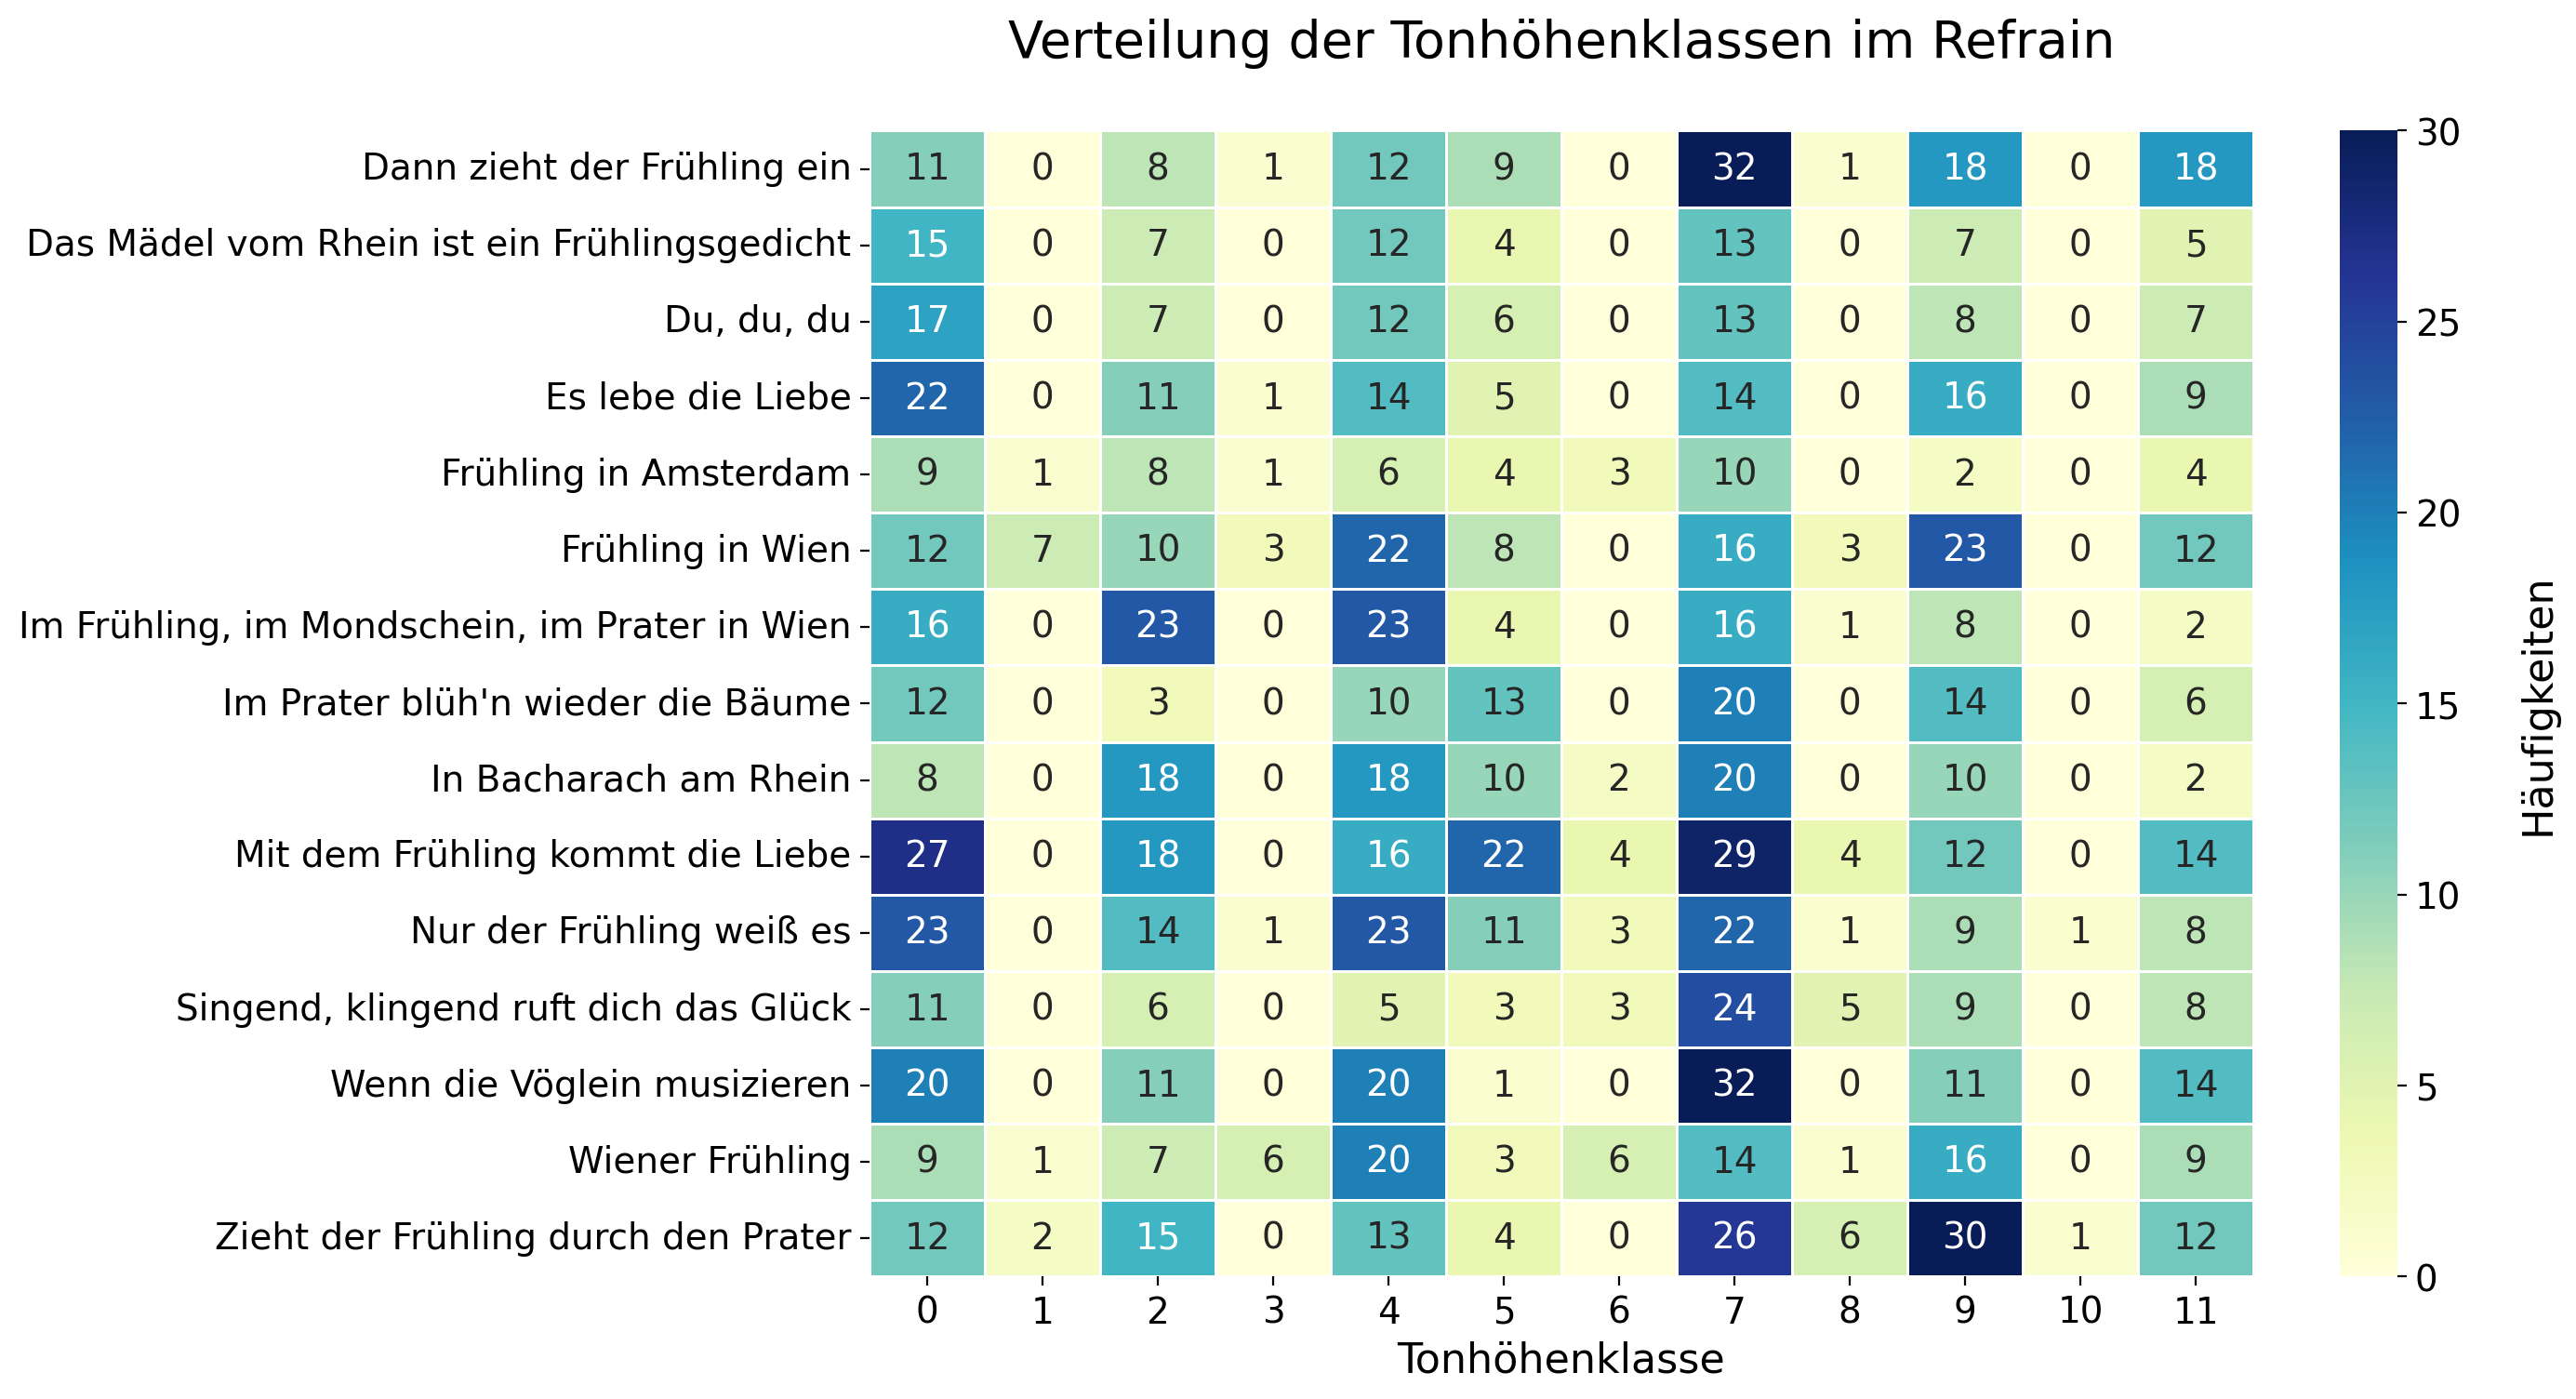

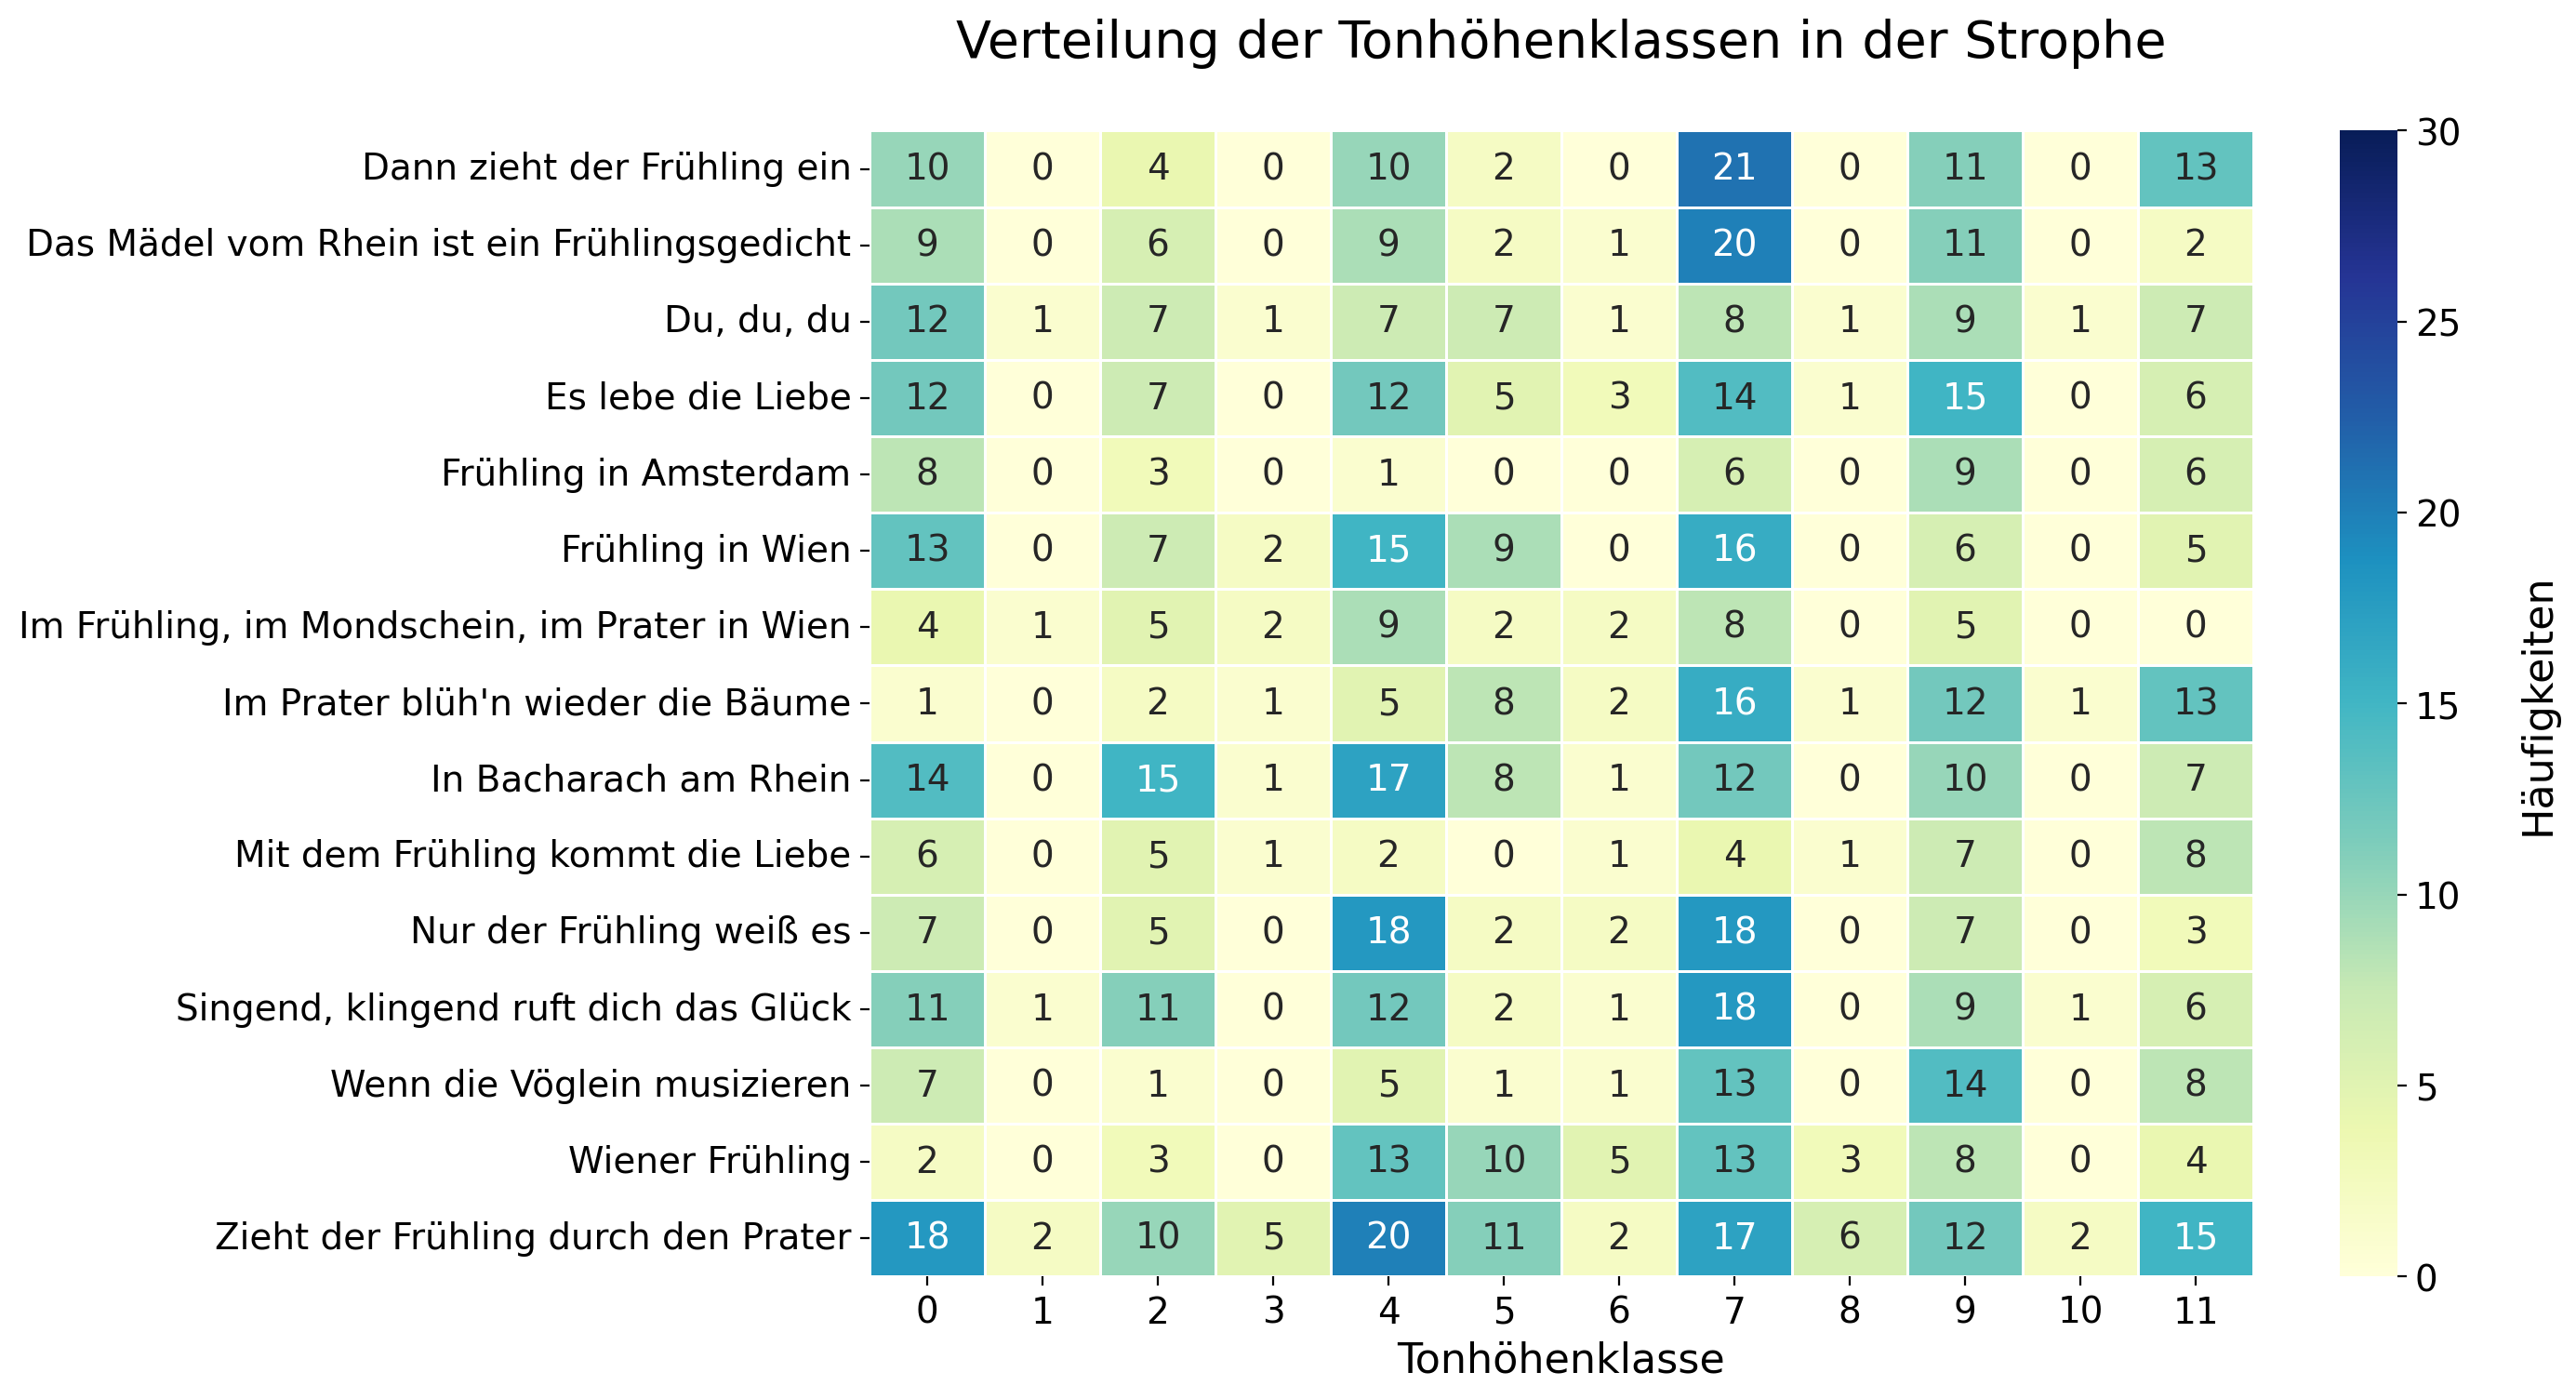

In [16]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from music21 import *

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def calculate_pitch_class_distribution(notes):
    pitch_classes = [n.pitch.midi % 12 for n in notes if isinstance(n, note.Note)]
    if not pitch_classes:
        return None
    return Counter(pitch_classes)

def analyze_sections_in_score(score):
    first_voice = score.parts[0]
    measures = first_voice.getElementsByClass('Measure')
    
    refrain_notes = []
    strophe_notes = []
    
    current_section = None
    
    for measure in measures:
        for element in measure.getElementsByClass('RehearsalMark'):
            if 'Refrain' in element.content:
                current_section = 'refrain'
            elif 'Strophe' in element.content:
                current_section = 'strophe'
        
        if current_section == 'refrain':
            refrain_notes.extend([n for n in measure.notes if isinstance(n, note.Note)])
        elif current_section == 'strophe':
            strophe_notes.extend([n for n in measure.notes if isinstance(n, note.Note)])
    
    # Calculate pitch class distributions
    refrain_distribution = calculate_pitch_class_distribution(refrain_notes)
    strophe_distribution = calculate_pitch_class_distribution(strophe_notes)
    
    return refrain_distribution, strophe_distribution

def process_directory(directory_path):
    refrain_data = {}
    strophe_data = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            refrain_distribution, strophe_distribution = analyze_sections_in_score(transposed_score)
            
            # Prepare for heatmap
            if refrain_distribution:
                refrain_data[filename] = {pc: count for pc, count in sorted(refrain_distribution.items())}
            if strophe_distribution:
                strophe_data[filename] = {pc: count for pc, count in sorted(strophe_distribution.items())}

    return refrain_data, strophe_data

# Funktion zur Umbenennung der Dateinamen mit schönen Titeln
def rename_files(data, new_titles):
    renamed_data = {}
    for file, values in data.items():
        if file in new_titles:
            renamed_data[new_titles[file]] = values
        else:
            renamed_data[file] = values
    return renamed_data

# Funktion zur Erstellung der Heatmap
def create_heatmap(data, title, filename):
    # Sortiere die Tonhöhenklassen von 0 bis 11
    df = pd.DataFrame(data).fillna(0).astype(int)
    df = df.reindex(sorted(df.index), axis=0)  # Sortiere die Indexe (Tonhöhenklassen)

    plt.figure(figsize=(12, 8))
    sns.heatmap(df.T, annot=True, cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Häufigkeiten'}, 
                annot_kws={"size": 14}, vmin=0, vmax=30)
    plt.title(title, size=20)
    plt.ylabel('')
    plt.xlabel('Tonhöhenklasse', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Anpassung der Farbskalenbeschriftung
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('\nHäufigkeiten', size=16)
    
    # Speichern der Heatmap in eine Datei
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Zeige die Grafik an
    plt.show()


# Neue Titel
new_titles = {
    'Dann_zieht_der_Fruehling_ein.mxl': 'Dann zieht der Frühling ein',
    'Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl': 'Das Mädel vom Rhein ist ein Frühlingsgedicht',
    'Du_du_du.mxl': 'Du, du, du',
    'Es_lebe_die_Liebe.mxl': 'Es lebe die Liebe',
    'Fruehling_in_Amsterdam.mxl': 'Frühling in Amsterdam',
    'Fruehling_in_Wien.mxl': 'Frühling in Wien',
    'Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl': 'Im Frühling, im Mondschein, im Prater in Wien',
    'Im_Prater_bluehn_wieder_die_Baeume.mxl': 'Im Prater blüh\'n wieder die Bäume',
    'In_Bacharach_am_Rhein.mxl': 'In Bacharach am Rhein',
    'Mit_dem_Fruehling_kommt_die_Liebe.mxl': 'Mit dem Frühling kommt die Liebe',
    'Nur_der_Fruehling_weiss_es....mxl': 'Nur der Frühling weiß es',
    'Singend,_klingend_ruft_dich_das_Glueck.mxl': 'Singend, klingend ruft dich das Glück',
    'Wenn_die_Voeglein_musizieren....mxl': 'Wenn die Vöglein musizieren',
    'Wiener_Fruehling.mxl': 'Wiener Frühling',
    'Zieht_der_Fruehling_durch_den_Prater.mxl': 'Zieht der Frühling durch den Prater'
}

# Specify the directory path containing MusicXML files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Process the directory
refrain_data, strophe_data = process_directory(directory_path)

# Umbenennen der Dateinamen mit den schönen Titeln
refrain_data_renamed = rename_files(refrain_data, new_titles)
strophe_data_renamed = rename_files(strophe_data, new_titles)

# Heatmaps für Refrain und Strophe erstellen und speichern
create_heatmap(refrain_data_renamed, 'Verteilung der Tonhöhenklassen im Refrain\n', 'Tonhöhenklassen_refrain.png')
create_heatmap(strophe_data_renamed, 'Verteilung der Tonhöhenklassen in der Strophe\n', 'Tonhöhenklassen_strophe.png')


## Tonhöhenklassen in allen Stücken, Gesang und Klavierpart gemeinsam -> 1 Heatmap

C:\Users\amiip\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


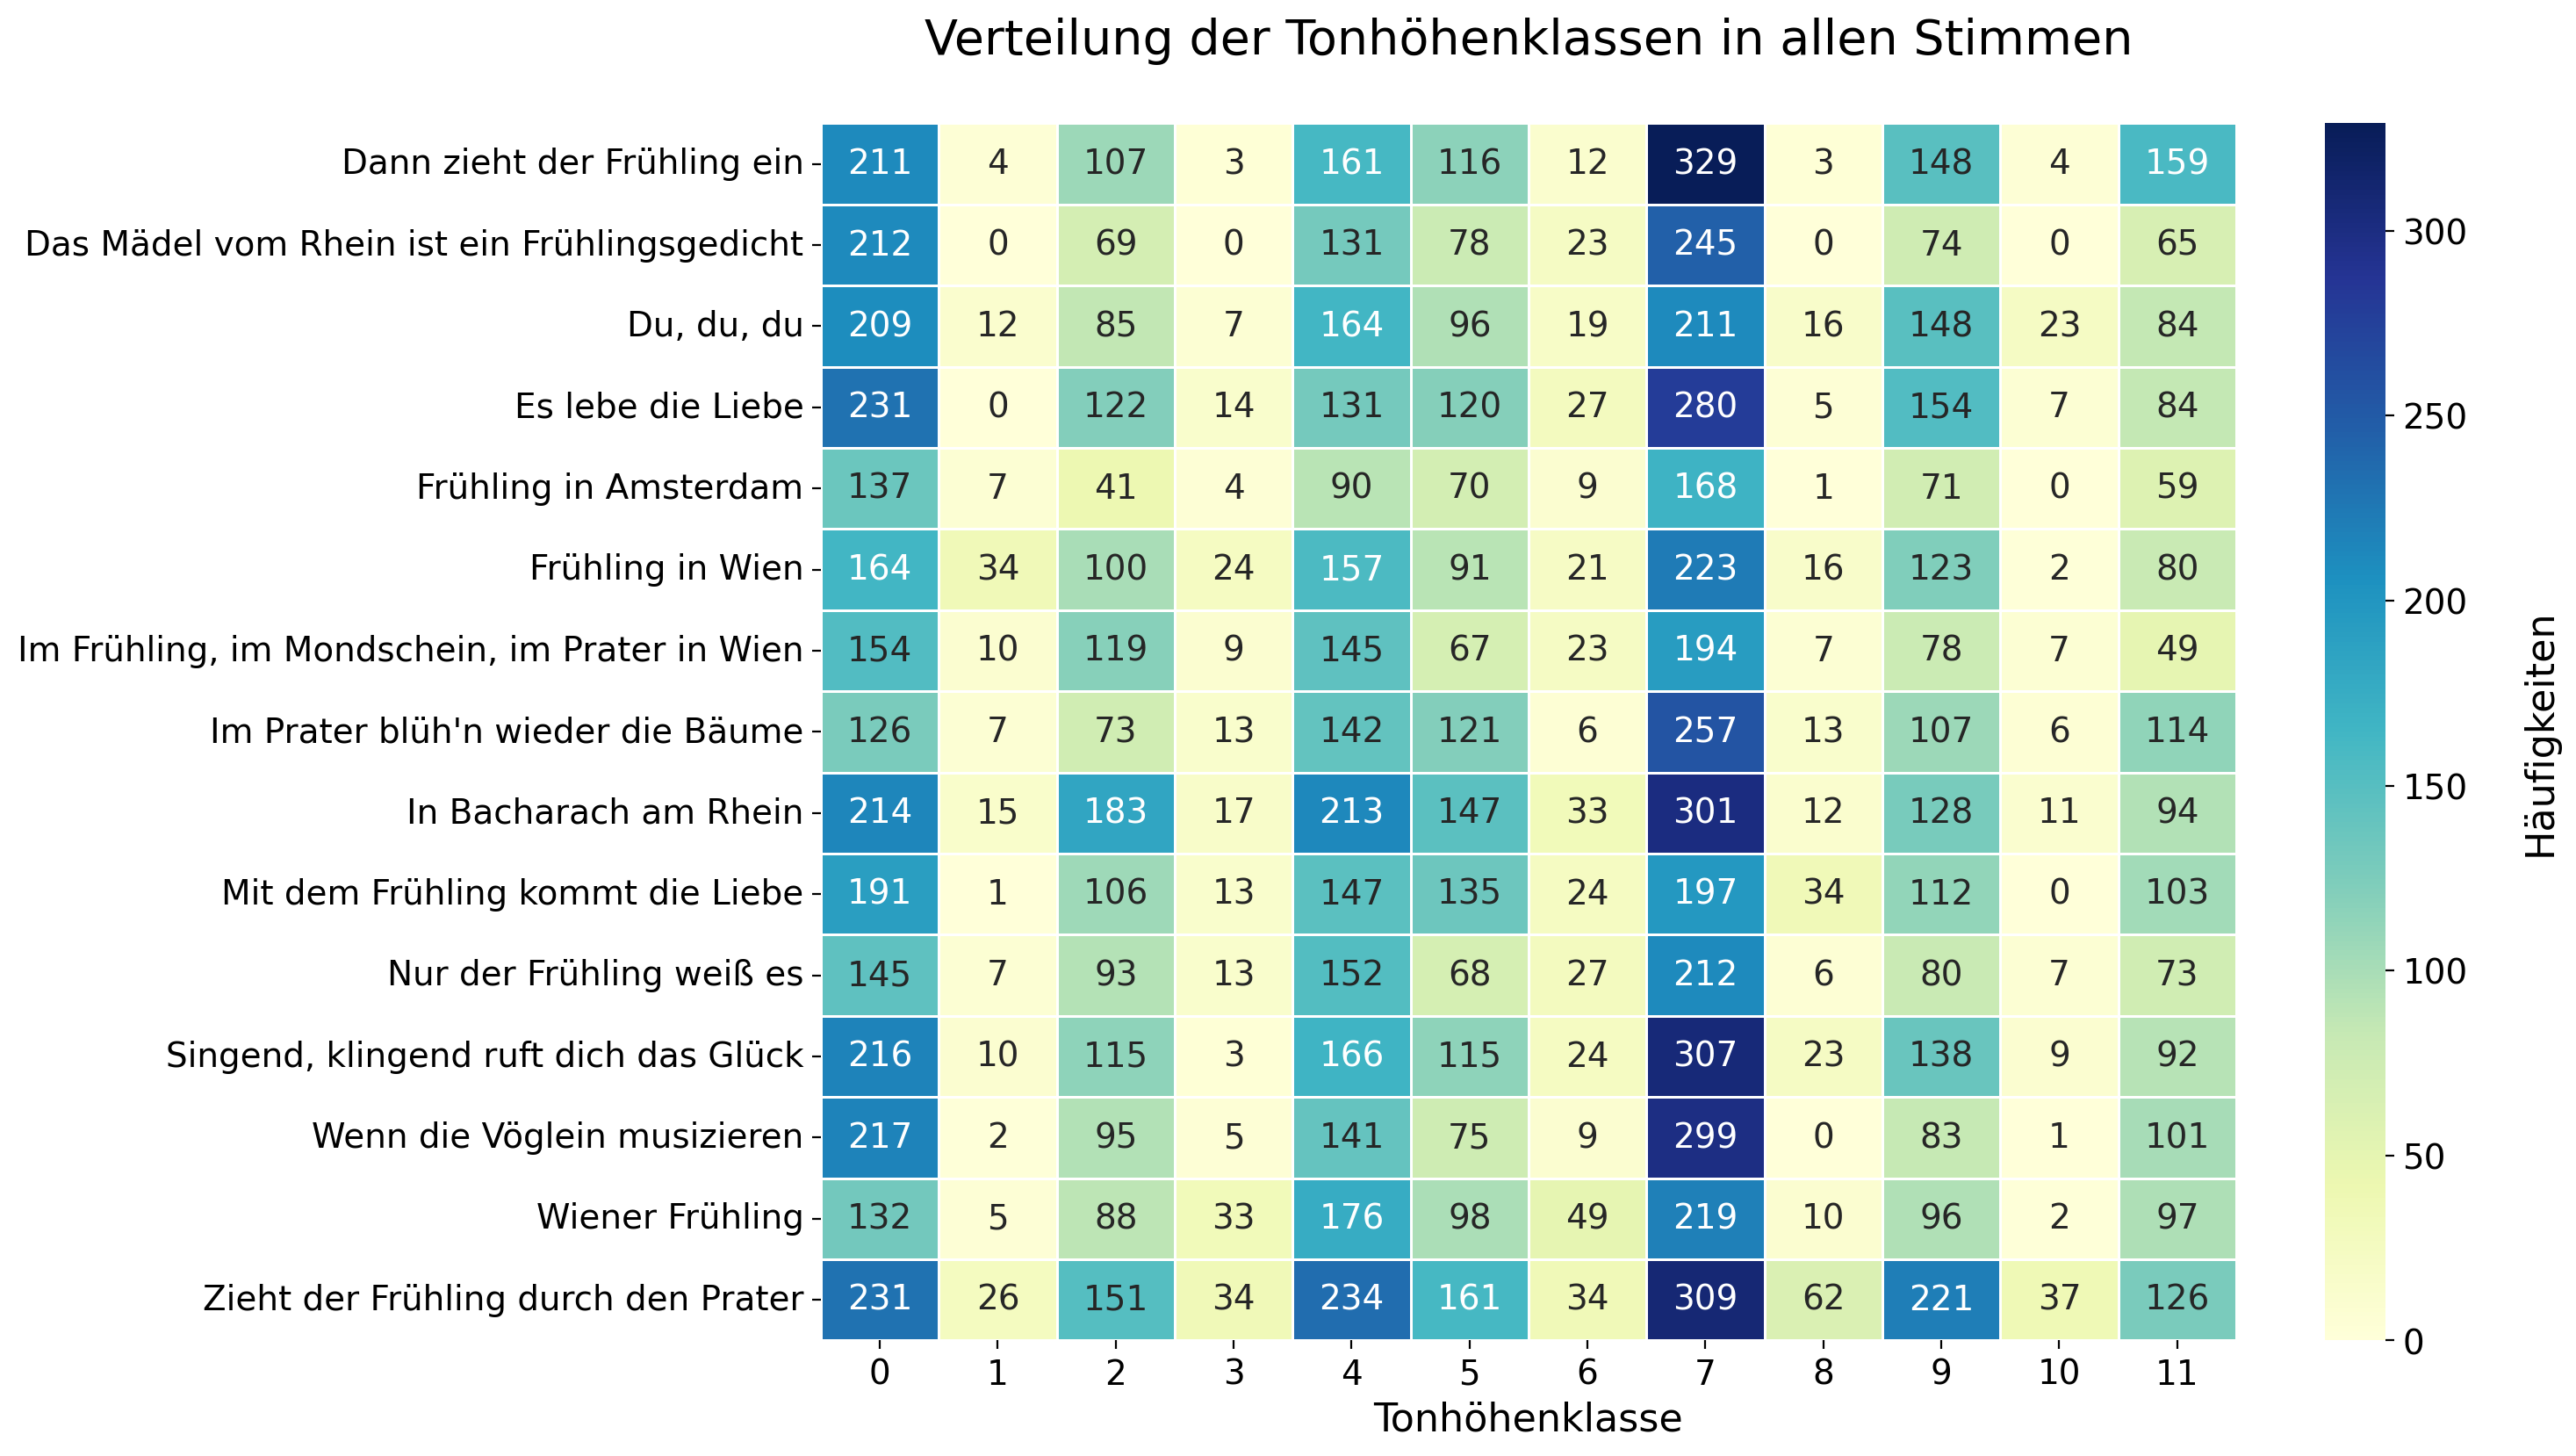

In [17]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from music21 import *

def transpose_to_c(score):
    """Transposes the score to C"""
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def calculate_pitch_class_distribution(notes):
    """Calculates the distribution of pitch classes (0-11) from a list of notes."""
    pitch_classes = [n.pitch.midi % 12 for n in notes if isinstance(n, note.Note)]
    return Counter(pitch_classes)

def collect_all_notes(score):
    """Collects all notes and chords from all parts in the score."""
    all_notes = []
    for part in score.parts:  # Iterate over all parts in the score
        for element in part.flat.notes:
            if isinstance(element, note.Note):
                all_notes.append(element)
            elif isinstance(element, chord.Chord):
                all_notes.extend([note for note in element])  # Append all notes from the chord
    return all_notes

def process_directory(directory_path):
    """Processes all files in the directory and calculates pitch class distributions."""
    combined_data = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            
            # Collect all notes from all parts
            all_notes = collect_all_notes(transposed_score)
            
            # Calculate pitch class distribution
            pitch_distribution = calculate_pitch_class_distribution(all_notes)
            
            # Prepare data for the heatmap
            if pitch_distribution:
                combined_data[filename] = {pc: count for pc, count in sorted(pitch_distribution.items())}

    return combined_data

# Funktion zur Umbenennung der Dateinamen mit schönen Titeln
def rename_files(data, new_titles):
    """Renames the files based on a mapping of new titles."""
    renamed_data = {}
    for file, values in data.items():
        if file in new_titles:
            renamed_data[new_titles[file]] = values
        else:
            renamed_data[file] = values
    return renamed_data

# Funktion zur Erstellung der Heatmap
def create_heatmap(data, title, filename):
    """Creates and saves a heatmap for the pitch class distribution."""
    # Sortiere die Tonhöhenklassen von 0 bis 11
    df = pd.DataFrame(data).fillna(0).astype(int)
    df = df.reindex(sorted(df.index), axis=0)  # Sortiere die Indexe (Tonhöhenklassen)

    plt.figure(figsize=(13, 9))
    sns.heatmap(df.T, annot=True, fmt='d', cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Häufigkeiten'}, 
                annot_kws={"size": 14})
    plt.title(title, size=20)
    plt.ylabel('')
    plt.xlabel('Tonhöhenklasse', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Anpassung der Farbskalenbeschriftung
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('\nHäufigkeiten', size=16)
    
    # Speichern der Heatmap in eine Datei
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Zeige die Grafik an
    plt.show()

# Neue Titel
new_titles = {
    'Dann_zieht_der_Fruehling_ein.mxl': 'Dann zieht der Frühling ein',
    'Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl': 'Das Mädel vom Rhein ist ein Frühlingsgedicht',
    'Du_du_du.mxl': 'Du, du, du',
    'Es_lebe_die_Liebe.mxl': 'Es lebe die Liebe',
    'Fruehling_in_Amsterdam.mxl': 'Frühling in Amsterdam',
    'Fruehling_in_Wien.mxl': 'Frühling in Wien',
    'Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl': 'Im Frühling, im Mondschein, im Prater in Wien',
    'Im_Prater_bluehn_wieder_die_Baeume.mxl': 'Im Prater blüh\'n wieder die Bäume',
    'In_Bacharach_am_Rhein.mxl': 'In Bacharach am Rhein',
    'Mit_dem_Fruehling_kommt_die_Liebe.mxl': 'Mit dem Frühling kommt die Liebe',
    'Nur_der_Fruehling_weiss_es....mxl': 'Nur der Frühling weiß es',
    'Singend,_klingend_ruft_dich_das_Glueck.mxl': 'Singend, klingend ruft dich das Glück',
    'Wenn_die_Voeglein_musizieren....mxl': 'Wenn die Vöglein musizieren',
    'Wiener_Fruehling.mxl': 'Wiener Frühling',
    'Zieht_der_Fruehling_durch_den_Prater.mxl': 'Zieht der Frühling durch den Prater'
}

# Specify the directory path containing MusicXML files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Process the directory and combine data from all parts
combined_data = process_directory(directory_path)

# Umbenennen der Dateinamen mit den schönen Titeln
combined_data_renamed = rename_files(combined_data, new_titles)

# Heatmap für die Tonhöhenklassenverteilung erstellen und speichern
create_heatmap(combined_data_renamed, 'Verteilung der Tonhöhenklassen in allen Stimmen\n', 'Tonhöhenklassen_alle_stimmen.png')


### Tonhöhenklassen in Gesang- UND Klavierstimme für alle Stücke gemeinsam

In [18]:
import os
from collections import Counter
from music21 import *

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_pitch_classes(score):
    pitch_classes = []
    for part in score.parts:
        for element in part.flat.notes:
            if isinstance(element, note.Note):
                # Falls es eine einzelne Note ist, erhalten wir den MIDI-Wert
                pitch_class = element.pitch.midi % 12
                pitch_classes.append(pitch_class)
            elif isinstance(element, chord.Chord):
                # Falls es ein Akkord ist, verarbeiten wir alle Noten im Akkord
                for pitch in element.pitches:
                    pitch_class = pitch.midi % 12
                    pitch_classes.append(pitch_class)
    return pitch_classes

def analyze_files(directory_path):
    combined_pitch_classes = []

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            pitch_classes = collect_pitch_classes(transposed_score)
            combined_pitch_classes.extend(pitch_classes)

    # Count occurrences of each pitch class
    pitch_class_counts = Counter(combined_pitch_classes)
    total_count = sum(pitch_class_counts.values())

    # Display results
    print("Gesamtanzahl der Noten:", total_count)
    print("Tonhöhenklassenverteilung:")
    for pitch_class, count in sorted(pitch_class_counts.items()):
        percentage = (count / total_count) * 100
        print(f"Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")

# Example usage:
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'
analyze_files(directory_path)

C:\Users\amiip\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


Gesamtanzahl der Noten: 16133
Tonhöhenklassenverteilung:
Tonhöhe 0: 2790x (17.29%)
Tonhöhe 1: 140x (0.87%)
Tonhöhe 2: 1547x (9.59%)
Tonhöhe 3: 192x (1.19%)
Tonhöhe 4: 2350x (14.57%)
Tonhöhe 5: 1558x (9.66%)
Tonhöhe 6: 340x (2.11%)
Tonhöhe 7: 3751x (23.25%)
Tonhöhe 8: 208x (1.29%)
Tonhöhe 9: 1761x (10.92%)
Tonhöhe 10: 116x (0.72%)
Tonhöhe 11: 1380x (8.55%)


### Tonhöhenklassen nur in Klavierpart für alle Stücke gemeinsam

In [19]:
import os
from collections import Counter
from music21 import *

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_pitch_classes_except_vocals(score):
    pitch_classes = []
    # Skip part[0] and process all other parts (assumed to be non-vocal)
    for part in score.parts[1:]:  # Starting from part[1] to exclude part[0]
        for element in part.flat.notes:
            if isinstance(element, note.Note):
                # If it's a single note, get the MIDI value
                pitch_class = element.pitch.midi % 12
                pitch_classes.append(pitch_class)
            elif isinstance(element, chord.Chord):
                # If it's a chord, process all notes in the chord
                for pitch in element.pitches:
                    pitch_class = pitch.midi % 12
                    pitch_classes.append(pitch_class)
    return pitch_classes

def analyze_files(directory_path):
    combined_pitch_classes = []

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            pitch_classes = collect_pitch_classes_except_vocals(transposed_score)
            combined_pitch_classes.extend(pitch_classes)

    # Count occurrences of each pitch class
    pitch_class_counts = Counter(combined_pitch_classes)
    total_count = sum(pitch_class_counts.values())

    # Display results
    print("Gesamtanzahl der Noten (nur Klavierstimmen):", total_count)
    print("Tonhöhenklassenverteilung:")
    for pitch_class, count in sorted(pitch_class_counts.items()):
        percentage = (count / total_count) * 100
        print(f"Tonhöhe {pitch_class}: {count}x ({percentage:.2f}%)")

# Example usage:
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'
analyze_files(directory_path)


Gesamtanzahl der Noten (nur Klavierstimmen): 13754
Tonhöhenklassenverteilung:
Tonhöhe 0: 2428x (17.65%)
Tonhöhe 1: 124x (0.90%)
Tonhöhe 2: 1290x (9.38%)
Tonhöhe 3: 166x (1.21%)
Tonhöhe 4: 1969x (14.32%)
Tonhöhe 5: 1382x (10.05%)
Tonhöhe 6: 297x (2.16%)
Tonhöhe 7: 3246x (23.60%)
Tonhöhe 8: 173x (1.26%)
Tonhöhe 9: 1423x (10.35%)
Tonhöhe 10: 109x (0.79%)
Tonhöhe 11: 1147x (8.34%)


### Heatmap für Tonhöhenklassen nur in Klavierstimme

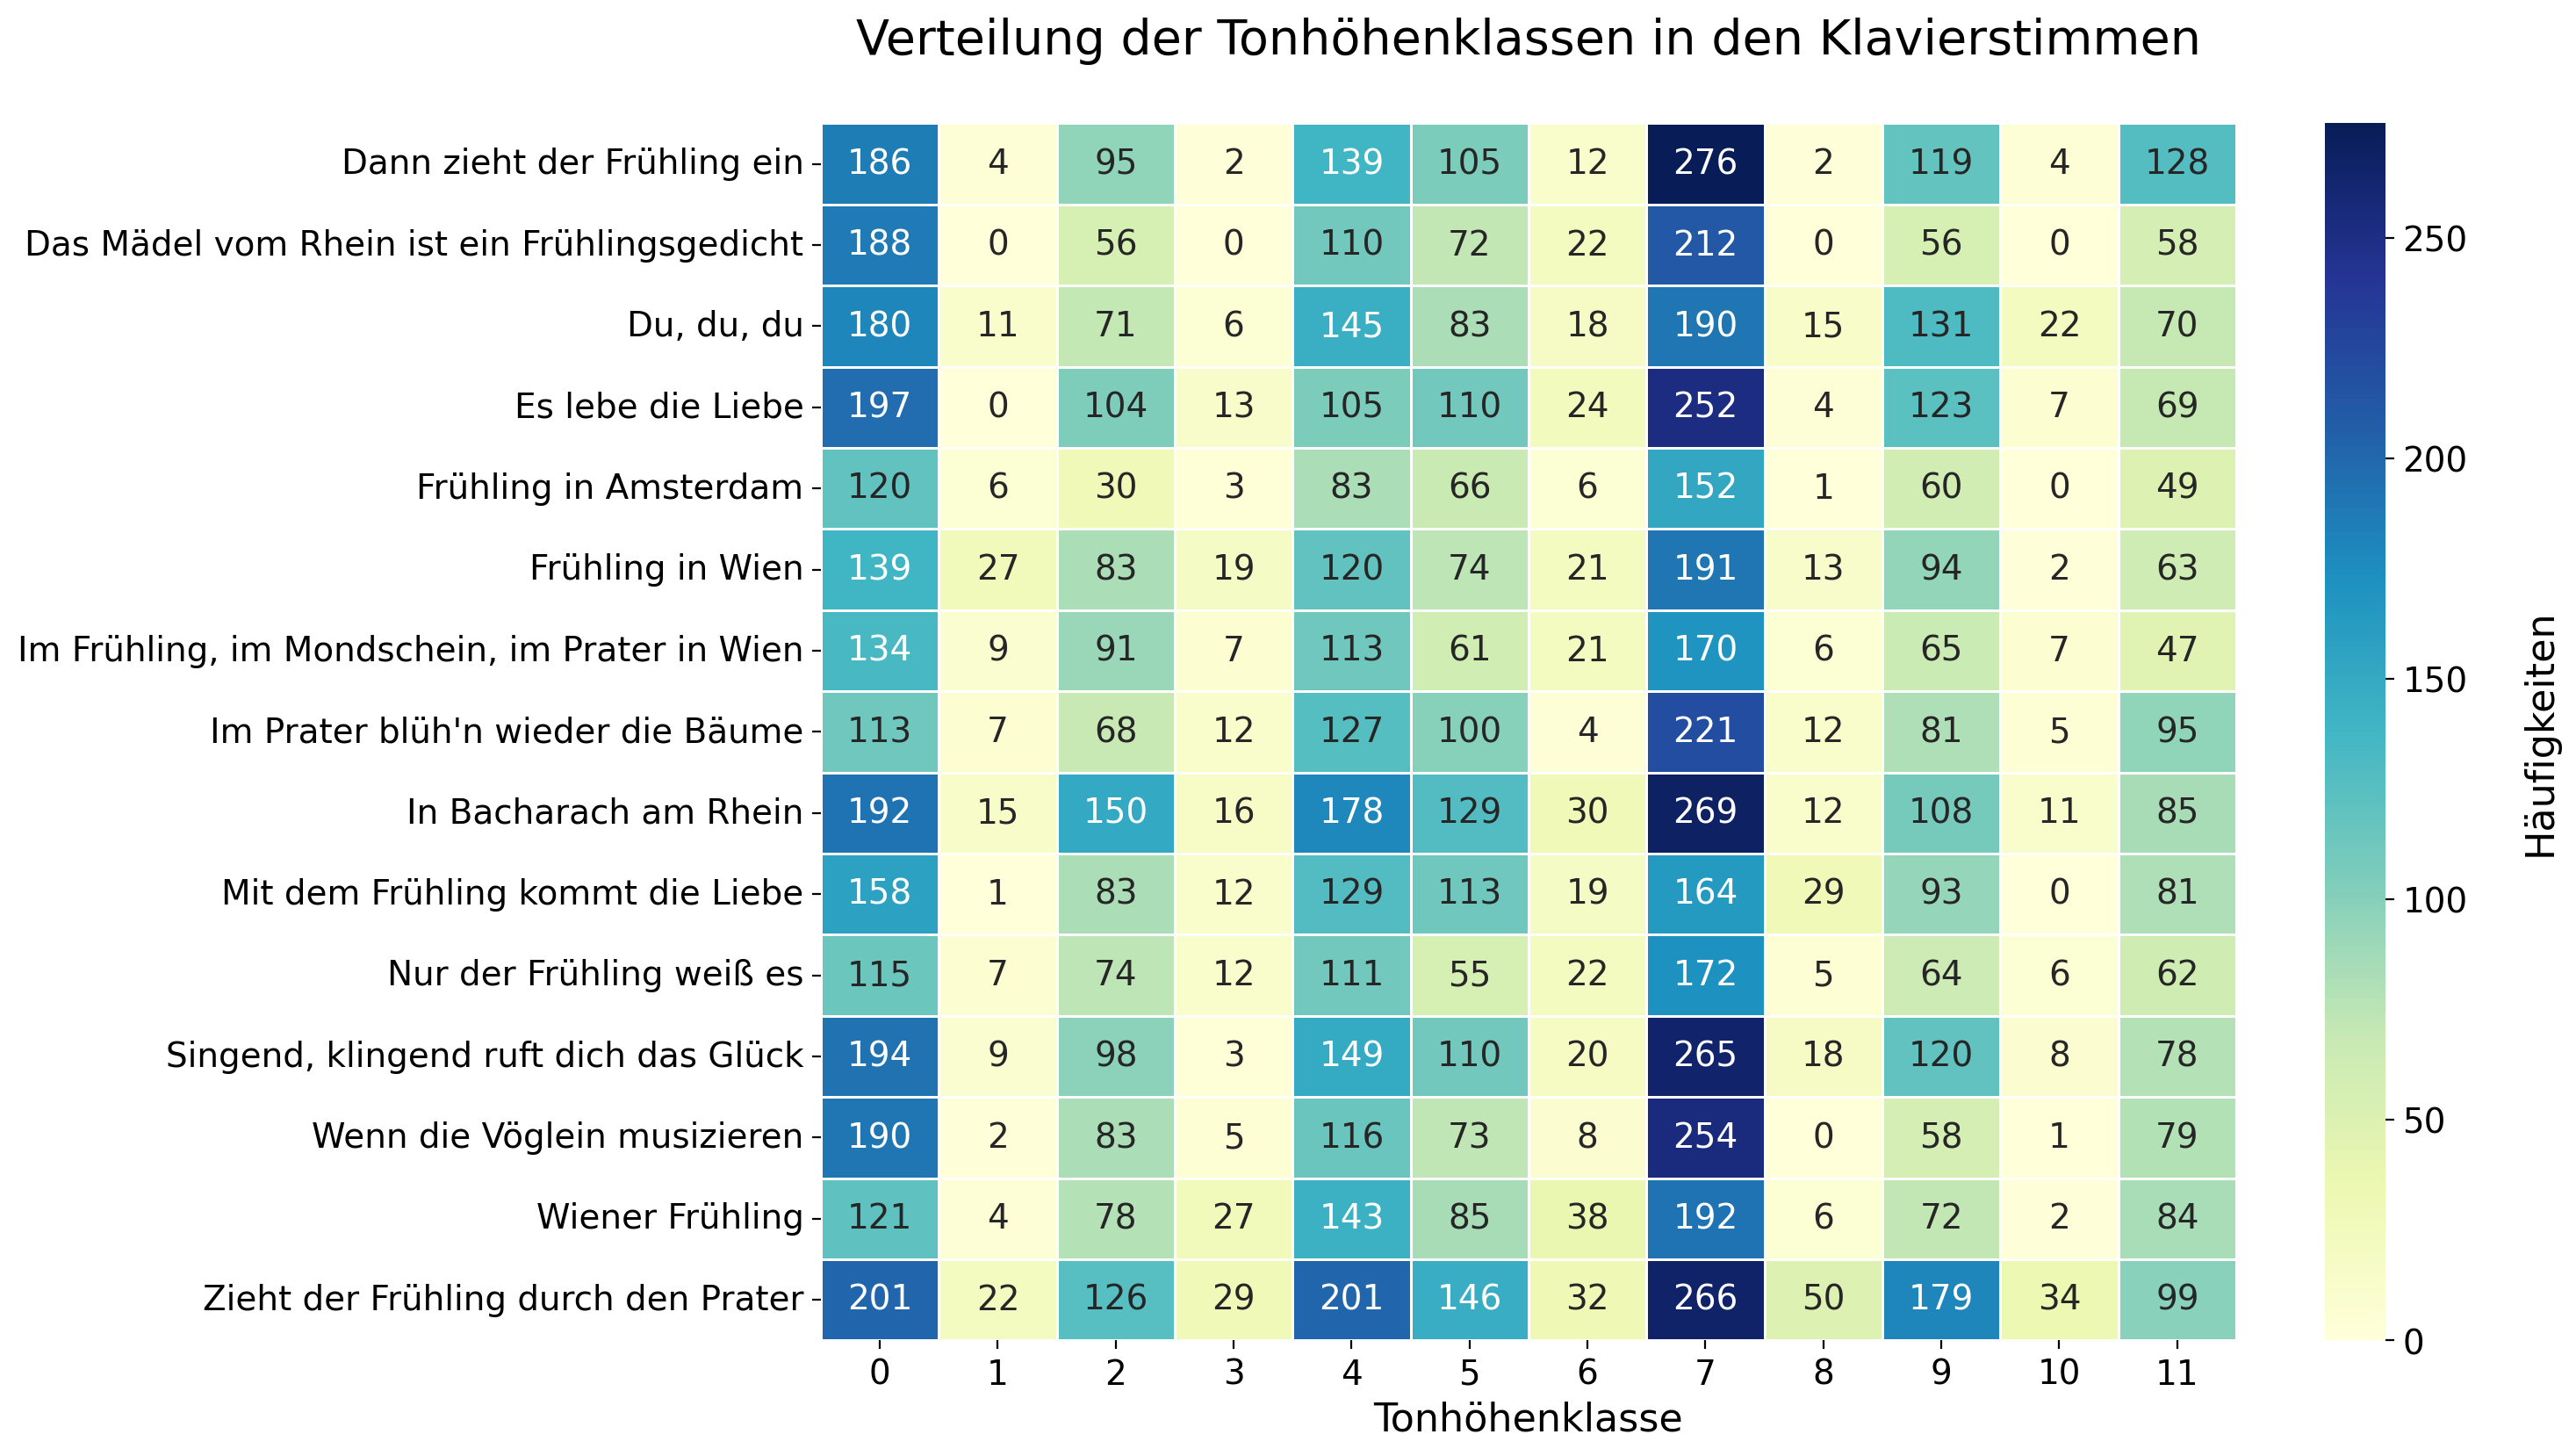

In [20]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from music21 import *

def transpose_to_c(score):
    key = score.analyze('key')
    interval_to_c = interval.Interval(key.tonic, pitch.Pitch('C'))
    transposed_score = score.transpose(interval_to_c)
    return transposed_score

def collect_pitch_classes_except_vocals(score):
    pitch_classes = []
    # Skip part[0] and process all other parts (assumed to be non-vocal)
    for part in score.parts[1:]:  # Starting from part[1] to exclude part[0]
        for element in part.flat.notes:
            if isinstance(element, note.Note):
                # If it's a single note, get the MIDI value
                pitch_class = element.pitch.midi % 12
                pitch_classes.append(pitch_class)
            elif isinstance(element, chord.Chord):
                # If it's a chord, process all notes in the chord
                for pitch in element.pitches:
                    pitch_class = pitch.midi % 12
                    pitch_classes.append(pitch_class)
    return pitch_classes

def process_directory(directory_path):
    piano_data = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            transposed_score = transpose_to_c(score)
            pitch_classes = collect_pitch_classes_except_vocals(transposed_score)
            
            # Prepare for heatmap
            if pitch_classes:
                piano_data[filename] = {pc: count for pc, count in sorted(Counter(pitch_classes).items())}

    return piano_data

# Funktion zur Umbenennung der Dateinamen mit schönen Titeln
def rename_files(data, new_titles):
    renamed_data = {}
    for file, values in data.items():
        if file in new_titles:
            renamed_data[new_titles[file]] = values
        else:
            renamed_data[file] = values
    return renamed_data

# Funktion zur Erstellung der Heatmap
def create_heatmap(data, title, filename):
    # Sortiere die Tonhöhenklassen von 0 bis 11
    df = pd.DataFrame(data).fillna(0).astype(int)
    df = df.reindex(sorted(df.index), axis=0)  # Sortiere die Indexe (Tonhöhenklassen)

    plt.figure(figsize=(13, 9))
    sns.heatmap(df.T, annot=True, fmt='d', cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Häufigkeiten'}, 
                annot_kws={"size": 14})
    plt.title(title, size=20)
    plt.ylabel('')
    plt.xlabel('Tonhöhenklasse', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Anpassung der Farbskalenbeschriftung
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('\nHäufigkeiten', size=16)
    
    # Speichern der Heatmap in eine Datei
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Zeige die Grafik an
    plt.show()

# Neue Titel
new_titles = {
    'Dann_zieht_der_Fruehling_ein.mxl': 'Dann zieht der Frühling ein',
    'Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl': 'Das Mädel vom Rhein ist ein Frühlingsgedicht',
    'Du_du_du.mxl': 'Du, du, du',
    'Es_lebe_die_Liebe.mxl': 'Es lebe die Liebe',
    'Fruehling_in_Amsterdam.mxl': 'Frühling in Amsterdam',
    'Fruehling_in_Wien.mxl': 'Frühling in Wien',
    'Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl': 'Im Frühling, im Mondschein, im Prater in Wien',
    'Im_Prater_bluehn_wieder_die_Baeume.mxl': 'Im Prater blüh\'n wieder die Bäume',
    'In_Bacharach_am_Rhein.mxl': 'In Bacharach am Rhein',
    'Mit_dem_Fruehling_kommt_die_Liebe.mxl': 'Mit dem Frühling kommt die Liebe',
    'Nur_der_Fruehling_weiss_es....mxl': 'Nur der Frühling weiß es',
    'Singend,_klingend_ruft_dich_das_Glueck.mxl': 'Singend, klingend ruft dich das Glück',
    'Wenn_die_Voeglein_musizieren....mxl': 'Wenn die Vöglein musizieren',
    'Wiener_Fruehling.mxl': 'Wiener Frühling',
    'Zieht_der_Fruehling_durch_den_Prater.mxl': 'Zieht der Frühling durch den Prater'
}

# Specify the directory path containing MusicXML files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Process the directory for piano parts only
piano_data = process_directory(directory_path)

# Umbenennen der Dateinamen mit den schönen Titeln
piano_data_renamed = rename_files(piano_data, new_titles)

# Heatmap für die Klavierstimmen erstellen und speichern
create_heatmap(piano_data_renamed, 'Verteilung der Tonhöhenklassen in den Klavierstimmen\n', 'Tonhöhenklassen_piano.png')


### Gesang- und Klavierstimmen, Tonhöhenklassen Vergleich in Prozent -> Barplot

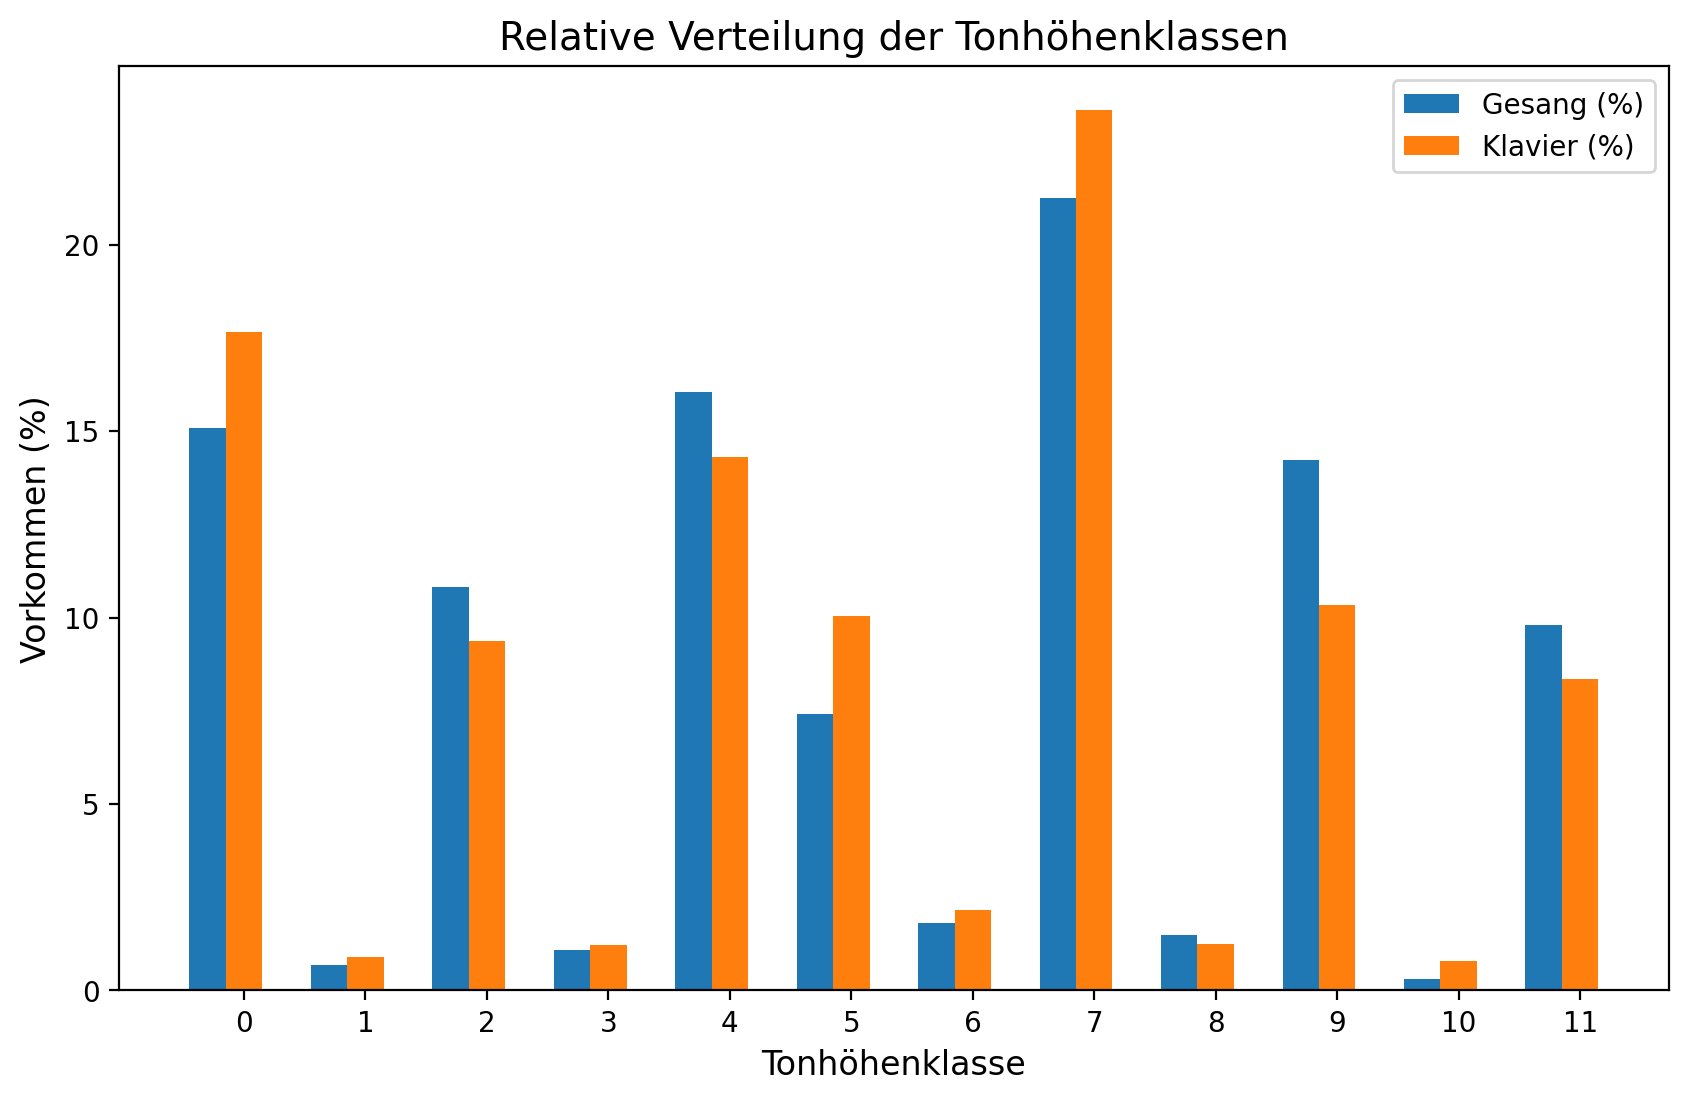

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Corrected data for Gesang
gesang_data = {
    0: 358, 1: 16, 2: 257, 3: 26, 4: 381, 5: 176, 6: 43, 
    7: 505, 8: 35, 9: 338, 10: 7, 11: 233
}

klavier_data = {
    0: 2428, 1: 124, 2: 1290, 3: 166, 4: 1969, 5: 1382, 6: 297, 
    7: 3246, 8: 173, 9: 1423, 10: 109, 11: 1147
}

gesamt_data = {
    0: 2786, 1: 140, 2: 1547, 3: 192, 4: 2350, 5: 1558, 6: 340, 
    7: 3751, 8: 208, 9: 1761, 10: 116, 11: 1380
}

# Calculating percentages
def calculate_percentage(data):
    total = sum(data.values())
    return {key: (value / total) * 100 for key, value in data.items()}

gesang_percentage = calculate_percentage(gesang_data)
klavier_percentage = calculate_percentage(klavier_data)
#gesamt_percentage = calculate_percentage(gesamt_data)

labels = np.arange(12)
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

gesang_bars = ax.bar(labels - width, [gesang_percentage[i] for i in labels], width, label='Gesang (%)')
klavier_bars = ax.bar(labels, [klavier_percentage[i] for i in labels], width, label='Klavier (%)')
#gesamt_bars = ax.bar(labels + width, [gesamt_percentage[i] for i in labels], width, label='Gesamt (%)')

# Add labels and title
ax.set_xlabel('Tonhöhenklasse', fontsize=12)
ax.set_ylabel('Vorkommen (%)', fontsize=12)
ax.set_title('Relative Verteilung der Tonhöhenklassen', fontsize=14)
ax.set_xticks(labels)
ax.legend()

plt.show()

#### Barplot für Tonhöhenklassen in der Gesangsstimme

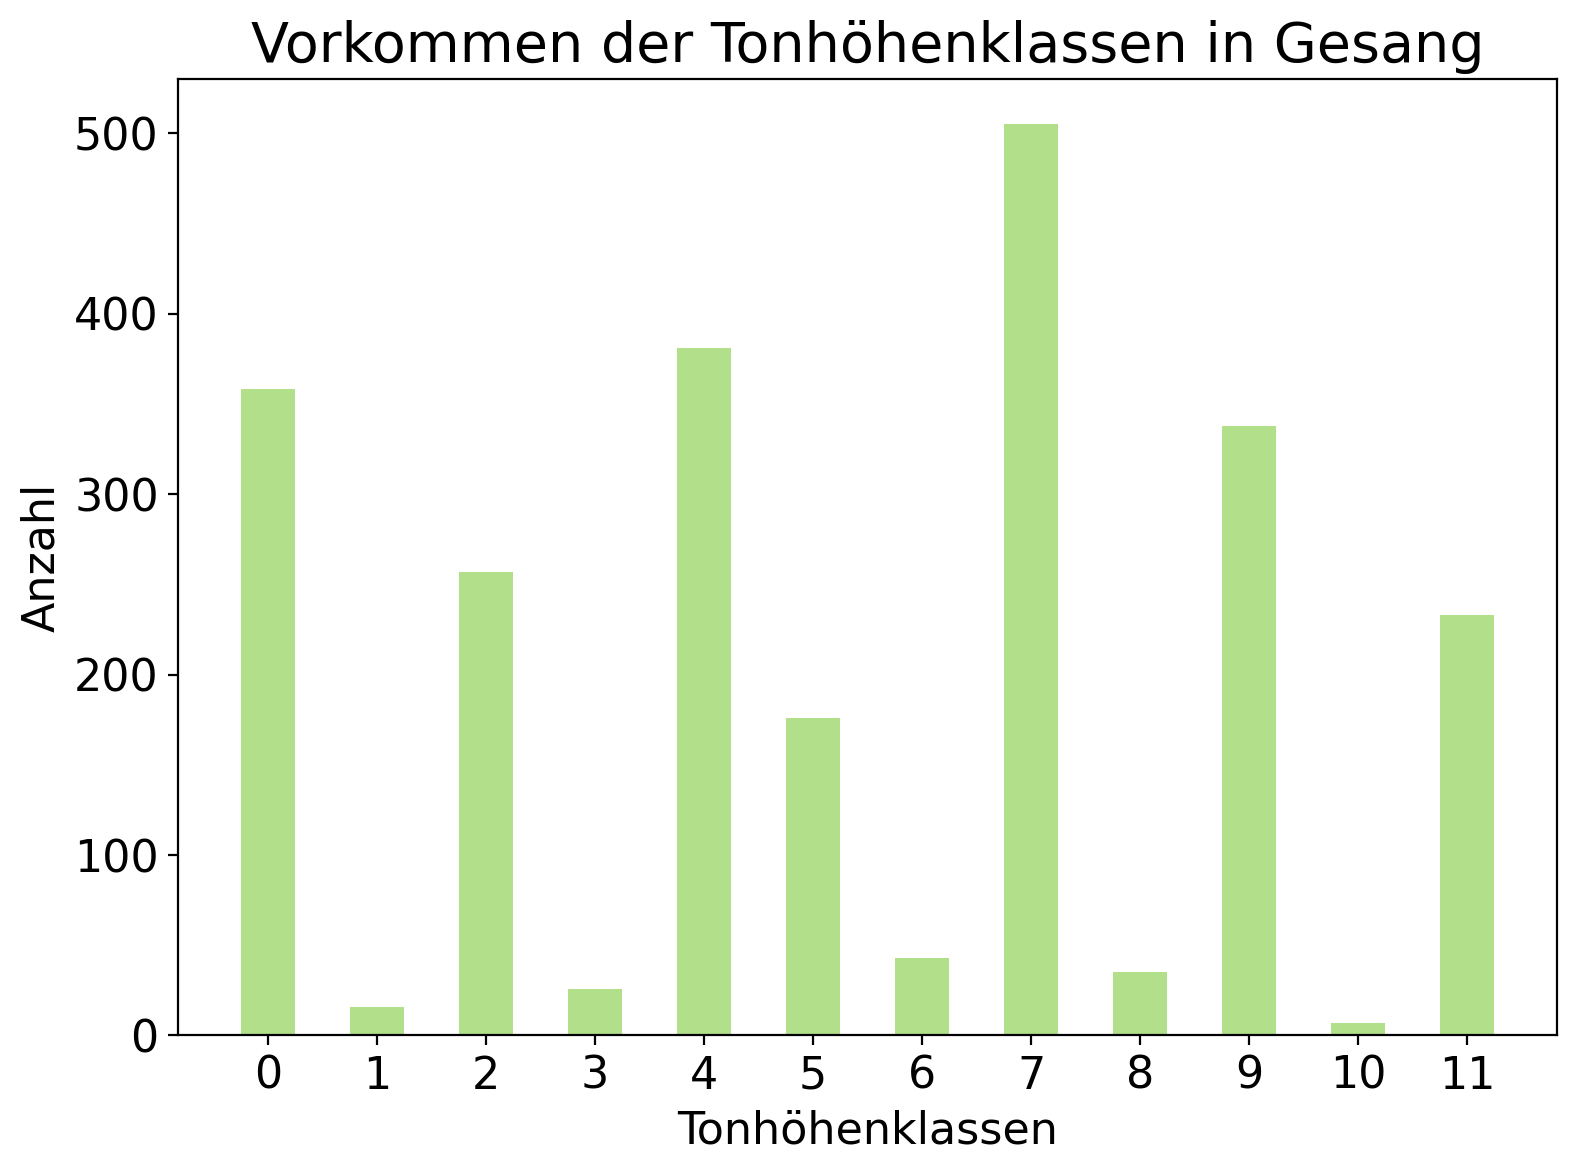

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Corrected data for Gesang
gesang_data = {
    0: 358, 1: 16, 2: 257, 3: 26, 4: 381, 5: 176, 6: 43, 
    7: 505, 8: 35, 9: 338, 10: 7, 11: 233
}

# Labels for pitch classes (0-11)
pitch_classes = np.arange(12)

# Bar width and positions
bar_width = 0.5
index = np.arange(len(pitch_classes))

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each category
bars_gesang = ax.bar(index + bar_width, [gesang_data.get(pc, 0) for pc in pitch_classes], bar_width, label='Gesang', color='#b2df8a')

# Labels and title
ax.set_xlabel('Tonhöhenklassen', fontsize=16)
ax.set_ylabel('Anzahl', fontsize=16)
ax.set_title('Vorkommen der Tonhöhenklassen in Gesang', fontsize=20)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pitch_classes)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.tight_layout()
# Speichern der Heatmap in eine Datei
plt.savefig("Tonhöhenklassen_gesang_barplot.png", dpi=300, bbox_inches='tight')

plt.show()


#### Barplot für Tonhöhenklassen in der Klavierstimme

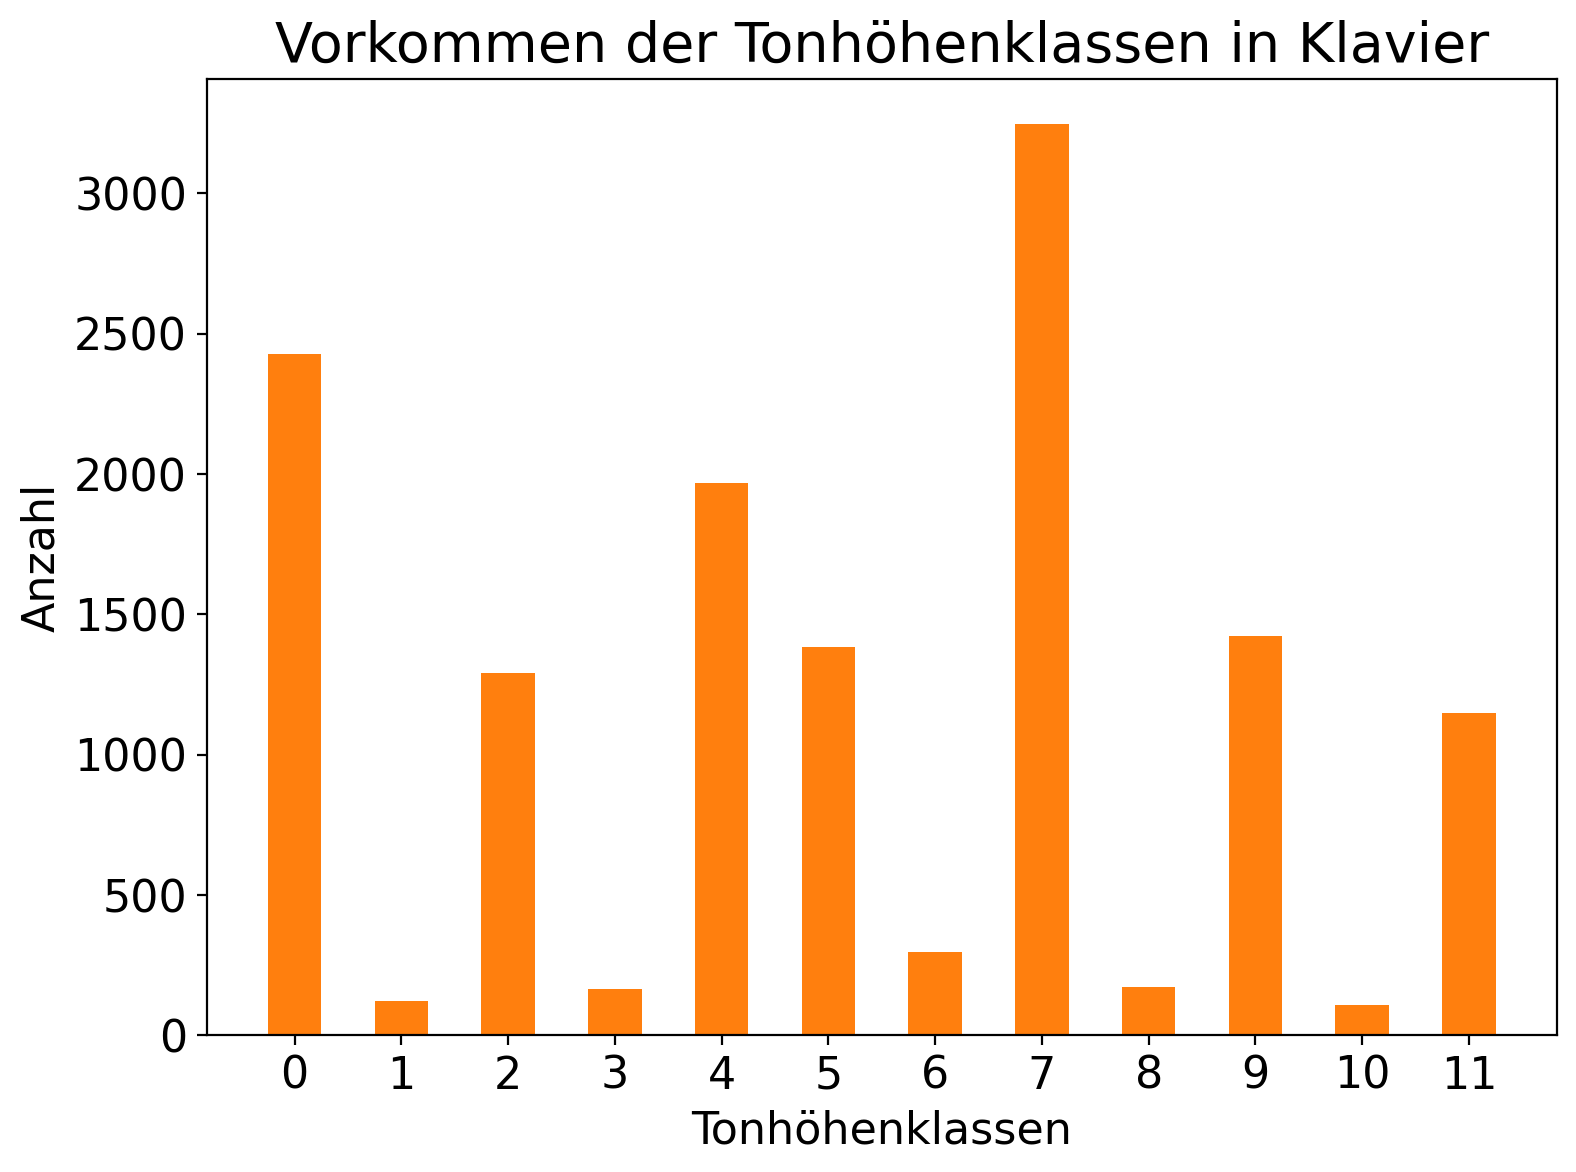

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Klavier and Gesamt from the previous step
klavier_data = {
    0: 2428, 1: 124, 2: 1290, 3: 166, 4: 1969, 5: 1382, 6: 297, 
    7: 3246, 8: 173, 9: 1423, 10: 109, 11: 1147
}

# Labels for pitch classes (0-11)
pitch_classes = np.arange(12)

# Bar width and positions
bar_width = 0.5
index = np.arange(len(pitch_classes))

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each category
bars_klavier = ax.bar(index + bar_width, [klavier_data.get(pc, 0) for pc in pitch_classes], bar_width, label='Klavier', color='#ff7f0e')

# Labels and title
ax.set_xlabel('Tonhöhenklassen', fontsize=16)
ax.set_ylabel('Anzahl', fontsize=16)
ax.set_title('Vorkommen der Tonhöhenklassen in Klavier', fontsize=20)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pitch_classes)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.tight_layout()
# Speichern der Heatmap in eine Datei
plt.savefig("Tonhöhenklassen_klavier_barplot.png", dpi=300, bbox_inches='tight')

plt.show()

### Durchschnittliche Tonhöhe (pitch) für einzelne Wörter in allen Stücken gemeinsam in der Gesangsstimme

####  average pitch, ambitus (lowest+highest pitch) für ganzes Stück (Gesang) und Tonart

In [24]:
# Function to calculate the average pitch of all notes in voice
def calculate_average_note_of_voice(score):
    if not score.parts:
        return None

    # Take only the first part (voice)
    first_voice = score.parts[0]
    notes = [element.pitch.midi for element in first_voice.flat.notes if isinstance(element, note.Note)]
    
    if notes:
        return sum(notes) / len(notes)
    else:
        return None
    
def calculate_ambitus(score):
    if not score.parts:
        return None, None

    # Take only the first part (voice)
    first_voice = score.parts[0]
    ambitus_analysis = analysis.discrete.Ambitus()
    low_high = ambitus_analysis.getPitchSpan(first_voice)
    
    if low_high is not None:
        lowest_note, highest_note = low_high
        return lowest_note, highest_note
    else:
        return None, None
    
def mean_pitch_words(score, words):
    results = {}
    ls = search.lyrics.LyricSearcher(score)  # Erstellen eines LyricSearcher-Objekts
    
    for word in words:
        search_results = ls.search(word)  # Suche nach dem Wort
        pitches = []
        
        for match in search_results:
            for thisNote in match.els:
                pitches.append(thisNote.pitch.ps)
        
        if pitches:
            results[word] = (np.mean(pitches), np.median(pitches))
        else:
            results[word] = (None, None)
            
    return results

def analyze_files(directory_path):
    all_results = {}
    
    # Durchlaufen aller Dateien im Verzeichnis
    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            key = score.analyze('key')
            
            average_note = calculate_average_note_of_voice(score)
            avg_pitch_name_total = pitch.Pitch(average_note).nameWithOctave if average_note else "N/A"
            
            lowest_note, highest_note = calculate_ambitus(score)
            lowest_pitch_name = lowest_note.nameWithOctave if lowest_note else "N/A"
            highest_pitch_name = highest_note.nameWithOctave if highest_note else "N/A"

            word_pitches = mean_pitch_words(score, ["Frühling", "Wien", "Liebe", "Herz", "Prater"])
            
            # Speichern der Ergebnisse in einem Dictionary
            all_results[filename] = {
                'Tonart': f"{key.tonic.name} {key.mode}",
                'AverageNote': average_note,
                'AvgPitchNameTotal': avg_pitch_name_total,
                'LowestNote': lowest_note,
                'LowestPitchName': lowest_pitch_name,
                'HighestNote': highest_note,
                'HighestPitchName': highest_pitch_name,
                'Wörter': word_pitches
            }
    
    return all_results

# Define the path to the directory containing MusicXML files
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Aufruf der Analysefunktion zu meinem Ordner
results = analyze_files(directory_path)

# Ausgabe der Ergebnisse
for filename, info in results.items():
    print(f"\nStück: {filename}")
    print(f"Tonart des Stücks: {info['Tonart']}")
    
    if info['AverageNote'] is not None:
        print(f"Durchschnittliche Tonhöhe des Gesangs: {info['AverageNote']:.2f} (ca. {info['AvgPitchNameTotal']})")
        print(f"Tiefste Tonhöhe des Gesangs: {info['LowestNote'].ps:.2f} (ca. {info['LowestPitchName']})")
        print(f"Höchste Tonhöhe des Gesangs: {info['HighestNote'].ps:.2f} (ca. {info['HighestPitchName']})")
    else:
        print(f"Durchschnittliche Tonhöhe des Gesangs: N/A")
#     for word, pitches in info['Wörter'].items():
#         avg_pitch, med_pitch = pitches
#         if avg_pitch is not None:
#             print(f"Durchschnittliche Tonhöhe für '{word}': {avg_pitch:.2f} (Median: {med_pitch:.2f})")
#         else:
#             print(f"Keine Noten gefunden für '{word}'")


C:\Users\amiip\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)



Stück: Dann_zieht_der_Fruehling_ein.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Gesangs: 67.70 (ca. G~4)
Tiefste Tonhöhe des Gesangs: 58.00 (ca. B-3)
Höchste Tonhöhe des Gesangs: 77.00 (ca. F5)

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Gesangs: 68.30 (ca. G#~4)
Tiefste Tonhöhe des Gesangs: 58.00 (ca. B-3)
Höchste Tonhöhe des Gesangs: 77.00 (ca. F5)

Stück: Du_du_du.mxl
Tonart des Stücks: C major
Durchschnittliche Tonhöhe des Gesangs: 69.84 (ca. A#4)
Tiefste Tonhöhe des Gesangs: 60.00 (ca. C4)
Höchste Tonhöhe des Gesangs: 79.00 (ca. G5)

Stück: Es_lebe_die_Liebe.mxl
Tonart des Stücks: E- major
Durchschnittliche Tonhöhe des Gesangs: 70.80 (ca. B4)
Tiefste Tonhöhe des Gesangs: 63.00 (ca. E-4)
Höchste Tonhöhe des Gesangs: 79.00 (ca. G5)

Stück: Fruehling_in_Amsterdam.mxl
Tonart des Stücks: B- major
Durchschnittliche Tonhöhe des Gesangs: 69.32 (ca. A~4)
Tiefste Tonhöhe des Gesangs: 64.00 (ca. E4)
H

### quartile berechnen 25, 50, 75 für violinplot

In [25]:
import numpy as np
import os
from music21 import converter, note, analysis, pitch, search

# Funktion zur Berechnung aller MIDI-Werte der Noten
def collect_all_notes(score):
    if not score.parts:
        return []

    # Nimmt nur die erste Stimme
    first_voice = score.parts[0]
    midi_notes = [element.pitch.midi for element in first_voice.flat.notes if isinstance(element, note.Note)]
    
    return midi_notes

# Funktion zur Berechnung der Quartile für die Noten eines Stücks
def calculate_quartiles(midi_notes):
    if not midi_notes:
        return None, None, None
    
    # Berechne die Quartile
    q1 = np.percentile(midi_notes, 25)
    q2 = np.percentile(midi_notes, 50)  # Median
    q3 = np.percentile(midi_notes, 75)
    
    return q1, q2, q3

# Analysiere die Dateien und berechne die Quartile
def analyze_files_with_quartiles(directory_path):
    all_results = {}
    
    # Durchlaufen aller Dateien im Verzeichnis
    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            score = converter.parse(file_path)
            
            # Sammle alle MIDI-Werte
            midi_notes = collect_all_notes(score)
            
            # Berechne die Quartile
            q1, q2, q3 = calculate_quartiles(midi_notes)
            
            # Speichern der Ergebnisse in einem Dictionary
            all_results[filename] = {
                'Quartil 1 (25%)': q1,
                'Median (50%)': q2,
                'Quartil 3 (75%)': q3
            }
    
    return all_results

# Definiere den Pfad zum Ordner mit den MusicXML-Dateien
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'

# Aufruf der Analysefunktion mit Quartilen
results = analyze_files_with_quartiles(directory_path)

# Ausgabe der Ergebnisse
for filename, info in results.items():
    print(f"\nStück: {filename}")
    print(f"Quartil 1 (25%): {info['Quartil 1 (25%)']}")
    print(f"Median (50%): {info['Median (50%)']}")
    print(f"Quartil 3 (75%): {info['Quartil 3 (75%)']}")



Stück: Dann_zieht_der_Fruehling_ein.mxl
Quartil 1 (25%): 63.0
Median (50%): 68.0
Quartil 3 (75%): 72.0

Stück: Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl
Quartil 1 (25%): 65.0
Median (50%): 69.0
Quartil 3 (75%): 72.0

Stück: Du_du_du.mxl
Quartil 1 (25%): 67.0
Median (50%): 71.0
Quartil 3 (75%): 72.0

Stück: Es_lebe_die_Liebe.mxl
Quartil 1 (25%): 67.5
Median (50%): 71.0
Quartil 3 (75%): 74.0

Stück: Fruehling_in_Amsterdam.mxl
Quartil 1 (25%): 67.0
Median (50%): 70.0
Quartil 3 (75%): 72.0

Stück: Fruehling_in_Wien.mxl
Quartil 1 (25%): 67.0
Median (50%): 69.0
Quartil 3 (75%): 72.0

Stück: Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl
Quartil 1 (25%): 67.0
Median (50%): 69.0
Quartil 3 (75%): 71.0

Stück: Im_Prater_bluehn_wieder_die_Baeume.mxl
Quartil 1 (25%): 70.0
Median (50%): 72.0
Quartil 3 (75%): 74.0

Stück: In_Bacharach_am_Rhein.mxl
Quartil 1 (25%): 67.0
Median (50%): 69.0
Quartil 3 (75%): 72.0

Stück: Mit_dem_Fruehling_kommt_die_Liebe.mxl
Quartil 1 (25%): 67.0
Median 

### Höchste und tiefste Note in einzelnen Stück in Gesangsstimme (MIDI pitch)

In [26]:
from music21 import converter, note
import os

# Funktion zur Sammlung der Gesangsnoten aus dem ersten Part (Gesang)
def collect_vocal_notes_from_piece(file_path):
    score = converter.parse(file_path)
    vocal_notes = []
    
    # Nur Noten aus dem ersten Part (Gesang) sammeln
    first_voice = score.parts[0]
    
    for n in first_voice.flat.notes:
        if isinstance(n, note.Note):
            vocal_notes.append(n.pitch.midi)  # MIDI-Tonhöhe sammeln
    
    return vocal_notes

# Verzeichnis mit deinen MusicXML-Dateien
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'
vocal_notes_all_pieces = {}

# Durchlaufen aller Dateien im Verzeichnis und Sammeln der Gesangsnoten
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        notes = collect_vocal_notes_from_piece(file_path)
        vocal_notes_all_pieces[filename] = notes

# Ausgabe, um zu sehen, welche Gesangsnoten gesammelt wurden
# for piece, notes in vocal_notes_all_pieces.items():
#     print(f"{piece}: {notes[:10]}...")  # Ausgabe der ersten 10 Notenwerte pro Stück als Beispiel
# Ausgabe der höchsten und tiefsten Noten pro Stück
for piece, vocal_notes in vocal_notes_all_pieces.items():
    if vocal_notes:  # Überprüfen, ob es überhaupt Noten gibt
        lowest_note = min(vocal_notes)
        highest_note = max(vocal_notes)
        print(f"{piece}: Tiefste Note = {lowest_note}, Höchste Note = {highest_note}")
    else:
        print(f"{piece}: Keine Noten gefunden")


Dann_zieht_der_Fruehling_ein.mxl: Tiefste Note = 58, Höchste Note = 77
Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl: Tiefste Note = 58, Höchste Note = 77
Du_du_du.mxl: Tiefste Note = 60, Höchste Note = 79
Es_lebe_die_Liebe.mxl: Tiefste Note = 63, Höchste Note = 79
Fruehling_in_Amsterdam.mxl: Tiefste Note = 64, Höchste Note = 77
Fruehling_in_Wien.mxl: Tiefste Note = 62, Höchste Note = 77
Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl: Tiefste Note = 62, Höchste Note = 79
Im_Prater_bluehn_wieder_die_Baeume.mxl: Tiefste Note = 60, Höchste Note = 77
In_Bacharach_am_Rhein.mxl: Tiefste Note = 60, Höchste Note = 79
Mit_dem_Fruehling_kommt_die_Liebe.mxl: Tiefste Note = 62, Höchste Note = 79
Nur_der_Fruehling_weiss_es....mxl: Tiefste Note = 60, Höchste Note = 76
Singend,_klingend_ruft_dich_das_Glueck.mxl: Tiefste Note = 58, Höchste Note = 79
Wenn_die_Voeglein_musizieren....mxl: Tiefste Note = 60, Höchste Note = 76
Wiener_Fruehling.mxl: Tiefste Note = 60, Höchste Note = 74
Zieht_der_

#### Daten in einer Tabelle

In [27]:
# Data for the range (ambitus) of the songs based on the previously provided values
songs_data_gesang = [
    {"title": "Dann zieht der Frühling ein", "low": 58, "high": 77},
    {"title": "Das Mädel vom Rhein ist ein Frühlingsgedicht", "low": 58, "high": 77},
    {"title": "Du, du, du", "low": 60, "high": 79},
    {"title": "Es lebe die Liebe", "low": 63, "high": 79},
    {"title": "Frühling in Amsterdam", "low": 64, "high": 77},
    {"title": "Frühling in Wien", "low": 62, "high": 77},
    {"title": "Im Frühling, im Mondschein, im Prater in Wien", "low": 62, "high": 79},
    {"title": "Im Prater blüh’n wieder die Bäume", "low": 60, "high": 77},
    {"title": "In Bacharach am Rhein", "low": 60, "high": 79},
    {"title": "Mit dem Frühling kommt die Liebe", "low": 62, "high": 79},
    {"title": "Nur der Frühling weiß es", "low": 60, "high": 76},
    {"title": "Singend, klingend ruft dich das Glück", "low": 58, "high": 79},
    {"title": "Wenn die Vöglein musizieren", "low": 60, "high": 76},
    {"title": "Wiener Frühling", "low": 60, "high": 74},
    {"title": "Zieht der Frühling durch den Prater", "low": 60, "high": 82}
]

# Calculate the ambitus size and convert MIDI values to note names
def midi_to_note_name(midi_value):
    # This is a simple mapping from MIDI numbers to note names for the octave starting at C.
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = (midi_value // 12) - 1  # MIDI 60 is C4, so we calculate octave like this.
    note = note_names[midi_value % 12]
    return f"{note}{octave}"

# Calculate ambitus for each song
for song in songs_data_gesang:
    song["ambitus_size"] = song["high"] - song["low"]
    song["low_note"] = midi_to_note_name(song["low"])
    song["high_note"] = midi_to_note_name(song["high"])
    
# Sort by ambitus size
sorted_songs_gesang = sorted(songs_data_gesang, key=lambda x: x["ambitus_size"])

import pandas as pd

# Convert to dataframe for better readability
df_songs_gesang = pd.DataFrame(sorted_songs_gesang)
df_songs_gesang[['title', 'ambitus_size', 'low', 'low_note', 'high', 'high_note']]


title  ambitus_size  low low_note  \
0                           Frühling in Amsterdam            13   64       E4   
1                                 Wiener Frühling            14   60       C4   
2                                Frühling in Wien            15   62       D4   
3                               Es lebe die Liebe            16   63      D#4   
4                        Nur der Frühling weiß es            16   60       C4   
5                     Wenn die Vöglein musizieren            16   60       C4   
6   Im Frühling, im Mondschein, im Prater in Wien            17   62       D4   
7               Im Prater blüh’n wieder die Bäume            17   60       C4   
8                Mit dem Frühling kommt die Liebe            17   62       D4   
9                     Dann zieht der Frühling ein            19   58      A#3   
10   Das Mädel vom Rhein ist ein Frühlingsgedicht            19   58      A#3   
11                                     Du, du, du            19   60       C4   
12                          In Bacharach am Rhein            19   60       C4   
13          Singend, klingend ruft dich das Glück            21   58      A#3   
14            Zieht der Frühling durch den Prater            22   60       C4   

    high high_note  
0     77        F5  
1     74        D5  
2     77        F5  
3     79        G5  
4     76        E5  
5     76        E5  
6     79        G5  
7     77        F5  
8     79        G5  
9     77        F5  
10    77        F5  
11    79        G5  
12    79        G5  
13    79        G5  
14    82       A#5

### Dasselbe für Gesang- und Klavierstimme gemeinsam

In [30]:
from music21 import converter, note
import os

# Funktion zur Sammlung der Notenwerte aus einem Stück
def collect_notes_from_piece(file_path):
    score = converter.parse(file_path)
    notes = []
    
    # Sammeln aller Noten aus der Partitur
    for part in score.parts:
        for n in part.flat.notes:
            if isinstance(n, note.Note):
                notes.append(n.pitch.midi)  # MIDI-Tonhöhe sammeln
                
    return notes

# Verzeichnis mit deinen MusicXML-Dateien
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'
all_notes = {}

# Durchlaufen aller Dateien im Verzeichnis und Sammeln der Notenwerte
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        notes = collect_notes_from_piece(file_path)
        all_notes[filename] = notes

# Ausgabe, um zu sehen, welche Notenwerte gesammelt wurden
# for piece, notes in all_notes.items():
#     print(f"{piece}: {notes}")  # Ausgabe aller Notenwerte pro Stück als Beispiel

In [29]:
from music21 import converter, note
import os

# Funktion zur Sammlung der Notenwerte aus einem Stück
def collect_notes_from_piece(file_path):
    score = converter.parse(file_path)
    notes = []
    
    # Sammeln aller Noten aus der Partitur
    for part in score.parts:
        for n in part.flat.notes:
            if isinstance(n, note.Note):
                notes.append(n.pitch.midi)  # MIDI-Tonhöhe sammeln
                
    return notes

# Verzeichnis mit deinen MusicXML-Dateien
directory_path = 'C:/Users/amiip/Desktop/2023W/SE_Masterarbeit/Lieder/1MXL-Dateien'
all_notes = {}

# Durchlaufen aller Dateien im Verzeichnis und Sammeln der Notenwerte
for filename in os.listdir(directory_path):
    if filename.endswith('.mxl'):
        file_path = os.path.join(directory_path, filename)
        notes = collect_notes_from_piece(file_path)
        all_notes[filename] = notes

# Ausgabe der höchsten und tiefsten Noten pro Stück
for piece, notes in all_notes.items():
    if notes:  # Überprüfen, ob es überhaupt Noten gibt
        lowest_note = min(notes)
        highest_note = max(notes)
        print(f"{piece}: Tiefste Note = {lowest_note}, Höchste Note = {highest_note}")
    else:
        print(f"{piece}: Keine Noten gefunden")


Dann_zieht_der_Fruehling_ein.mxl: Tiefste Note = 34, Höchste Note = 84
Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl: Tiefste Note = 39, Höchste Note = 77
Du_du_du.mxl: Tiefste Note = 31, Höchste Note = 79
Es_lebe_die_Liebe.mxl: Tiefste Note = 41, Höchste Note = 79
Fruehling_in_Amsterdam.mxl: Tiefste Note = 39, Höchste Note = 77
Fruehling_in_Wien.mxl: Tiefste Note = 38, Höchste Note = 91
Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl: Tiefste Note = 38, Höchste Note = 86
Im_Prater_bluehn_wieder_die_Baeume.mxl: Tiefste Note = 36, Höchste Note = 77
In_Bacharach_am_Rhein.mxl: Tiefste Note = 38, Höchste Note = 86
Mit_dem_Fruehling_kommt_die_Liebe.mxl: Tiefste Note = 33, Höchste Note = 79
Nur_der_Fruehling_weiss_es....mxl: Tiefste Note = 31, Höchste Note = 77
Singend,_klingend_ruft_dich_das_Glueck.mxl: Tiefste Note = 39, Höchste Note = 91
Wenn_die_Voeglein_musizieren....mxl: Tiefste Note = 41, Höchste Note = 95
Wiener_Fruehling.mxl: Tiefste Note = 34, Höchste Note = 74
Zieht_der_

#### Tabelle mit den erzeugten Daten (Klavier- und Gesangsstimme)

In [31]:
# Let's create a list of the songs with their ambitus range in MIDI values, and then sort them by ambitus size.

songs_data = [
    {"title": "Das Mädel vom Rhein ist ein Frühlingsgedicht", "low": 39, "high": 77},
    {"title": "Im Prater blüh’n wieder die Bäume", "low": 36, "high": 77},
    {"title": "Nur der Frühling weiß es", "low": 31, "high": 77},
    {"title": "Wiener Frühling", "low": 34, "high": 74},
    {"title": "Du, du, du", "low": 31, "high": 79},
    {"title": "Es lebe die Liebe", "low": 41, "high": 79},
    {"title": "Frühling in Amsterdam", "low": 39, "high": 77},
    {"title": "Mit dem Frühling kommt die Liebe", "low": 33, "high": 79},
    {"title": "Frühling in Wien", "low": 38, "high": 91},
    {"title": "Im Frühling, im Mondschein, im Prater in Wien", "low": 38, "high": 86},
    {"title": "In Bacharach am Rhein", "low": 38, "high": 86},
    {"title": "Dann zieht der Frühling ein", "low": 34, "high": 84},
    {"title": "Singend, klingend ruft dich das Glück", "low": 39, "high": 91},
    {"title": "Zieht der Frühling durch den Prater", "low": 29, "high": 86},
    {"title": "Wenn die Vöglein musizieren", "low": 41, "high": 95}
]

# Calculate the ambitus size and convert MIDI values to note names
def midi_to_note_name(midi_value):
    # This is a simple mapping from MIDI numbers to note names for the octave starting at C.
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = (midi_value // 12) - 1  # MIDI 60 is C4, so we calculate octave like this.
    note = note_names[midi_value % 12]
    return f"{note}{octave}"

# Add ambitus size and note names to each song
for song in songs_data:
    song["ambitus_size"] = song["high"] - song["low"]
    song["low_note"] = midi_to_note_name(song["low"])
    song["high_note"] = midi_to_note_name(song["high"])

# Sort the songs by ambitus size
sorted_songs = sorted(songs_data, key=lambda x: x["ambitus_size"])

import pandas as pd

# Convert to a dataframe for better readability
df_songs = pd.DataFrame(sorted_songs)
df_songs[['title', 'ambitus_size', 'low', 'low_note', 'high', 'high_note']]


title  ambitus_size  low low_note  \
0    Das Mädel vom Rhein ist ein Frühlingsgedicht            38   39      D#2   
1                               Es lebe die Liebe            38   41       F2   
2                           Frühling in Amsterdam            38   39      D#2   
3                                 Wiener Frühling            40   34      A#1   
4               Im Prater blüh’n wieder die Bäume            41   36       C2   
5                        Nur der Frühling weiß es            46   31       G1   
6                Mit dem Frühling kommt die Liebe            46   33       A1   
7                                      Du, du, du            48   31       G1   
8   Im Frühling, im Mondschein, im Prater in Wien            48   38       D2   
9                           In Bacharach am Rhein            48   38       D2   
10                    Dann zieht der Frühling ein            50   34      A#1   
11          Singend, klingend ruft dich das Glück            52   39      D#2   
12                               Frühling in Wien            53   38       D2   
13                    Wenn die Vöglein musizieren            54   41       F2   
14            Zieht der Frühling durch den Prater            57   29       F1   

    high high_note  
0     77        F5  
1     79        G5  
2     77        F5  
3     74        D5  
4     77        F5  
5     77        F5  
6     79        G5  
7     79        G5  
8     86        D6  
9     86        D6  
10    84        C6  
11    91        G6  
12    91        G6  
13    95        B6  
14    86        D6

### Violinplot für Ambitus in der Gesangsstimme (plus Mittelwert und Häufigkeiten)

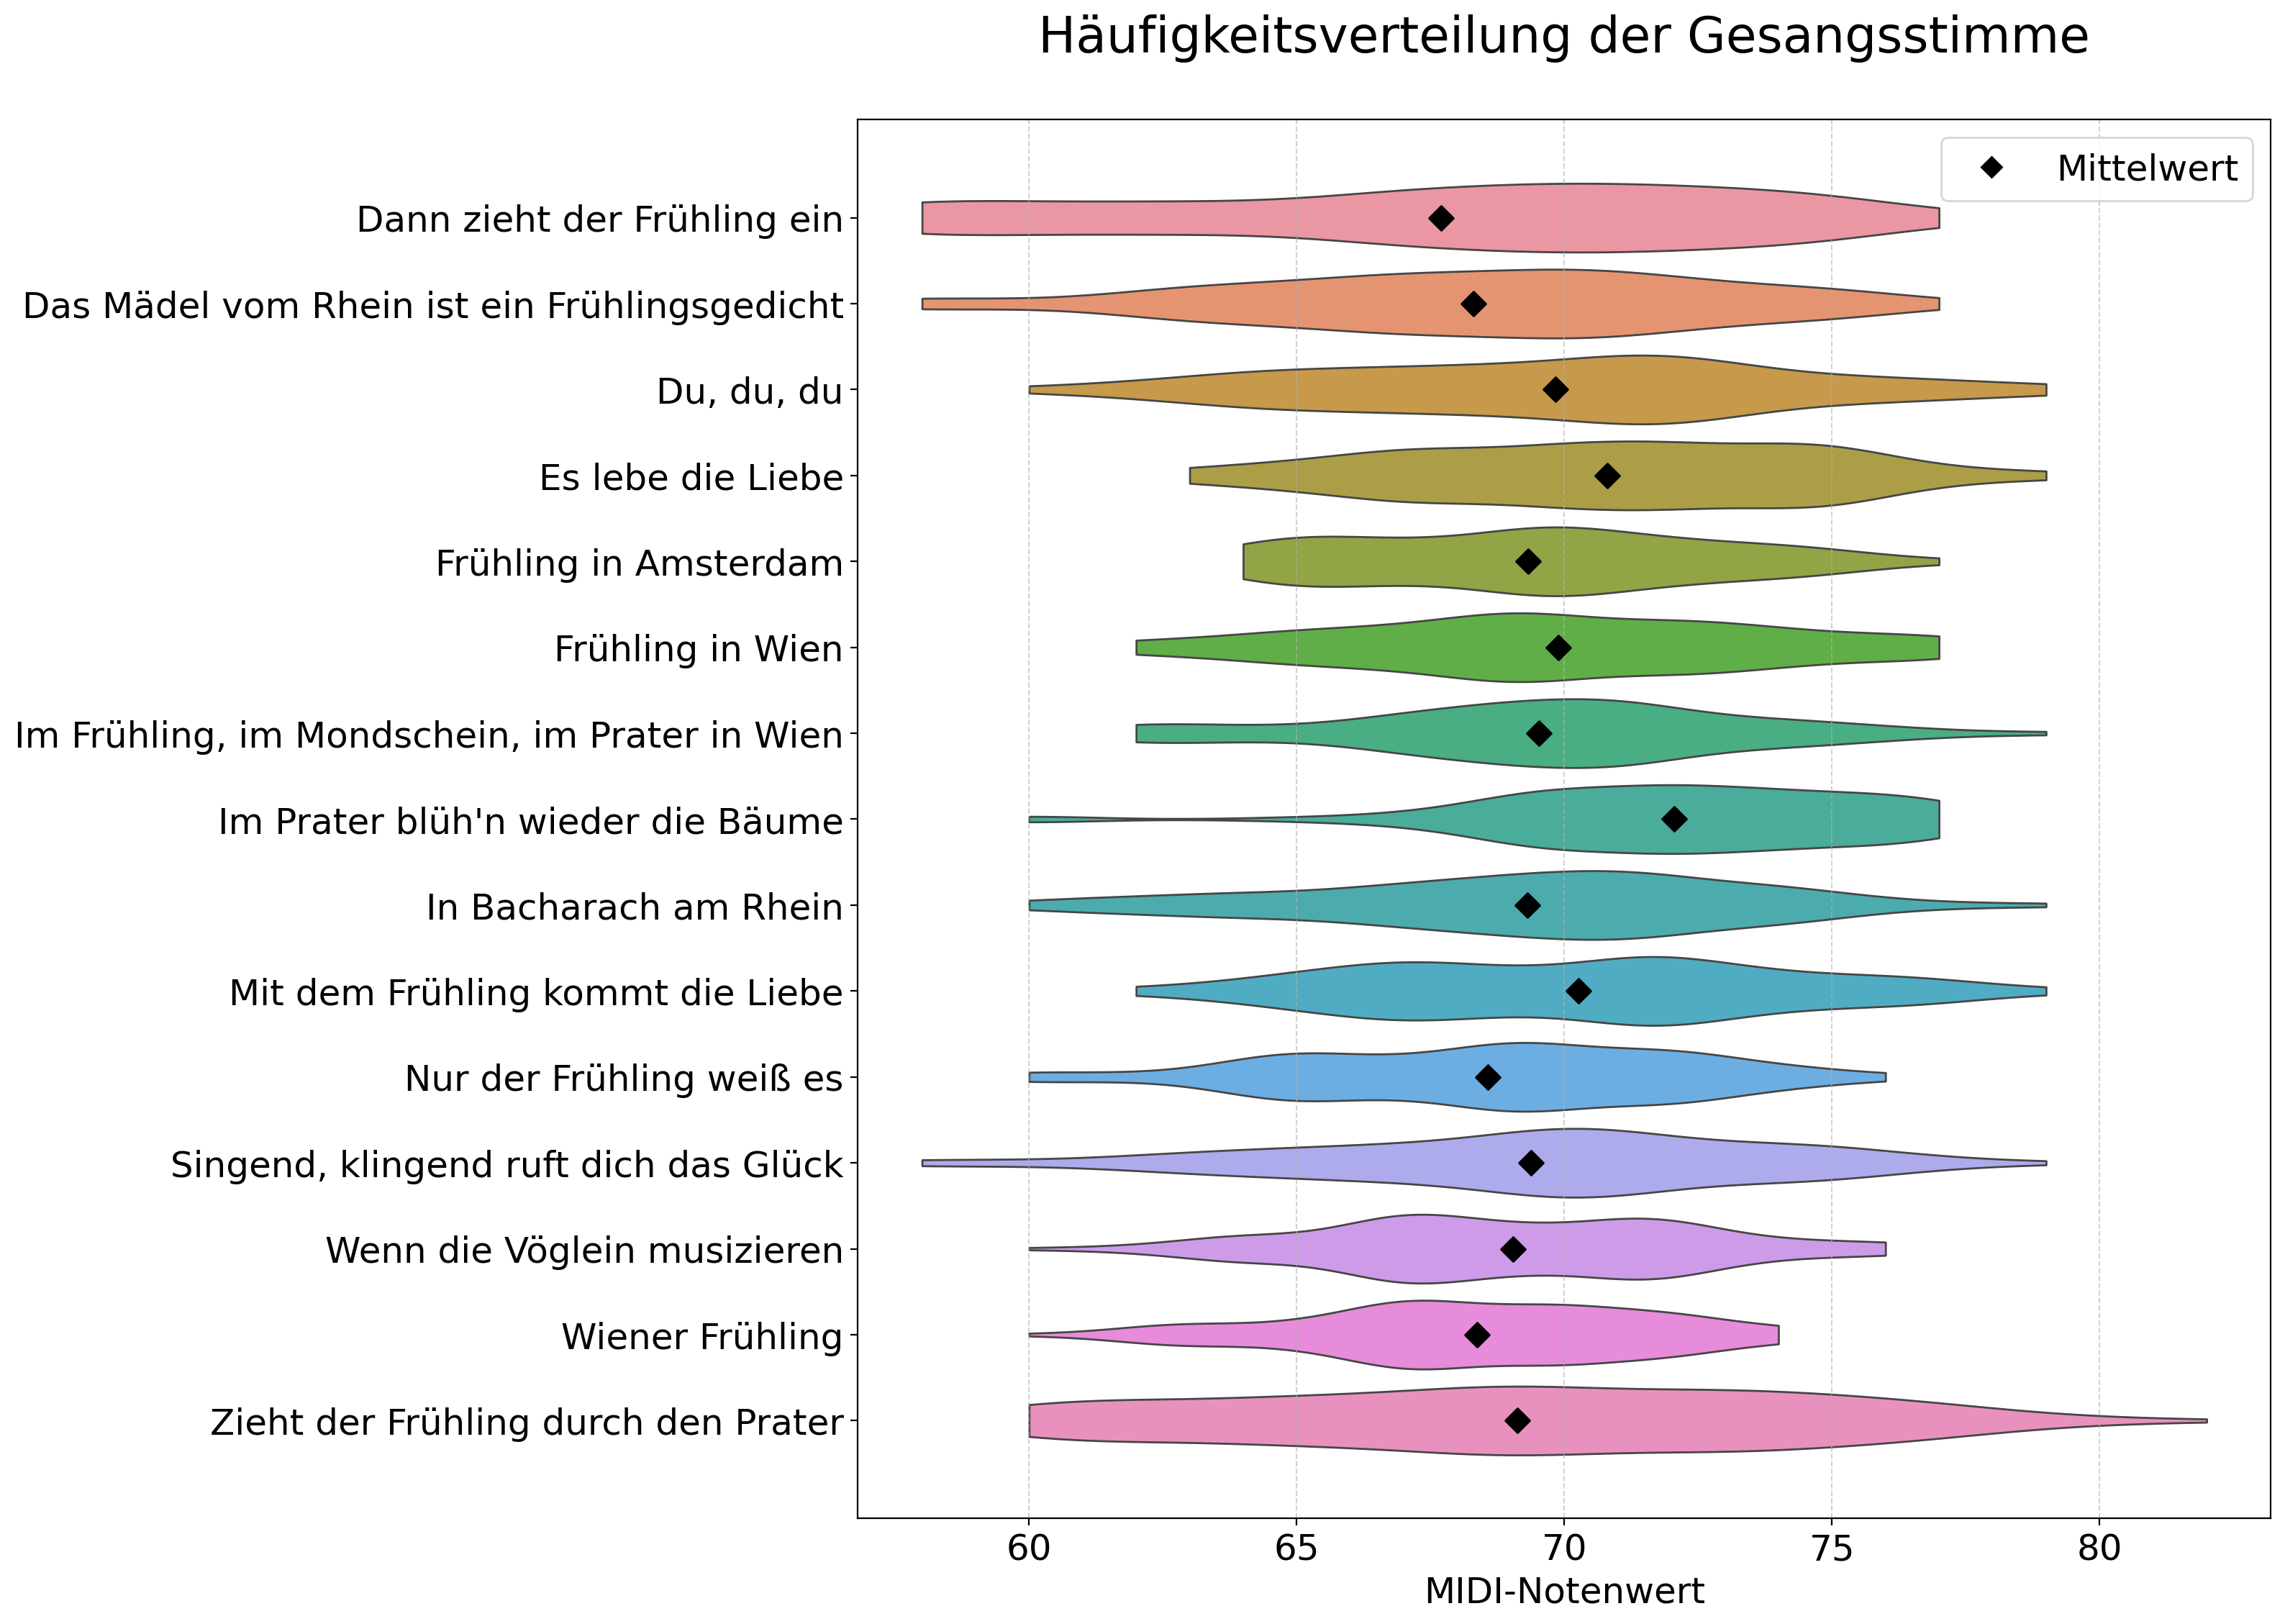

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Neue Titel für die Stücke
new_titles = {
    'Dann_zieht_der_Fruehling_ein.mxl': 'Dann zieht der Frühling ein',
    'Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl': 'Das Mädel vom Rhein ist ein Frühlingsgedicht',
    'Du_du_du.mxl': 'Du, du, du',
    'Es_lebe_die_Liebe.mxl': 'Es lebe die Liebe',
    'Fruehling_in_Amsterdam.mxl': 'Frühling in Amsterdam',
    'Fruehling_in_Wien.mxl': 'Frühling in Wien',
    'Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl': 'Im Frühling, im Mondschein, im Prater in Wien',
    'Im_Prater_bluehn_wieder_die_Baeume.mxl': 'Im Prater blüh\'n wieder die Bäume',
    'In_Bacharach_am_Rhein.mxl': 'In Bacharach am Rhein',
    'Mit_dem_Fruehling_kommt_die_Liebe.mxl': 'Mit dem Frühling kommt die Liebe',
    'Nur_der_Fruehling_weiss_es....mxl': 'Nur der Frühling weiß es',
    'Singend,_klingend_ruft_dich_das_Glueck.mxl': 'Singend, klingend ruft dich das Glück',
    'Wenn_die_Voeglein_musizieren....mxl': 'Wenn die Vöglein musizieren',
    'Wiener_Fruehling.mxl': 'Wiener Frühling',
    'Zieht_der_Fruehling_durch_den_Prater.mxl': 'Zieht der Frühling durch den Prater'
}

# Daten in ein DataFrame umwandeln für Seaborn (nur Gesangsnoten)
data = []
for piece, notes in vocal_notes_all_pieces.items():
    # Verwende die neuen Titel
    piece_title = new_titles.get(piece, piece)
    for note in notes:
        data.append({'Stück': piece_title, 'Notenwert': note})

df_vocal = pd.DataFrame(data)

# Manuelle Mittelwerte für jedes Stück
mittelwerte = {
    'Dann zieht der Frühling ein': 67.70,
    'Das Mädel vom Rhein ist ein Frühlingsgedicht': 68.30,
    'Du, du, du': 69.84,
    'Es lebe die Liebe': 70.80,
    'Frühling in Amsterdam': 69.32,
    'Frühling in Wien': 69.89,
    'Im Frühling, im Mondschein, im Prater in Wien': 69.53,
    'Im Prater blüh\'n wieder die Bäume': 72.05,
    'In Bacharach am Rhein': 69.31,
    'Mit dem Frühling kommt die Liebe': 70.26,
    'Nur der Frühling weiß es': 68.57,
    'Singend, klingend ruft dich das Glück': 69.38,
    'Wenn die Vöglein musizieren': 69.04,
    'Wiener Frühling': 68.37,
    'Zieht der Frühling durch den Prater': 69.12
}

# Erstelle eine Figur für den horizontalen Violinplot
plt.figure(figsize=(16, 12))

# Erstelle den Violinplot horizontal (y = Stück, x = Notenwert)
sns.violinplot(y='Stück', x='Notenwert', data=df_vocal, scale='width', inner=None, linewidth=1, cut=0)

# Füge die Punkte hinzu (Stacked Dotplot / Jitter)
#sns.stripplot(y='Stück', x='Notenwert', data=df_vocal, color='grey', size=3, jitter=True, alpha=0.3, dodge=True)

# Füge die manuellen Mittelwerte als schwarze Punkte hinzu
for idx, (stueck, mittelwert) in enumerate(mittelwerte.items()):
    plt.scatter(mittelwert, idx, color='black', marker="D", s=75, zorder=10, label='Mittelwert' if idx == 0 else "")

# Linien für die MIDI-Werte im Hintergrund hinzufügen
plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Plot anpassen
plt.title('Häufigkeitsverteilung der Gesangsstimme\n', fontsize=25)
plt.ylabel('')
plt.xlabel('MIDI-Notenwert', fontsize=18)
plt.yticks(fontsize=18)  # Stücke Textgröße
plt.xticks(fontsize=18)

# Legende erstellen
import matplotlib.patches as mpatches
mean_legend = plt.Line2D([0], [0], marker='D', color='w', label='Mittelwert', 
                          markerfacecolor='black', markersize=9)
# point_legend = plt.Line2D([0], [0], marker='o', color='w', label='Notenvorkommen', 
#                           markerfacecolor='grey', markersize=6, alpha=0.3)

# Legende unter dem Plot platzieren
plt.legend(handles=[mean_legend], bbox_to_anchor=(1,1), loc='upper right', fontsize=18)


# Anpassung des Layouts für Platzierung der Legende
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Speichern der Grafik
plt.savefig('ambitus_gesang_nach_stuecken_Violinplot.png', dpi=300, bbox_inches='tight')
# Plot anzeigen
plt.show()


### Violinplot für Ambitus in Klavier- und Gesangsstimme (plus Mittelwert und Häufigkeiten)

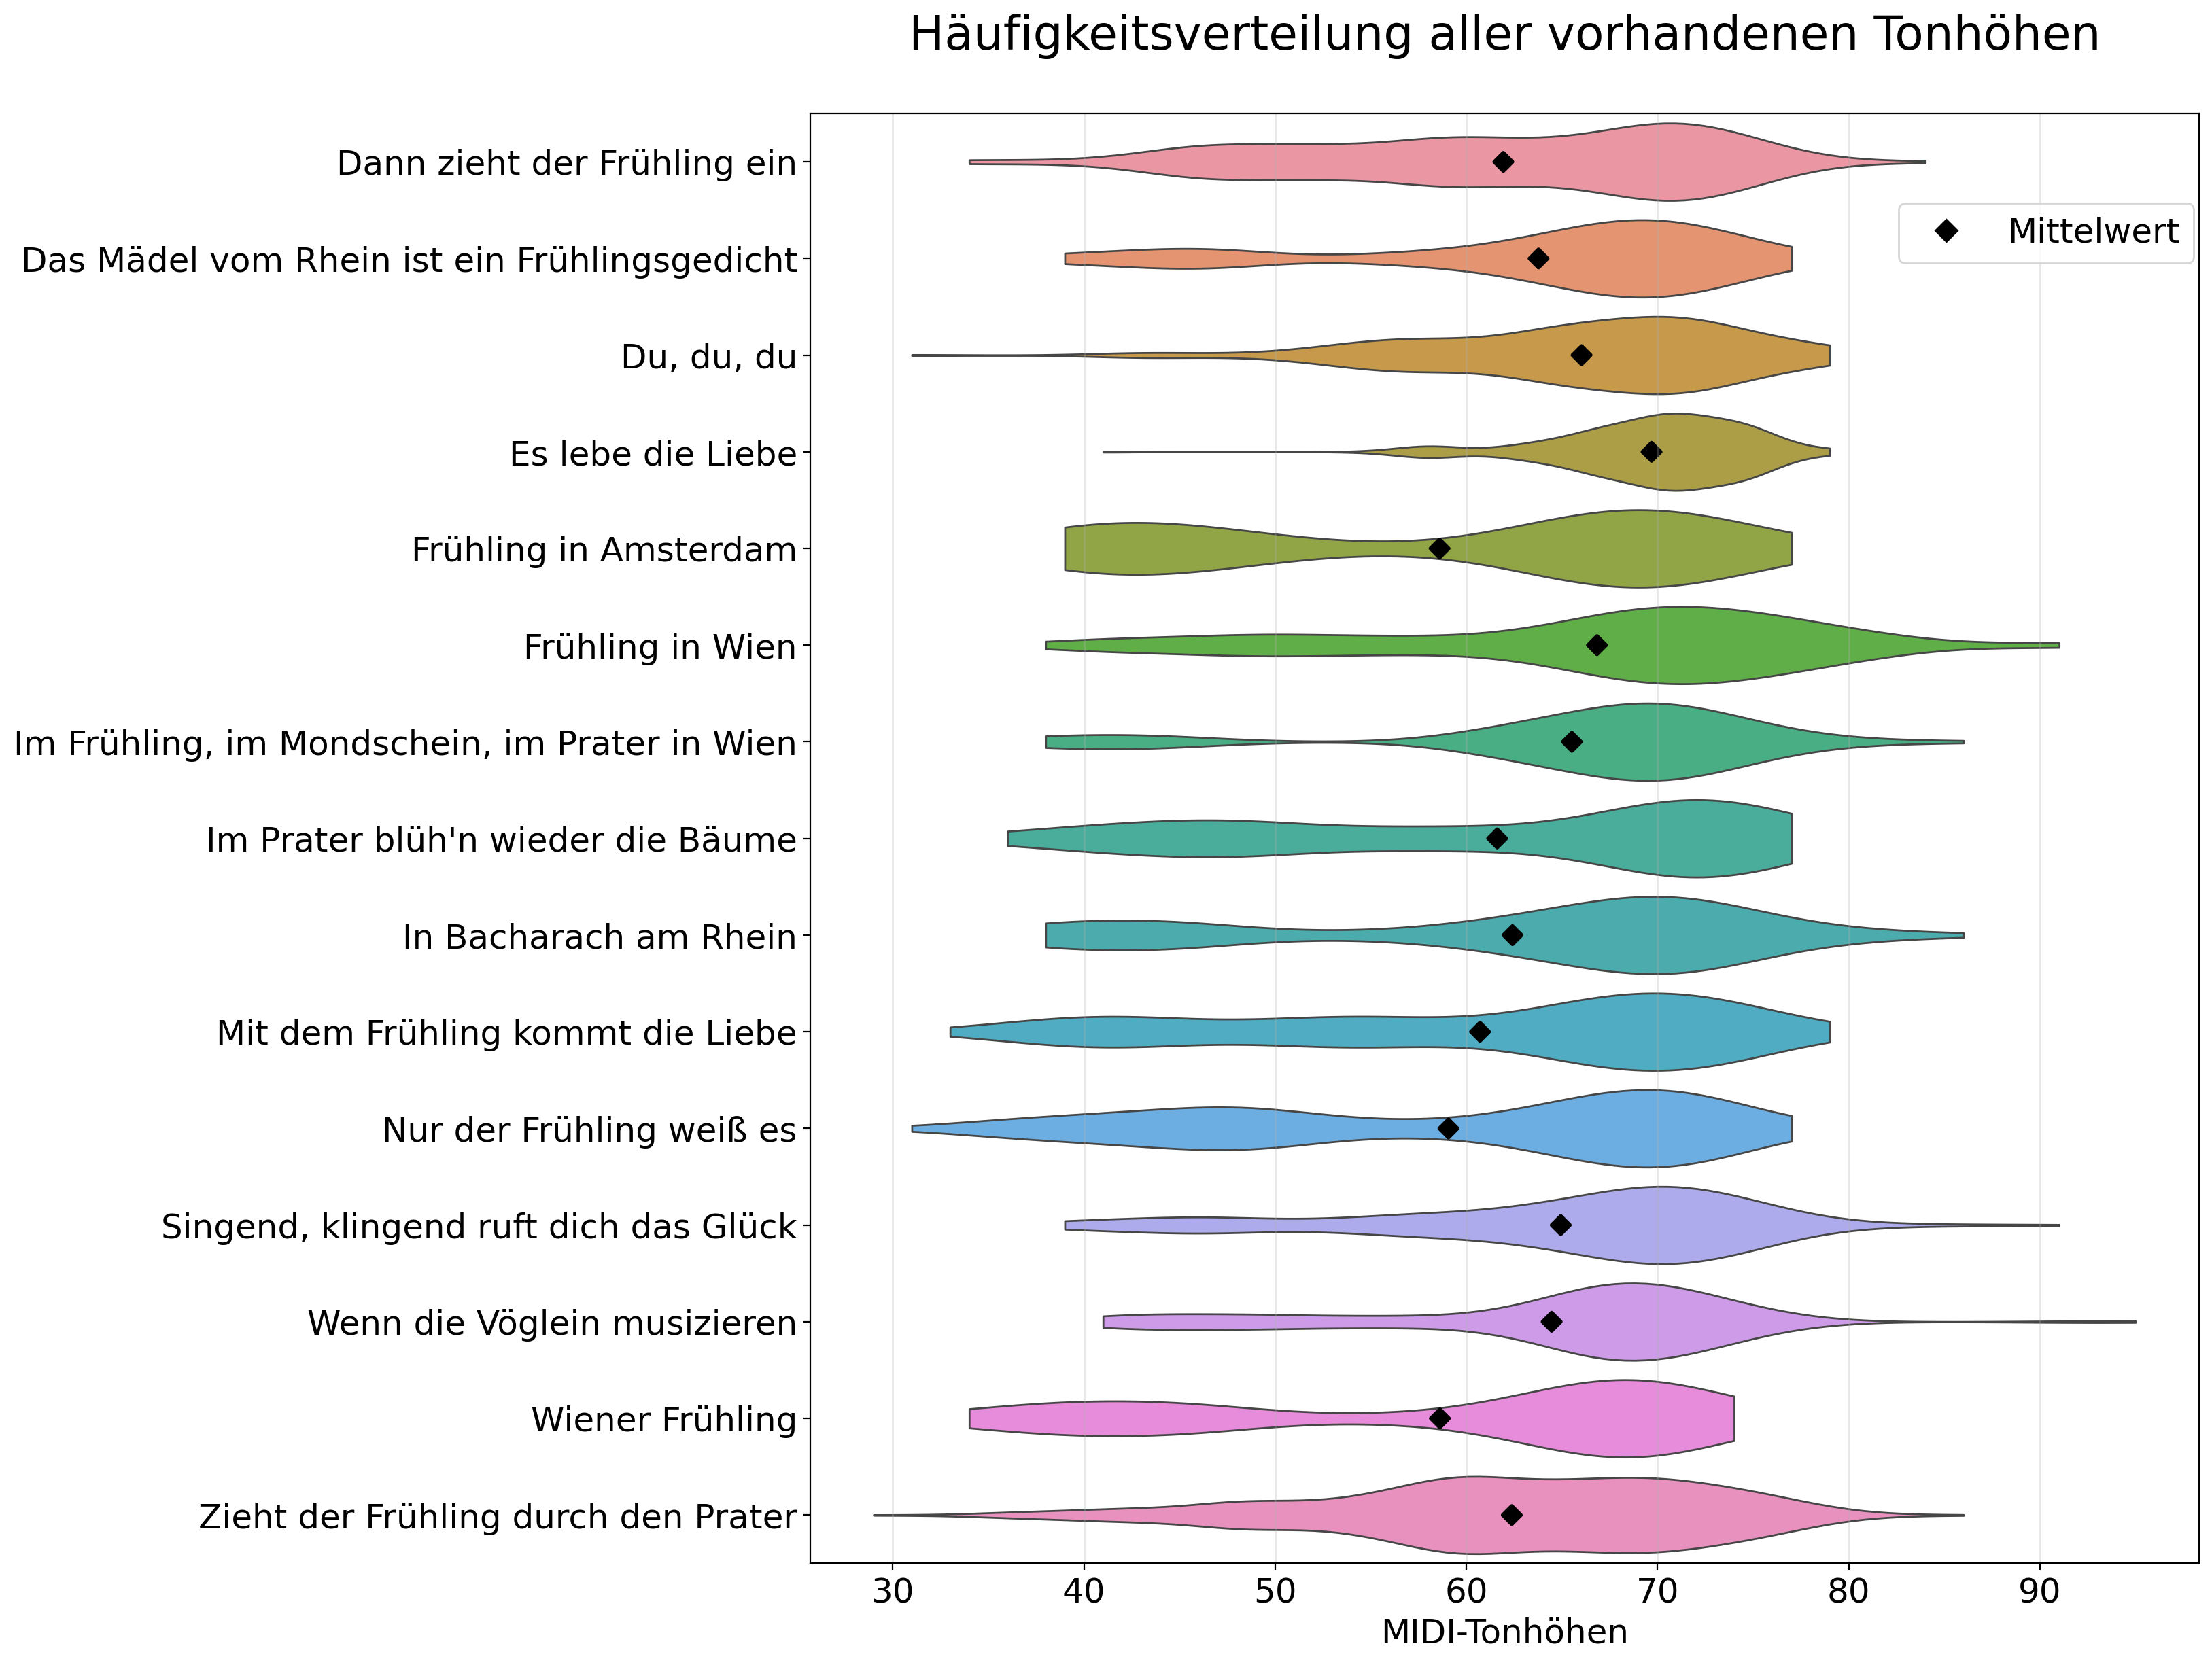

In [34]:
new_titles = {
    'Dann_zieht_der_Fruehling_ein.mxl': 'Dann zieht der Frühling ein',
    'Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl': 'Das Mädel vom Rhein ist ein Frühlingsgedicht',
    'Du_du_du.mxl': 'Du, du, du',
    'Es_lebe_die_Liebe.mxl': 'Es lebe die Liebe',
    'Fruehling_in_Amsterdam.mxl': 'Frühling in Amsterdam',
    'Fruehling_in_Wien.mxl': 'Frühling in Wien',
    'Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl': 'Im Frühling, im Mondschein, im Prater in Wien',
    'Im_Prater_bluehn_wieder_die_Baeume.mxl': 'Im Prater blüh\'n wieder die Bäume',
    'In_Bacharach_am_Rhein.mxl': 'In Bacharach am Rhein',
    'Mit_dem_Fruehling_kommt_die_Liebe.mxl': 'Mit dem Frühling kommt die Liebe',
    'Nur_der_Fruehling_weiss_es....mxl': 'Nur der Frühling weiß es',
    'Singend,_klingend_ruft_dich_das_Glueck.mxl': 'Singend, klingend ruft dich das Glück',
    'Wenn_die_Voeglein_musizieren....mxl': 'Wenn die Vöglein musizieren',
    'Wiener_Fruehling.mxl': 'Wiener Frühling',
    'Zieht_der_Fruehling_durch_den_Prater.mxl': 'Zieht der Frühling durch den Prater'
}

# Daten in ein DataFrame umwandeln für Seaborn
data = []
for piece, notes in all_notes.items():
    # Verwende die neuen Titel, falls verfügbar, sonst den Dateinamen
    piece_title = new_titles.get(piece, piece)
    for note_value in notes:
        data.append({'Stück': piece_title, 'Notenwert': note_value})

df = pd.DataFrame(data)

# Erstelle eine Figur
plt.figure(figsize=(14, 12))

# Erstelle den Violinplot mit halber Breite (flacher Violinplot) horizontal
sns.violinplot(y='Stück', x='Notenwert', data=df, scale='width', inner=None, linewidth=1, cut=0)
plt.grid(True, which='both', axis='x', linestyle='-', linewidth=1, alpha=0.3)

# Füge die Punkte auf der rechten Hälfte hinzu (gestapelte Punkte)
#sns.stripplot(y='Stück', x='Notenwert', data=df, color='grey', size=3, jitter=True, alpha=0.3, dodge=True)

# Füge den Mittelwert hinzu
sns.pointplot(y='Stück', x='Notenwert', data=df, estimator=np.mean, color='black', markers='D', join=False, errorbar=None)

# Erstelle Legende für die verschiedenen Elemente
import matplotlib.patches as mpatches
# Legenden-Handles für die verschiedenen Plottypen
mean_legend = plt.Line2D([0], [0], marker='D', color='w', label='Mittelwert', 
                          markerfacecolor='black', markersize=10)
#point_legend = plt.Line2D([0], [0], marker='o', color='w', label='Notenwerte', 
#                          markerfacecolor='grey', markersize=7, alpha=0.3)

# Legende unter dem Plot platzieren
plt.legend(handles=[mean_legend], bbox_to_anchor=(0.89, 0.95), loc='upper center', fontsize=18, ncol=2)

# Anpassung des Layouts für die Platzierung der Legende unter dem Plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Verschiebt den Plot etwas nach oben

# Plot anpassen
plt.title('Häufigkeitsverteilung aller vorhandenen Tonhöhen\n', fontsize=25)
plt.ylabel('')
plt.xlabel('MIDI-Tonhöhen', fontsize=18)
plt.yticks(fontsize=18)  # Stücke Textgröße
plt.xticks(fontsize=18)

#plt.tight_layout()
# Speichern der Grafik
plt.savefig('ambitus_gesamt_nach_stuecken_Violinplot.png', dpi=300, bbox_inches='tight')
# Plot anzeigen
plt.show()

##### same aber mit Mittelwert der Gesangsstimme

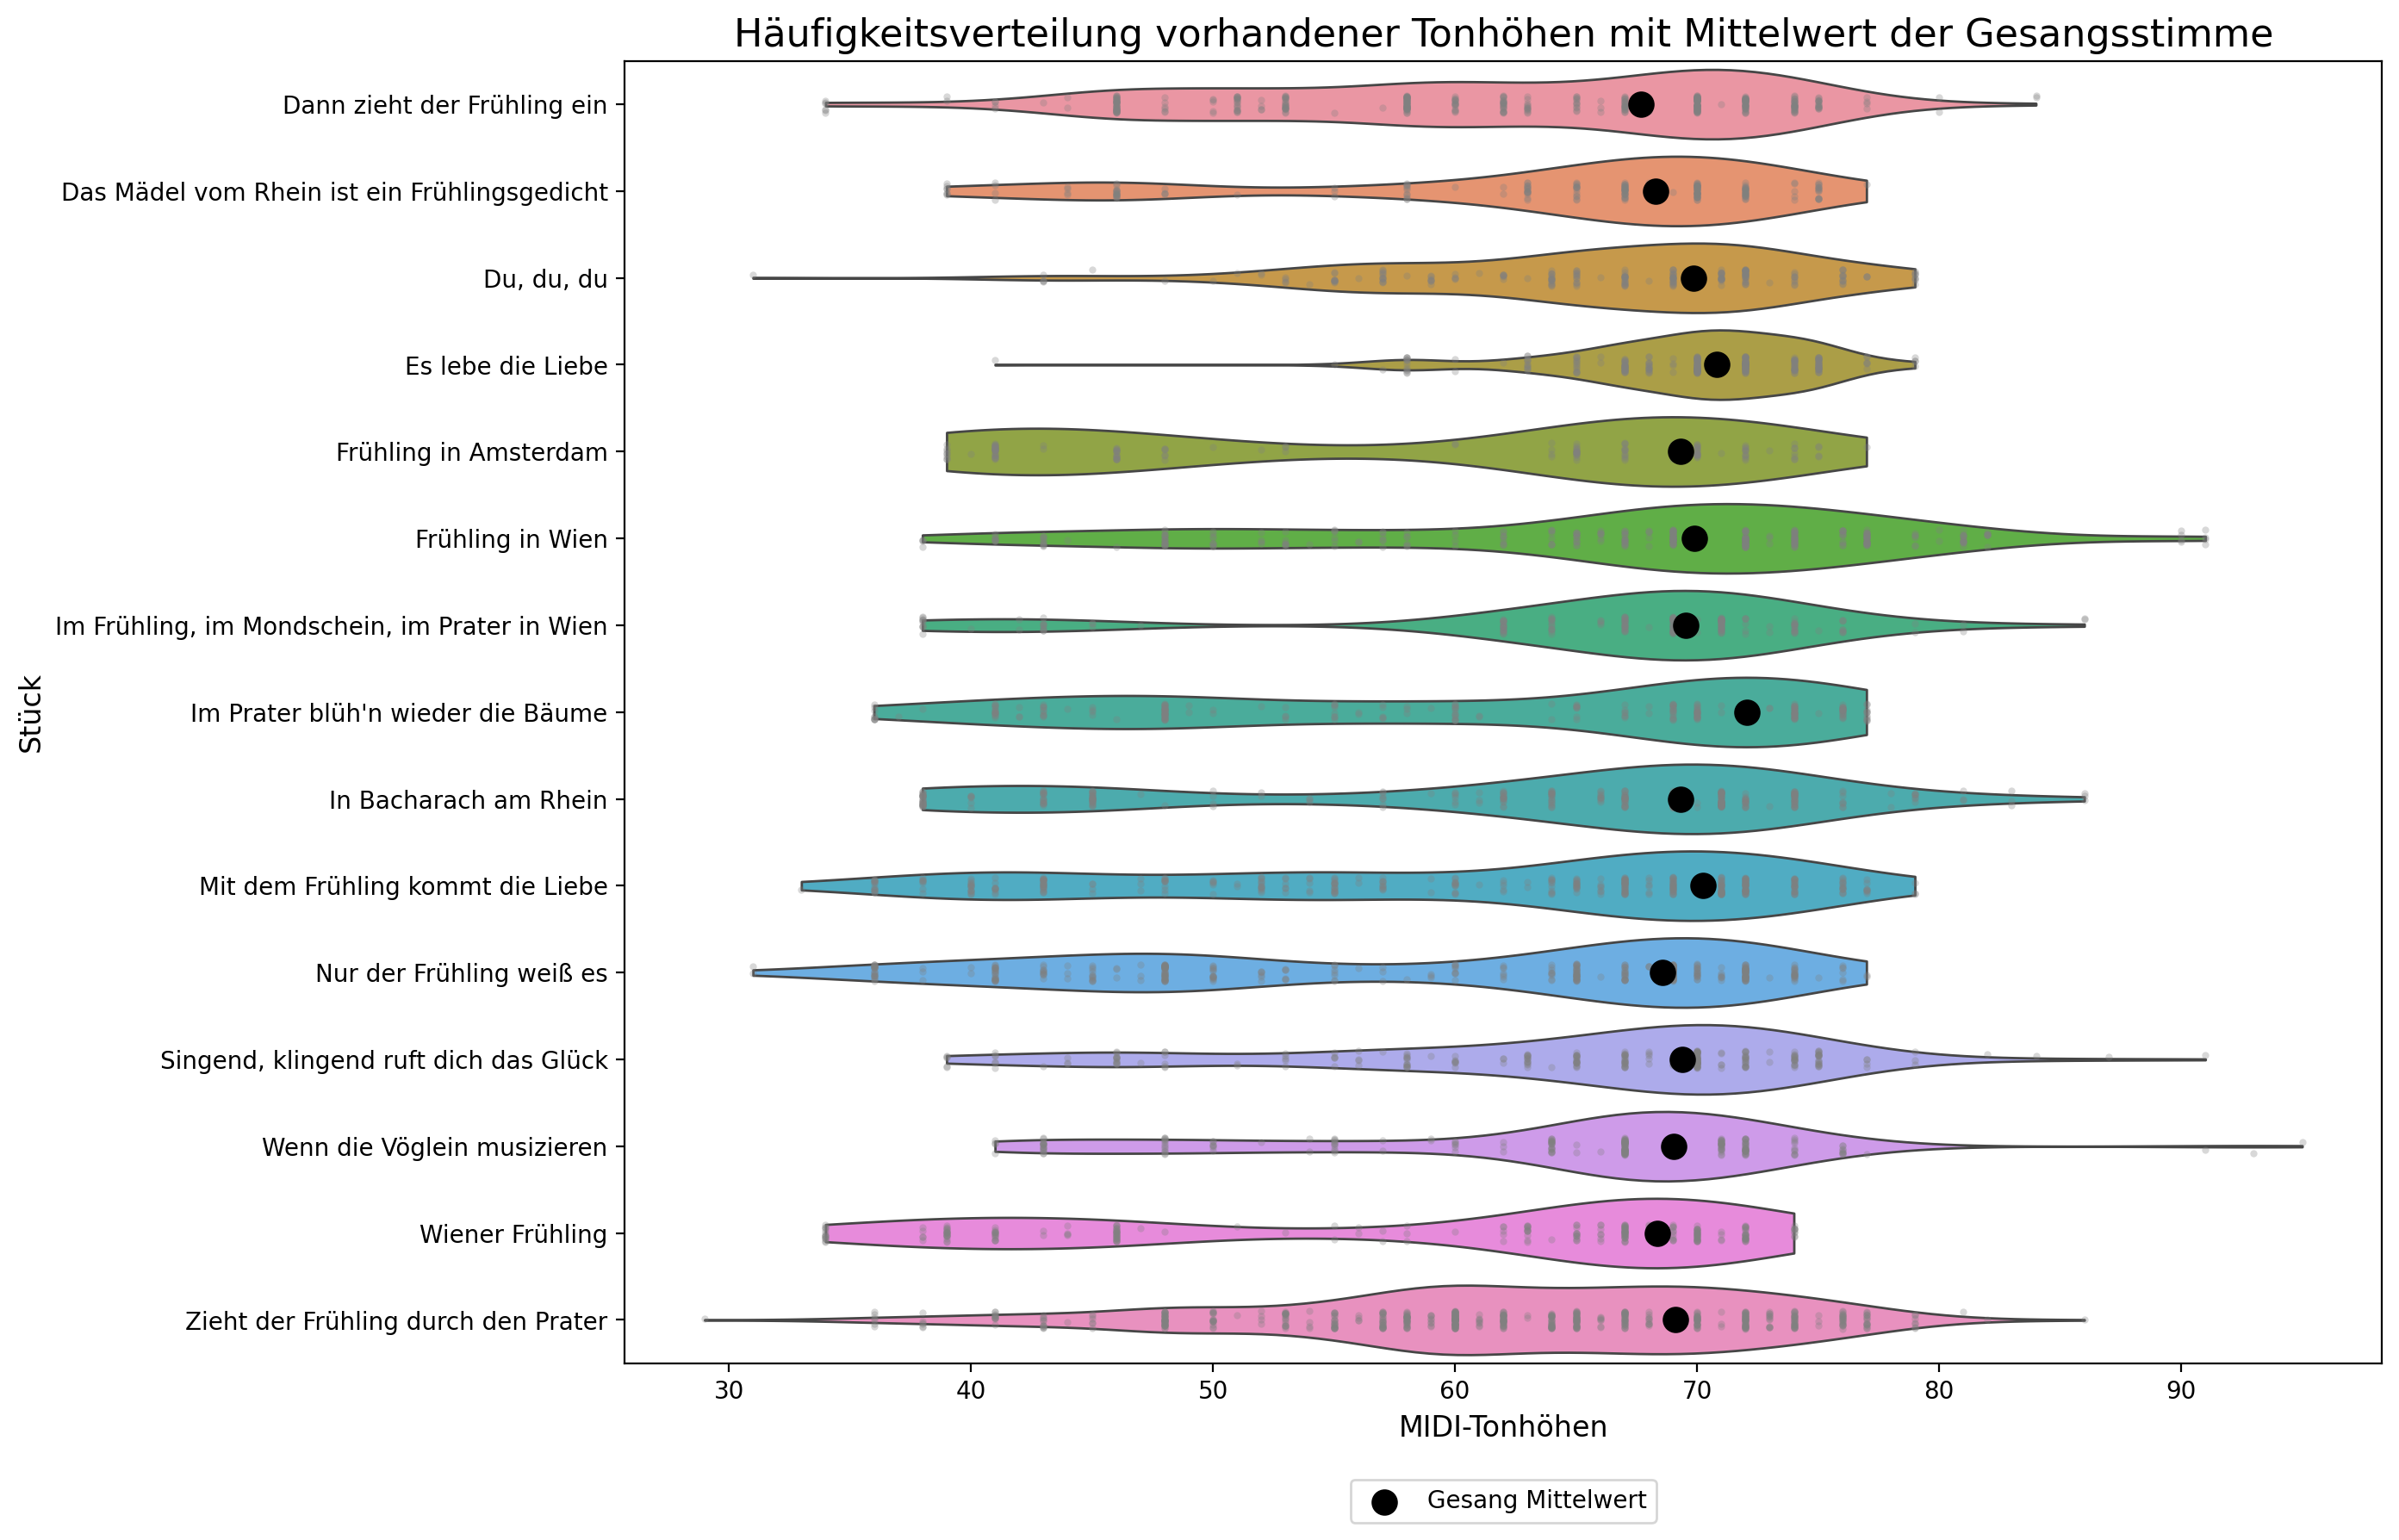

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Deine Daten inklusive der Mittelwerte, die du manuell vorgeben möchtest
mittelwerte = {
    "Dann zieht der Frühling ein": 67.70,
    "Das Mädel vom Rhein ist ein Frühlingsgedicht": 68.30,
    "Du, du, du": 69.84,
    "Es lebe die Liebe": 70.80,
    "Frühling in Amsterdam": 69.32,
    "Frühling in Wien": 69.89,
    "Im Frühling, im Mondschein, im Prater in Wien": 69.53,
    "Im Prater blüh'n wieder die Bäume": 72.05,
    "In Bacharach am Rhein": 69.31,
    "Mit dem Frühling kommt die Liebe": 70.26,
    "Nur der Frühling weiß es": 68.57,
    "Singend, klingend ruft dich das Glück": 69.38,
    "Wenn die Vöglein musizieren": 69.04,
    "Wiener Frühling": 68.37,
    "Zieht der Frühling durch den Prater": 69.12
}

# Deine zuvor gesammelten Notendaten in einem DataFrame
df = pd.DataFrame(data)  # data ist der DataFrame aus deinem vorherigen Beispiel mit den Notenwerten

# Alphabetische Sortierung der Stücke von oben nach unten
df_sorted = df.sort_values(by='Stück')

# Erstelle den Violinplot
plt.figure(figsize=(14, 9))
sns.violinplot(y='Stück', x='Notenwert', data=df_sorted, scale='width', inner=None, linewidth=1, cut=0)

# Füge die manuell vorgegebenen Mittelwerte als schwarze Punkte hinzu
for idx, (stueck, mittelwert) in enumerate(mittelwerte.items()):
    plt.scatter(mittelwert, idx, color='black', s=100, zorder=10, label='Gesang Mittelwert' if idx == 0 else "")

# Füge die grauen Punkte hinzu, die die Notenverteilungen darstellen
sns.stripplot(y='Stück', x='Notenwert', data=df_sorted, color='grey', size=3, jitter=True, alpha=0.3, dodge=True)

# Plot anpassen
plt.title('Häufigkeitsverteilung vorhandener Tonhöhen mit Mittelwert der Gesangsstimme', fontsize=16)
plt.xlabel('MIDI-Tonhöhen', fontsize=12)
plt.ylabel('Stück', fontsize=12)

# Legende unter den Plot setzen
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Akkorde

### Stufen-Vorkommnisse für alle Stücke gemeinsam

In [7]:
import os
from music21 import *

def analyze_file(file_path):
    # Parse the score
    score = converter.parse(file_path)

    # Chordify the score
    score_chords = score.chordify()

    # Analyze key
    key_signature = score.analyze('key')

    # Dictionary to count occurrences of each Roman numeral figure
    roman_numeral_counts = {}

    # Annotate chords with Roman numerals based on the detected key and count frequencies
    for c in score_chords.recurse().getElementsByClass(chord.Chord):
        rn = roman.romanNumeralFromChord(c, key_signature)
        filtered_rn = rn.figure.replace('6', '').replace('4', '').replace('5', '')  # Remove '6' and '4' and '5'
        c.addLyric(filtered_rn)

        # Update count in the dictionary
        if filtered_rn in roman_numeral_counts:
            roman_numeral_counts[filtered_rn] += 1
        else:
            roman_numeral_counts[filtered_rn] = 1

    return roman_numeral_counts

def analyze_folder(directory_path):
    total_counts = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_counts = analyze_file(file_path)

            # Combine counts from the current file with the total counts
            for rn, count in file_counts.items():
                if rn in total_counts:
                    total_counts[rn] += count
                else:
                    total_counts[rn] = count

    return total_counts

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the combined counts
combined_counts = analyze_folder(directory_path)

# Sort the Roman numeral figures by their counts in descending order
sorted_roman_numerals = sorted(combined_counts.items(), key=lambda item: item[1], reverse=True)

# Print the top 10 most frequent Roman numeral figures
print("Top 10 Stufen aus allen Stücken:")
for rn, count in sorted_roman_numerals[:10]:
    print(f"{rn}: {count}")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

In [8]:
# # Print the top 15 most frequent Roman numeral figures
# print("Top 15 Stufen aus allen Stücken:")
# for rn, count in sorted_roman_numerals[:15]:
#     print(f"{rn}: {count}")

Top 15 Stufen aus allen Stücken:
I: 905
iii: 252
vi: 210
IV: 210
V: 202
ii: 198
V2: 197
V7: 162
v: 156
i: 102
vi2: 90
v7: 60
II7#3: 58
vii: 58
IV72: 47


#### Top 5 Stufen für einzelne Stücke

In [9]:
import os
from music21 import *

def analyze_file(file_path):
    # Parse the score
    score = converter.parse(file_path)

    # Chordify the score
    score_chords = score.chordify()

    # Analyze key
    key_signature = score.analyze('key')

    # Dictionary to count occurrences of each Roman numeral figure
    roman_numeral_counts = {}

    # Annotate chords with Roman numerals based on the detected key and count frequencies
    for c in score_chords.recurse().getElementsByClass(chord.Chord):
        rn = roman.romanNumeralFromChord(c, key_signature)
        filtered_rn = rn.figure.replace('6', '').replace('4', '')  # Remove '6' and '4'
        c.addLyric(filtered_rn)

        # Update count in the dictionary
        if filtered_rn in roman_numeral_counts:
            roman_numeral_counts[filtered_rn] += 1
        else:
            roman_numeral_counts[filtered_rn] = 1

    return roman_numeral_counts

def analyze_folder(directory_path):
    all_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_counts = analyze_file(file_path)

            # Store the results for the current file
            all_results[filename] = file_counts

    return all_results

def print_top_5_roman_numerals(roman_numeral_counts, title):
    # Sort the Roman numeral figures by their counts in descending order
    sorted_roman_numerals = sorted(roman_numeral_counts.items(), key=lambda item: item[1], reverse=True)

    # Print the top 5 most frequent Roman numeral figures
    print(f"\nTop 5 Stufen in {title}:")
    for rn, count in sorted_roman_numerals[:5]:
        print(f"{rn}: {count}")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the results for each file
results = analyze_folder(directory_path)

# Print the top 5 Roman numeral figures for each file
for filename, counts in results.items():
    print_top_5_roman_numerals(counts, filename)


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

In [11]:
def print_top_10_roman_numerals(roman_numeral_counts, title):
    # Sort the Roman numeral figures by their counts in descending order
    sorted_roman_numerals = sorted(roman_numeral_counts.items(), key=lambda item: item[1], reverse=True)

    # Print the top 10 most frequent Roman numeral figures
    print(f"\nTop 10 Stufen in {title}:")
    for rn, count in sorted_roman_numerals[:10]:
        print(f"{rn}: {count}")

# Print the top 10 Roman numeral figures for each file
for filename, counts in results.items():
    print_top_10_roman_numerals(counts, filename)


Top 10 Stufen in Dann_zieht_der_Fruehling_ein.mxl:
I: 48
V2: 45
vi: 20
IV: 16
V: 16
iii72: 13
vi2: 13
v7: 12
ii: 12
V7: 12

Top 10 Stufen in Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl:
I: 63
IV: 22
V2: 17
v: 12
i: 11
II7#3: 9
V: 9
i5: 7
iii: 6
II75#3: 5

Top 10 Stufen in Du_du_du.mxl:
I: 38
iii: 14
v: 13
IV: 11
vi: 10
vi5: 9
V7: 8
I7: 7
ii: 7
vii: 6

Top 10 Stufen in Es_lebe_die_Liebe.mxl:
I: 62
IV: 21
vi: 15
ii752: 13
V7: 12
ii: 12
ii5: 12
V: 10
v: 10
V5: 10

Top 10 Stufen in Fruehling_in_Amsterdam.mxl:
I: 65
V7: 24
IV: 22
ii: 7
V: 6
iii: 4
V2: 4
I5: 3
V#753: 3
v+#7#5: 2

Top 10 Stufen in Fruehling_in_Wien.mxl:
I: 47
iii: 19
V2: 15
iv: 14
i: 10
vi: 10
VI#2: 8
V#52: 8
vi3: 8
i5: 7

Top 10 Stufen in Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl:
I: 41
v: 15
iii: 13
V7: 11
ii: 11
vi: 7
I5: 7
II#2: 7
iii73: 6
V5: 6

Top 10 Stufen in Im_Prater_bluehn_wieder_die_Baeume.mxl:
I: 54
V: 25
V2: 16
iii: 12
v: 11
ii: 11
vi: 11
IV: 7
vi2: 7
V7: 6

Top 10 Stufen in In_Bacharach_am_Rh

## chords/Stufen bei Wörtern (aber Stufen sind bissi crazy noch)

#### Stufen für jedes Stück und Wort einzeln (ohne 4, 6, 5 Umkehrung) und Wörter gesammelt

In [2]:
import os
from collections import defaultdict
from music21 import *

def chords_at_word_occurrences(score, words, key_signature):
    results = {}
    ls = search.lyrics.LyricSearcher(score)  # Create a LyricSearcher object

    for word in words:
        search_results = ls.search(word)  # Search for the word
        chords = []

        for match in search_results:
            for thisNote in match.els:
                # Find the chord at the note's position
                measure = thisNote.measureNumber
                score_chords = score.measure(measure).chordify()

                for c in score_chords.recurse().getElementsByClass('Chord'):
                    if c.offset <= thisNote.offset < c.offset + c.quarterLength:
                        rn = roman.romanNumeralFromChord(c, key_signature)
                        filtered_rn = rn.figure.replace('6', '').replace('4', '')  # Remove '6' and '4'
                        chords.append(filtered_rn)
                        break

        results[word] = chords

    return results

def analyze_file(file_path):
    score = converter.parse(file_path)
    key = score.analyze('key')

    words = ["Frühling", "frühling", "Liebe", "liebe", "Herz", "Sonne", "küss", "küssen", "küß", "blüh", "Blühen", "Glück"]
    word_chords = chords_at_word_occurrences(score, words, key)
    
    # Dictionary to count occurrences of each Roman numeral figure
    roman_numeral_counts = {}

    # Chordify the score
    score_chords = score.chordify()
    
    # Annotate chords with Roman numerals based on the detected key and count frequencies
    for c in score_chords.recurse().getElementsByClass('Chord'):
        rn = roman.romanNumeralFromChord(c, key)
        # Removing 2, 3, 4, 5, 6 -> but ACHTUNG for #3#5 o.Ä. wenns crazy Akkorde sind, fehlt der Kontext
        filtered_rn = rn.figure.replace('6', '').replace('4', '').replace('5', '').replace('3', '').replace('2', '')  # Remove '6', '4' and '5'
        c.addLyric(filtered_rn)

        # Update count in the dictionary
        if filtered_rn in roman_numeral_counts:
            roman_numeral_counts[filtered_rn] += 1
        else:
            roman_numeral_counts[filtered_rn] = 1

    result = {
        'Tonart': f"{key.tonic.name} {key.mode}",
        'Wörter': word_chords,
        'Stufen': roman_numeral_counts
    }

    return result

def analyze_folder(directory_path):
    all_results = {}
    combined_word_chords = defaultdict(lambda: defaultdict(int))  # Dictionary to store combined results for each word

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_results = analyze_file(file_path)

            # Store the results for the current file
            all_results[filename] = file_results

            # Combine the results for all files
            for word, chords in file_results['Wörter'].items():
                for chord in chords:
                    combined_word_chords[word][chord] += 1

    return all_results, combined_word_chords

def print_top_5_roman_numerals(roman_numeral_counts, title):
    # Sort the Roman numeral figures by their counts in descending order
    sorted_roman_numerals = sorted(roman_numeral_counts.items(), key=lambda item: item[1], reverse=True)

    # Print the top 5 most frequent Roman numeral figures
    print(f"\nTop 5 Stufen in {title}:")
    for rn, count in sorted_roman_numerals[:5]:
        print(f"{rn}: {count}")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the results for each file and combined word chords
results, combined_word_chords = analyze_folder(directory_path)

# Print the top 5 Roman numeral figures for each file
for filename, info in results.items():
    print(f"\nStück: {filename}")
    print(f"Tonart des Stücks: {info['Tonart']}")
    
    for word, chords in info['Wörter'].items():
        if chords:
            print(f"Stufen für '{word}': {', '.join(chords)}")
        else:
            print(f"Keine Akkorde gefunden für '{word}'")

    print_top_5_roman_numerals(info['Stufen'], filename)

# Print the most common chords for each word across all pieces
print("\nHäufigste Stufen für jedes Wort über alle Stücke hinweg:")
for word, chord_counts in combined_word_chords.items():
    print(f"\nHäufigste Stufen für '{word}':")
    sorted_chords = sorted(chord_counts.items(), key=lambda item: item[1], reverse=True)
    for chord, count in sorted_chords[:5]:
        print(f"{chord}: {count} mal")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

In [5]:
# Print the top 5 Roman numeral figures for each file
for filename, info in results.items():
    print_top_5_roman_numerals(info['Stufen'], filename)



Top 5 Stufen in Dann_zieht_der_Fruehling_ein.mxl:
V: 67
I: 51
vi: 40
v: 20
iii: 17

Top 5 Stufen in Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl:
I: 65
V: 27
IV: 22
i: 18
v: 17

Top 5 Stufen in Du_du_du.mxl:
I: 44
vi: 28
ii: 19
iii: 16
v: 14

Top 5 Stufen in Es_lebe_die_Liebe.mxl:
I: 62
V: 29
IV: 24
ii: 24
vi: 21

Top 5 Stufen in Fruehling_in_Amsterdam.mxl:
I: 68
V7: 25
IV: 24
V: 12
ii: 9

Top 5 Stufen in Fruehling_in_Wien.mxl:
I: 47
V: 25
iii: 19
vi: 19
i: 17

Top 5 Stufen in Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl:
I: 57
v: 19
V7: 16
iii: 16
ii: 16

Top 5 Stufen in Im_Prater_bluehn_wieder_die_Baeume.mxl:
I: 61
V: 48
vi: 24
v: 14
iii: 12

Top 5 Stufen in In_Bacharach_am_Rhein.mxl:
I: 71
vi: 49
V7: 38
ii: 29
V: 23

Top 5 Stufen in Mit_dem_Fruehling_kommt_die_Liebe.mxl:
I: 48
iii: 35
V: 31
vi: 31
ii: 28

Top 5 Stufen in Nur_der_Fruehling_weiss_es....mxl:
I: 74
iii: 36
V7: 19
V: 18
ii: 14

Top 5 Stufen in Singend,_klingend_ruft_dich_das_Glueck.mxl:
I: 71
V: 48
vi: 27


In [40]:
# Print the most common chords for each word across all pieces
print("\nHäufigste Stufen für jedes Wort über alle Stücke hinweg:")
for word, chord_counts in combined_word_chords.items():
    print(f"\nHäufigste Stufen für '{word}':")
    sorted_chords = sorted(chord_counts.items(), key=lambda item: item[1], reverse=True)
    for chord, count in sorted_chords[:10]:
        print(f"{chord}: {count}")


Häufigste Stufen für jedes Wort über alle Stücke hinweg:

Häufigste Stufen für 'Frühling':
I: 31
IV: 5
ii: 5
iii: 4
ii2: 4
IV72: 4
v+#7#5: 2
I5: 2
V+: 2
i: 2

Häufigste Stufen für 'Liebe':
IV: 9
I: 9
V2: 5
ii5: 4
V: 3
III: 2
III75#3: 2
iii: 2
iii2: 1
vi: 1

Häufigste Stufen für 'liebe':
V2: 2
ii: 2
ii3: 2
iii2: 1
vi: 1
v5: 1
V: 1
v7: 1
I: 1
V3: 1

Häufigste Stufen für 'Herz':
I: 3
V: 3
vii: 2
iii: 2
ii7: 1
ii3: 1
vi: 1
iii72: 1
ii: 1
bVI#75#: 1

Häufigste Stufen für 'Sonne':
V2: 2
iii2: 1
V: 1
IV72: 1
V7: 1
v7: 1
vii: 1

Häufigste Stufen für 'küß':
I: 2
ii: 1
V7: 1
i: 1
iv: 1

Häufigste Stufen für 'küss':
I: 3
vi: 2
iii: 2
v: 1

Häufigste Stufen für 'küssen':
I: 2
iii: 2

Häufigste Stufen für 'blüh':
IV: 2
v: 2
I: 2
I72: 1
iii7: 1
V2: 1

Häufigste Stufen für 'Glück':
V: 4
I: 4
vi: 2
V7: 1
#v: 1
IV: 1

Häufigste Stufen für 'Blühen':
I: 2

Häufigste Stufen für 'frühling':
I: 1
I5#3#2: 1


#### ohne Umkehrungen

In [1]:
import os
from collections import defaultdict
from music21 import *

def normalize_figure(figure):
    # Remove digits and special characters after the chord figure
    return ''.join([char for char in figure if not char.isdigit() and char not in ['#', 'b', '(', ')', '/']])

def chords_at_word_occurrences(score, words, key_signature):
    results = {}
    ls = search.lyrics.LyricSearcher(score)  # Create a LyricSearcher object

    for word in words:
        search_results = ls.search(word)  # Search for the word
        chords = []

        for match in search_results:
            for thisNote in match.els:
                # Find the chord at the note's position
                measure = thisNote.measureNumber
                score_chords = score.measure(measure).chordify()

                for c in score_chords.recurse().getElementsByClass('Chord'):
                    if c.offset <= thisNote.offset < c.offset + c.quarterLength:
                        rn = roman.romanNumeralFromChord(c, key_signature)
                        normalized_rn = normalize_figure(rn.figure)  # Normalize the figure
                        chords.append(normalized_rn)
                        break

        results[word] = chords

    return results

def analyze_file(file_path):
    score = converter.parse(file_path)
    key = score.analyze('key')

    words = ["Frühling", "frühling", "Liebe", "liebe", "Herz", "Sonne", "küss", "küssen", "küß", "blüh", "Blühen", "Glück", "Wien", "wienerisch", "Wiener", "Wein", "Tanz"]
    word_chords = chords_at_word_occurrences(score, words, key)
    
    # Dictionary to count occurrences of each Roman numeral figure
    roman_numeral_counts = {}

    # Chordify the score
    score_chords = score.chordify()
    
    # Annotate chords with Roman numerals based on the detected key and count frequencies
    for c in score_chords.recurse().getElementsByClass('Chord'):
        rn = roman.romanNumeralFromChord(c, key)
        normalized_rn = normalize_figure(rn.figure)  # Normalize the figure
        c.addLyric(normalized_rn)

        # Update count in the dictionary
        if normalized_rn in roman_numeral_counts:
            roman_numeral_counts[normalized_rn] += 1
        else:
            roman_numeral_counts[normalized_rn] = 1

    result = {
        'Tonart': f"{key.tonic.name} {key.mode}",
        'Wörter': word_chords,
        'Stufen': roman_numeral_counts
    }

    return result

def analyze_folder(directory_path):
    all_results = {}
    combined_word_chords = defaultdict(lambda: defaultdict(int))  # Dictionary to store combined results for each word

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_results = analyze_file(file_path)

            # Store the results for the current file
            all_results[filename] = file_results

            # Combine the results for all files
            for word, chords in file_results['Wörter'].items():
                for chord in chords:
                    combined_word_chords[word][chord] += 1

    return all_results, combined_word_chords

def print_top_5_roman_numerals(roman_numeral_counts, title):
    # Sort the Roman numeral figures by their counts in descending order
    sorted_roman_numerals = sorted(roman_numeral_counts.items(), key=lambda item: item[1], reverse=True)

    # Print the top 5 most frequent Roman numeral figures
    print(f"\nTop 5 Stufen in {title}:")
    for rn, count in sorted_roman_numerals[:5]:
        print(f"{rn}: {count}")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the results for each file and combined word chords
results, combined_word_chords = analyze_folder(directory_path)

# Print the top 5 Roman numeral figures for each file
for filename, info in results.items():
    print(f"\nStück: {filename}")
    print(f"Tonart des Stücks: {info['Tonart']}")
    
    for word, chords in info['Wörter'].items():
        if chords:
            print(f"Stufen für '{word}': {', '.join(chords)}")
        else:
            print(f"Keine Akkorde gefunden für '{word}'")

    print_top_5_roman_numerals(info['Stufen'], filename)

# Print the most common chords for each word across all pieces
print("\nHäufigste Stufen für jedes Wort über alle Stücke hinweg:")
for word, chord_counts in combined_word_chords.items():
    print(f"\nHäufigste Stufen für '{word}':")
    sorted_chords = sorted(chord_counts.items(), key=lambda item: item[1], reverse=True)
    for chord, count in sorted_chords[:5]:
        print(f"{chord}: {count} mal")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

In [2]:
# Print the most common chords for each word across all pieces
print("\nHäufigste Stufen für jedes Wort über alle Stücke hinweg:")
for word, chord_counts in combined_word_chords.items():
    print(f"\nHäufigste Stufen für '{word}':")
    sorted_chords = sorted(chord_counts.items(), key=lambda item: item[1], reverse=True)
    for chord, count in sorted_chords[:15]:
        print(f"{chord}: {count}")


Häufigste Stufen für jedes Wort über alle Stücke hinweg:

Häufigste Stufen für 'Frühling':
I: 36
ii: 10
IV: 9
V: 7
iii: 5
vi: 2
vii: 2
v+: 2
V+: 2
i: 2
iv: 1
v: 1
II: 1

Häufigste Stufen für 'Liebe':
I: 10
IV: 9
V: 8
ii: 5
iii: 4
III: 4
vi: 1
vii: 1
II: 1
ivø: 1

Häufigste Stufen für 'liebe':
V: 4
ii: 4
v: 2
I: 2
iii: 1
vi: 1

Häufigste Stufen für 'Herz':
iii: 5
ii: 3
I: 3
V: 3
vii: 2
VI: 2
vi: 1
ivø: 1
io: 1
IV: 1
II: 1

Häufigste Stufen für 'Sonne':
V: 4
iii: 1
IV: 1
v: 1
vii: 1

Häufigste Stufen für 'küß':
I: 2
ii: 1
V: 1
i: 1
iv: 1

Häufigste Stufen für 'Wien':
I: 9
iii: 5
V: 4
ii: 2
vi: 2
v: 1
VI: 1
v+: 1
IV: 1
vo: 1

Häufigste Stufen für 'Wiener':
iii: 4
V: 3
I: 3
ii: 2
v+: 1
vi: 1
IV: 1
vo: 1

Häufigste Stufen für 'Wein':
I: 7
V: 3
vi: 2
v: 1
IV: 1
ii: 1

Häufigste Stufen für 'küss':
I: 3
vi: 2
iii: 2
v: 1

Häufigste Stufen für 'küssen':
I: 2
iii: 2

Häufigste Stufen für 'blüh':
I: 3
IV: 2
v: 2
iii: 1
V: 1

Häufigste Stufen für 'Tanz':
i: 1
V: 1
vi: 1
iv: 1
ii: 1

Häufigste Stu

### Moll/Dur Stufen für alle Stücke und Top 5

In [38]:
import os
from collections import defaultdict
from music21 import *

def analyze_chord_modes(score, key_signature):
    mode_counts = defaultdict(int)
    chord_figures_major = defaultdict(int)
    chord_figures_minor = defaultdict(int)
    
    score_chords = score.chordify()

    for c in score_chords.recurse().getElementsByClass('Chord'):
        rn = roman.romanNumeralFromChord(c, key_signature)
        if rn.figure.islower():  # if the Roman numeral figure is lowercase, it's minor
            mode_counts['minor'] += 1
            chord_figures_minor[rn.figure] += 1
        else:
            mode_counts['major'] += 1
            chord_figures_major[rn.figure] += 1

    return mode_counts, chord_figures_major, chord_figures_minor

def analyze_file(file_path):
    score = converter.parse(file_path)
    key = score.analyze('key')

    mode_counts, chord_figures_major, chord_figures_minor = analyze_chord_modes(score, key)

    return mode_counts, chord_figures_major, chord_figures_minor

def analyze_folder(directory_path):
    combined_mode_counts = defaultdict(int)
    combined_chord_figures_major = defaultdict(int)
    combined_chord_figures_minor = defaultdict(int)

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_mode_counts, file_chord_figures_major, file_chord_figures_minor = analyze_file(file_path)

            # Combine the mode counts and chord figures for all files
            for mode, count in file_mode_counts.items():
                combined_mode_counts[mode] += count

            for figure, count in file_chord_figures_major.items():
                combined_chord_figures_major[figure] += count

            for figure, count in file_chord_figures_minor.items():
                combined_chord_figures_minor[figure] += count

    return combined_mode_counts, combined_chord_figures_major, combined_chord_figures_minor

def print_top_5_chord_figures(chord_figures, title):
    sorted_chords = sorted(chord_figures.items(), key=lambda item: item[1], reverse=True)
    print(f"\nTop 5 {title} Akkorde:")
    for chord, count in sorted_chords[:5]:
        print(f"{chord}: {count} Vorkommnisse")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the mode counts and chord figures for all files
combined_mode_counts, combined_chord_figures_major, combined_chord_figures_minor = analyze_folder(directory_path)

# Print the overall mode counts
print("\nHäufigkeit der Dur- und Moll-Akkorde in allen Stücken:")
for mode, count in combined_mode_counts.items():
    print(f"{mode.capitalize()} Akkorde: {count} Vorkommnisse")

# Print the top 5 chord figures for major and minor chords
print_top_5_chord_figures(combined_chord_figures_major, "Dur")
print_top_5_chord_figures(combined_chord_figures_minor, "Moll")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

In [44]:
# Top 15 Stufen in Moll und Dur
def print_top_15_chord_figures(chord_figures, title):
    sorted_chords = sorted(chord_figures.items(), key=lambda item: item[1], reverse=True)
    print(f"\nTop 25 {title} Akkorde:")
    for chord, count in sorted_chords[:25]:
        print(f"{chord}: {count} Vorkommnisse")

# Print the overall mode counts
print("\nHäufigkeit der Dur- und Moll-Akkorde in allen Stücken:")
for mode, count in combined_mode_counts.items():
    print(f"{mode.capitalize()} Akkorde: {count} Vorkommnisse")

# Print the top 5 chord figures for major and minor chords
print_top_15_chord_figures(combined_chord_figures_major, "Dur")
print_top_15_chord_figures(combined_chord_figures_minor, "Moll")



Häufigkeit der Dur- und Moll-Akkorde in allen Stücken:
Minor Akkorde: 1795 Vorkommnisse
Major Akkorde: 2290 Vorkommnisse

Top 25 Dur Akkorde:
I: 359 Vorkommnisse
I6: 268 Vorkommnisse
I64: 256 Vorkommnisse
V42: 195 Vorkommnisse
V7: 157 Vorkommnisse
IV: 105 Vorkommnisse
V: 103 Vorkommnisse
V64: 59 Vorkommnisse
IV64: 57 Vorkommnisse
IV6: 44 Vorkommnisse
IV72: 33 Vorkommnisse
V732: 32 Vorkommnisse
V65: 30 Vorkommnisse
II75#3: 29 Vorkommnisse
II7#3: 29 Vorkommnisse
V43: 26 Vorkommnisse
V432: 23 Vorkommnisse
I65: 14 Vorkommnisse
III6#42: 14 Vorkommnisse
II6#42: 12 Vorkommnisse
I7: 12 Vorkommnisse
II75#32: 10 Vorkommnisse
II65: 10 Vorkommnisse
V6: 10 Vorkommnisse
I532: 10 Vorkommnisse

Top 25 Moll Akkorde:
iii6: 124 Vorkommnisse
v: 104 Vorkommnisse
iii: 100 Vorkommnisse
ii: 96 Vorkommnisse
vi: 95 Vorkommnisse
vi42: 71 Vorkommnisse
v7: 60 Vorkommnisse
i: 52 Vorkommnisse
vi6: 47 Vorkommnisse
vii: 39 Vorkommnisse
i5: 35 Vorkommnisse
vi43: 35 Vorkommnisse
vi65: 32 Vorkommnisse
v5: 30 Vorkommniss

### ohne Umkehrungen gesamt

In [45]:
import os
from collections import defaultdict
from music21 import *

def normalize_figure(figure):
    # Remove digits and special characters after the chord figure
    return ''.join([char for char in figure if not char.isdigit() and char not in ['#', 'b', '(', ')', '/']])

def analyze_chord_modes(score, key_signature):
    mode_counts = defaultdict(int)
    chord_figures_major = defaultdict(int)
    chord_figures_minor = defaultdict(int)
    
    score_chords = score.chordify()

    for c in score_chords.recurse().getElementsByClass('Chord'):
        rn = roman.romanNumeralFromChord(c, key_signature)
        normalized_figure = normalize_figure(rn.figure)  # Normalize the figure
        
        if rn.figure.islower():  # if the Roman numeral figure is lowercase, it's minor
            mode_counts['minor'] += 1
            chord_figures_minor[normalized_figure] += 1
        else:
            mode_counts['major'] += 1
            chord_figures_major[normalized_figure] += 1

    return mode_counts, chord_figures_major, chord_figures_minor

def analyze_file(file_path):
    score = converter.parse(file_path)
    key = score.analyze('key')

    mode_counts, chord_figures_major, chord_figures_minor = analyze_chord_modes(score, key)

    return mode_counts, chord_figures_major, chord_figures_minor

def analyze_folder(directory_path):
    combined_mode_counts = defaultdict(int)
    combined_chord_figures_major = defaultdict(int)
    combined_chord_figures_minor = defaultdict(int)

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_mode_counts, file_chord_figures_major, file_chord_figures_minor = analyze_file(file_path)

            # Combine the mode counts and chord figures for all files
            for mode, count in file_mode_counts.items():
                combined_mode_counts[mode] += count

            for figure, count in file_chord_figures_major.items():
                combined_chord_figures_major[figure] += count

            for figure, count in file_chord_figures_minor.items():
                combined_chord_figures_minor[figure] += count

    return combined_mode_counts, combined_chord_figures_major, combined_chord_figures_minor

def print_top_5_chord_figures(chord_figures, title):
    sorted_chords = sorted(chord_figures.items(), key=lambda item: item[1], reverse=True)
    print(f"\nTop 5 {title} Akkorde:")
    for chord, count in sorted_chords[:5]:
        print(f"{chord}: {count} Vorkommnisse")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the mode counts and chord figures for all files
combined_mode_counts, combined_chord_figures_major, combined_chord_figures_minor = analyze_folder(directory_path)

# Print the overall mode counts
print("\nHäufigkeit der Dur- und Moll-Akkorde in allen Stücken:")
for mode, count in combined_mode_counts.items():
    print(f"{mode.capitalize()} Akkorde: {count} Vorkommnisse")

# Print the top 5 chord figures for major and minor chords
print_top_5_chord_figures(combined_chord_figures_major, "Dur")
print_top_5_chord_figures(combined_chord_figures_minor, "Moll")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

### Modus in einzelnen Stücken mit jeweils Top 5 für Dur und Moll

In [49]:
import os
from collections import defaultdict
from music21 import *

def normalize_figure(figure):
    # Remove digits and special characters after the chord figure
    return ''.join([char for char in figure if not char.isdigit() and char not in ['#', 'b', '(', ')', '/']])

def analyze_chord_modes(score, key_signature):
    mode_counts = defaultdict(int)
    chord_figures_major = defaultdict(int)
    chord_figures_minor = defaultdict(int)
    
    score_chords = score.chordify()

    for c in score_chords.recurse().getElementsByClass('Chord'):
        rn = roman.romanNumeralFromChord(c, key_signature)
        normalized_figure = normalize_figure(rn.figure)  # Normalize the figure
        
        if rn.figure.islower():  # if the Roman numeral figure is lowercase, it's minor
            mode_counts['minor'] += 1
            chord_figures_minor[normalized_figure] += 1
        else:
            mode_counts['major'] += 1
            chord_figures_major[normalized_figure] += 1

    return mode_counts, chord_figures_major, chord_figures_minor

def analyze_file(file_path):
    score = converter.parse(file_path)
    key = score.analyze('key')

    mode_counts, chord_figures_major, chord_figures_minor = analyze_chord_modes(score, key)

    return mode_counts, chord_figures_major, chord_figures_minor

def analyze_folder(directory_path):
    all_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            mode_counts, chord_figures_major, chord_figures_minor = analyze_file(file_path)
            
            all_results[filename] = {
                'mode_counts': mode_counts,
                'chord_figures_major': chord_figures_major,
                'chord_figures_minor': chord_figures_minor
            }

    return all_results

def print_top_5_chord_figures(chord_figures, title):
    sorted_chords = sorted(chord_figures.items(), key=lambda item: item[1], reverse=True)
    print(f"\nTop 5 {title} Akkorde:")
    for chord, count in sorted_chords[:5]:
        print(f"{chord}: {count} Vorkommnisse")

def print_results(all_results):
    for filename, data in all_results.items():
        print(f"\nStück: {filename}")
        print(f"Häufigkeit der Dur- und Moll-Akkorde:")
        for mode, count in data['mode_counts'].items():
            print(f"{mode.capitalize()} Akkorde: {count} Vorkommnisse")
        
        print_top_5_chord_figures(data['chord_figures_major'], "Dur")
        print_top_5_chord_figures(data['chord_figures_minor'], "Moll")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the results for each file
all_results = analyze_folder(directory_path)

# Print the results for each file
print_results(all_results)


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

## Notenlänge Vorkommnisse gesamt und einzelne Wörter

In [51]:
import os
from collections import defaultdict
from music21 import *

def analyze_durations_for_words(score, words):
    results = {}
    ls = search.lyrics.LyricSearcher(score)  # Create a LyricSearcher object

    for word in words:
        search_results = ls.search(word)  # Search for the word
        duration_counts = defaultdict(int)

        for match in search_results:
            for thisNote in match.els:
                duration_type = thisNote.duration.type  # Get the type of the duration
                duration_counts[duration_type] += 1  # Count the occurrence of this duration type

        results[word] = duration_counts

    return results

def analyze_file(file_path, words):
    score = converter.parse(file_path)
    word_durations = analyze_durations_for_words(score, words)
    
    return word_durations

def analyze_folder(directory_path, words):
    combined_word_durations = {word: defaultdict(int) for word in words}
    combined_duration_counts = defaultdict(int)

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_word_durations = analyze_file(file_path, words)

            # Combine the duration counts for each word in the current file
            for word, duration_counts in file_word_durations.items():
                for duration, count in duration_counts.items():
                    combined_word_durations[word][duration] += count
                    combined_duration_counts[duration] += count

    return combined_word_durations, combined_duration_counts

def print_top_durations_for_words(word_durations):
    for word, duration_counts in word_durations.items():
        sorted_durations = sorted(duration_counts.items(), key=lambda item: item[1], reverse=True)
        print(f"\nTop Notenlängen für '{word}':")
        for duration, count in sorted_durations[:5]:
            print(f"{duration.capitalize()} Note: {count} Vorkommnisse")

def print_top_durations(duration_counts, title):
    sorted_durations = sorted(duration_counts.items(), key=lambda item: item[1], reverse=True)
    print(f"\nTop Notenlängen in {title}:")
    for duration, count in sorted_durations[:5]:
        print(f"{duration.capitalize()} Note: {count} Vorkommnisse")

# # Specify the directory path
# directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Words to search for
words = ["Frühling", "frühling", "Liebe", "liebe", "Herz", "Sonne", "küss", "küssen", "küß", "blüh", "Blühen", "Glück", "Wien", "Wein"]
    
# Analyze the folder and get the duration counts for the selected words
combined_word_durations, combined_duration_counts = analyze_folder(directory_path, words)

# Print the top 5 note durations for each word
print_top_durations_for_words(combined_word_durations)

# Print the top 5 note durations across all pieces
print_top_durations(combined_duration_counts, "allen Stücken")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

#### Notenlängen Vorkommen für jedes Stück einzeln

In [30]:
import os
from collections import defaultdict
from music21 import *

def analyze_durations_for_piece(score):
    duration_counts = defaultdict(int)
    
    # Take only the first part (voice)
    first_voice = score.parts[0]
    
    for element in first_voice.flat.notes:  # Iterate over all notes
        if isinstance(element, note.Note):  # Check if the element is a Note object
            duration_type = element.duration.type  # Get the type of the duration
            duration_counts[duration_type] += 1  # Count the occurrence of this duration type
    
    return duration_counts

def analyze_file(file_path):
    score = converter.parse(file_path)
    piece_durations = analyze_durations_for_piece(score)
    
    return piece_durations

def analyze_folder(directory_path):
    all_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            piece_durations = analyze_file(file_path)
            all_results[filename] = piece_durations

    return all_results

def print_top_durations_for_pieces(all_results):
    for filename, duration_counts in all_results.items():
        sorted_durations = sorted(duration_counts.items(), key=lambda item: item[1], reverse=True)
        print(f"\nTop Notenlängen in '{filename}':")
        for duration, count in sorted_durations:
            print(f"{duration.capitalize()} Note: {count} Vorkommnisse")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the duration counts for each piece
all_results = analyze_folder(directory_path)

# Print the top note durations for each piece
print_top_durations_for_pieces(all_results)


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

## Lautstärkebezeichnungen

#### gesamt in allen Stücken, Anzahl von Vorkommnissen

In [38]:
import os
from collections import defaultdict
from music21 import *

def analyze_dynamics(score):
    dynamics_counts = defaultdict(int)

    for dynamic in score.recurse().getElementsByClass(dynamics.Dynamic):  # Get all dynamic markings
        dynamics_counts[dynamic.value] += 1  # Count each dynamic marking

    return dynamics_counts

def analyze_file(file_path):
    score = converter.parse(file_path)
    dynamics_counts = analyze_dynamics(score)
    
    return dynamics_counts

def analyze_folder(directory_path):
    combined_dynamics_counts = defaultdict(int)

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_dynamics_counts = analyze_file(file_path)

            # Combine the dynamics counts for all files
            for dynamic, count in file_dynamics_counts.items():
                combined_dynamics_counts[dynamic] += count

    return combined_dynamics_counts

def print_dynamics(dynamics_counts, title):
    sorted_dynamics = sorted(dynamics_counts.items(), key=lambda item: item[1], reverse=True)
    print(f"\nLautstärkenangaben in {title}:")
    for dynamic, count in sorted_dynamics:
        print(f"{dynamic}: {count} Vorkommnisse")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the dynamics counts for all files
combined_dynamics_counts = analyze_folder(directory_path)

# Print the dynamics for all pieces combined
print_dynamics(combined_dynamics_counts, "allen Stücken")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

#### Lautstärke für einzelne Stücke

In [53]:
import os
from collections import defaultdict
from music21 import *

def analyze_dynamics(score):
    dynamics_counts = defaultdict(int)

    for dynamic in score.recurse().getElementsByClass(dynamics.Dynamic):  # Get all dynamic markings
        dynamics_counts[dynamic.value] += 1  # Count each dynamic marking

    return dynamics_counts

def analyze_file(file_path):
    score = converter.parse(file_path)
    dynamics_counts = analyze_dynamics(score)
    
    return dynamics_counts

def analyze_folder(directory_path):
    all_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_dynamics_counts = analyze_file(file_path)

            # Store the dynamics counts for the current file
            all_results[filename] = file_dynamics_counts

    return all_results

def print_dynamics_for_pieces(all_results):
    for filename, dynamics_counts in all_results.items():
        sorted_dynamics = sorted(dynamics_counts.items(), key=lambda item: item[1], reverse=True)
        print(f"\nLautstärkenangaben in '{filename}':")
        for dynamic, count in sorted_dynamics:
            print(f"{dynamic}: {count} Vorkommnisse")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the dynamics counts for each file
all_results = analyze_folder(directory_path)

# Print the dynamics for each piece
print_dynamics_for_pieces(all_results)


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

##### Barplot für Lautstärkeangaben in einzelnen Stücken

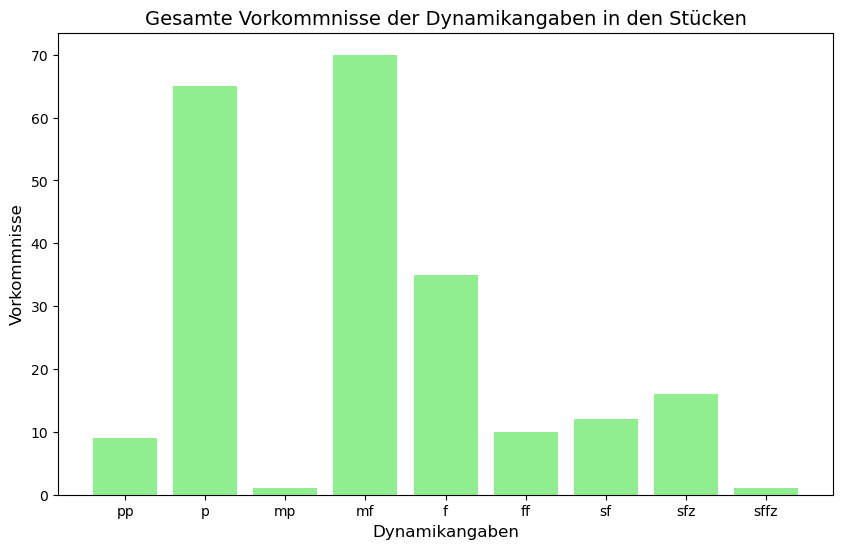

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Daten zu den Lautstärkenangaben in den Stücken
dynamics_data = {
    'Dann zieht der Frühling ein': {'pp': 0, 'p': 8, 'mp': 0, 'mf': 7, 'f': 6, 'ff': 0, 'sf': 0, 'sfz': 1, 'sffz': 0},
    'Das Mädel vom Rhein': {'pp': 0, 'p': 1, 'mp': 0, 'mf': 5, 'f': 4, 'ff': 2, 'sf': 0, 'sfz': 2, 'sffz': 0},
    'Du, du, du': {'pp': 2, 'p': 5, 'mp': 0, 'mf': 4, 'f': 2, 'ff': 1, 'sf': 0, 'sfz': 0, 'sffz': 0},
    'Es lebe die Liebe': {'pp': 0, 'p': 2, 'mp': 0, 'mf': 3, 'f': 11, 'ff': 1, 'sf': 0, 'sfz': 4, 'sffz': 1},
    'Frühling in Amsterdam': {'pp': 0, 'p': 0, 'mp': 0, 'mf': 3, 'f': 2, 'ff': 1, 'sf': 2, 'sfz': 2, 'sffz': 0},
    'Frühling in Wien': {'pp': 0, 'p': 3, 'mp': 0, 'mf': 5, 'f': 2, 'ff': 0, 'sf': 1, 'sfz': 1, 'sffz': 0},
    'Im Frühling, im Mondschein': {'pp': 1, 'p': 8, 'mp': 0, 'mf': 4, 'f': 0, 'ff': 0, 'sf': 0, 'sfz': 1, 'sffz': 0},
    'Im Prater blühn wieder die Bäume': {'pp': 0, 'p': 5, 'mp': 0, 'mf': 4, 'f': 0, 'ff': 0, 'sf': 0, 'sfz': 1, 'sffz': 0},
    'In Bacharach am Rhein': {'pp': 0, 'p': 6, 'mp': 0, 'mf': 6, 'f': 1, 'ff': 2, 'sf': 0, 'sfz': 2, 'sffz': 0},
    'Mit dem Frühling kommt die Liebe': {'pp': 3, 'p': 2, 'mp': 0, 'mf': 4, 'f': 0, 'ff': 0, 'sf': 0, 'sfz': 0, 'sffz': 0},
    'Nur der Frühling weiß es': {'pp': 0, 'p': 4, 'mp': 0, 'mf': 3, 'f': 1, 'ff': 0, 'sf': 0, 'sfz': 0, 'sffz': 0},
    'Singend, klingend ruft dich das Glück': {'pp': 0, 'p': 8, 'mp': 0, 'mf': 7, 'f': 3, 'ff': 3, 'sf': 9, 'sfz': 0, 'sffz': 0},
    'Wenn die Vöglein musizieren': {'pp': 0, 'p': 4, 'mp': 0, 'mf': 5, 'f': 2, 'ff': 0, 'sf': 0, 'sfz': 2, 'sffz': 0},
    'Wiener Frühling': {'pp': 1, 'p': 5, 'mp': 0, 'mf': 3, 'f': 0, 'ff': 0, 'sf': 0, 'sfz': 0, 'sffz': 0},
    'Zieht der Frühling durch den Prater': {'pp': 2, 'p': 4, 'mp': 1, 'mf': 7, 'f': 1, 'ff': 0, 'sf': 0, 'sfz': 0, 'sffz': 0}
}

# Summiere die Vorkommnisse der jeweiligen Dynamik über alle Stücke
dynamics_totals = {
    'pp': sum([data['pp'] for data in dynamics_data.values()]),
    'p': sum([data['p'] for data in dynamics_data.values()]),
    'mp': sum([data['mp'] for data in dynamics_data.values()]),
    'mf': sum([data['mf'] for data in dynamics_data.values()]),
    'f': sum([data['f'] for data in dynamics_data.values()]),
    'ff': sum([data['ff'] for data in dynamics_data.values()]),
    'sf': sum([data['sf'] for data in dynamics_data.values()]),
    'sfz': sum([data['sfz'] for data in dynamics_data.values()]),
    'sffz': sum([data['sffz'] for data in dynamics_data.values()])
}

# Erstelle den Barplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dynamics_totals.keys(), dynamics_totals.values(), color='lightgreen')

ax.set_xlabel('Dynamikangaben', fontsize=12)
ax.set_ylabel('Vorkommnisse', fontsize=12)
ax.set_title('Gesamte Vorkommnisse der Dynamikangaben in den Stücken', fontsize=14)

plt.show()


#### für einzelne Wörter

In [55]:
import os
from collections import defaultdict
from music21 import *

def analyze_dynamics_for_words(score, words):
    results = {}
    ls = search.lyrics.LyricSearcher(score)  # Create a LyricSearcher object

    for word in words:
        search_results = ls.search(word)  # Search for the word
        dynamics_counts = defaultdict(int)

        for match in search_results:
            for thisNote in match.els:
                measure = thisNote.measureNumber
                # Find the dynamic marking in the same measure as the note
                dynamics_in_measure = score.measure(measure).recurse().getElementsByClass(dynamics.Dynamic)
                
                if dynamics_in_measure:
                    # Assuming that the dynamic closest before or at the note's position is relevant
                    for dynamic in dynamics_in_measure:
                        if dynamic.offset <= thisNote.offset:
                            dynamics_counts[dynamic.value] += 1

        results[word] = dynamics_counts

    return results

def analyze_file(file_path, words):
    score = converter.parse(file_path)
    word_dynamics = analyze_dynamics_for_words(score, words)
    
    return word_dynamics

def analyze_folder(directory_path, words):
    combined_word_dynamics = {word: defaultdict(int) for word in words}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            file_word_dynamics = analyze_file(file_path, words)

            # Combine the dynamics counts for all files
            for word, dynamics_counts in file_word_dynamics.items():
                for dynamic, count in dynamics_counts.items():
                    combined_word_dynamics[word][dynamic] += count

    return combined_word_dynamics

def print_dynamics_for_words(word_dynamics):
    for word, dynamics_counts in word_dynamics.items():
        if dynamics_counts:  # Check if there are any dynamics for the word
            sorted_dynamics = sorted(dynamics_counts.items(), key=lambda item: item[1], reverse=True)
            print(f"\nLautstärkenangaben für '{word}':")
            for dynamic, count in sorted_dynamics:
                print(f"{dynamic}: {count} Vorkommnisse")
        else:
            print(f"\nKeine Lautstärkenangaben gefunden für '{word}'")

# Specify the directory path
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Words to search for
words = ["Frühling", "frühling", "Liebe", "liebe", "Herz", "Sonne", "küss", "küssen", "küß", "blüh", "Blühen", "Glück", "Wien", "Wein"]

# Analyze the folder and get the dynamics counts for the selected words
combined_word_dynamics = analyze_folder(directory_path, words)

# Print the dynamics for each word
print_dynamics_for_words(combined_word_dynamics)


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

## Betonungen (accent  > und Tenuto - )

#### für ein Stück

In [41]:
from music21 import *

def find_accented_words(score):
    results = set()
    ls = search.lyrics.LyricSearcher(score)
    indexed_lyrics = ls.index()

    current_word = ""
    word_is_accented = False
    current_verse = None

    for indexed_lyric in indexed_lyrics:
        text = indexed_lyric.text
        syllabic_type = indexed_lyric.lyric.syllabic
        verse_number = indexed_lyric.lyric.number

        # If we encounter a new verse, finalize the current word and start a new one
        if verse_number != current_verse:
            if current_word and word_is_accented:
                results.add(f"Verse {current_verse}: {current_word}")
            current_word = ""
            word_is_accented = False
            current_verse = verse_number

        # Build the word based on syllabic type
        if syllabic_type in ['single', 'begin']:
            if current_word and word_is_accented:
                results.add(f"Verse {current_verse}: {current_word}")
            current_word = text
        elif syllabic_type == 'middle':
            current_word += text
        elif syllabic_type == 'end':
            current_word += text

        # Check if the note has an accent or marcato
        if any(isinstance(art, articulations.Accent) for art in indexed_lyric.el.articulations) or \
           any(isinstance(art, articulations.Tenuto) for art in indexed_lyric.el.articulations):
            word_is_accented = True

        # If it's the end of a word or a single syllable word, add to results if accented
        if syllabic_type in ['end', 'single']:
            if word_is_accented:
                results.add(f"Verse {verse_number}: {current_word}")
            current_word = ""
            word_is_accented = False

    # Add any remaining word when done
    if current_word and word_is_accented:
        results.add(f"Verse {current_verse}: {current_word}")

    return results

def analyze_file(file_path):
    score = converter.parse(file_path)
    return find_accented_words(score)

def print_accented_words(accented_words):
    print(f"\nWörter mit betonten Silben:")
    for word in sorted(accented_words):
        print(word)
    print("-" * 40)

# Specify the file path for "Es lebe die Liebe"
file_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl'

# Analyze the specified file
all_accented_words = analyze_file(file_path)

# Print the words with accented syllables
print_accented_words(all_accented_words)



Wörter mit betonten Silben:
Verse 1: Es
Verse 1: Frühlingswind:
Verse 1: Lieb
Verse 1: Liebe
Verse 1: Liebe,
Verse 1: die
Verse 1: grüß'
Verse 1: im
Verse 1: küß'
Verse 1: lange
Verse 1: lebe
Verse 1: mein
Verse 1: schönes
Verse 1: sind
Verse 1: so
Verse 1: verliebt!
Verse 1: wir
Verse 1: zusammen
Verse 2: denn
Verse 2: mehr
Verse 2: überhaupt!
----------------------------------------


#### für alle Stücke

In [42]:
import os
import string
from music21 import *

def remove_punctuation(word):
    return word.translate(str.maketrans('', '', string.punctuation))

def find_accented_words(score):
    results = set()
    ls = search.lyrics.LyricSearcher(score)
    indexed_lyrics = ls.index()

    current_word = ""
    word_is_accented = False

    for indexed_lyric in indexed_lyrics:
        text = indexed_lyric.text
        syllabic_type = indexed_lyric.lyric.syllabic

        # Build the word based on syllabic type
        if syllabic_type in ['single', 'begin']:
            if current_word and word_is_accented:
                results.add(current_word)
            current_word = text
        elif syllabic_type == 'middle':
            current_word += text
        elif syllabic_type == 'end':
            current_word += text

         # Check if the note has an accent or marcato
        if any(isinstance(art, articulations.Accent) for art in indexed_lyric.el.articulations) or \
           any(isinstance(art, articulations.Tenuto) for art in indexed_lyric.el.articulations):
            word_is_accented = True

        # If it's the end of a word or a single syllable word, add to results if accented
        if syllabic_type in ['end', 'single']:
            if word_is_accented:
                results.add(current_word)
            current_word = ""
            word_is_accented = False

    # Add any remaining word when done
    if current_word and word_is_accented:
        results.add(current_word)

    return results

def analyze_file(file_path):
    score = converter.parse(file_path)
    return find_accented_words(score)

def analyze_folder(directory_path):
    all_accented_words = set()

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            #print(f"Analyzing {file_path}...")
            file_accented_words = analyze_file(file_path)
            all_accented_words.update(file_accented_words)

    # Convert to list and remove punctuation
    all_accented_words_list = [remove_punctuation(word) for word in sorted(all_accented_words)]

    return all_accented_words_list

def print_accented_words(accented_words_list):
    print(f"\nWörter mit betonten Silben:")
    for word in accented_words_list:
        print(word)
    print("-" * 40)  # This creates a line of 40 dashes for separation in the output

# Specify the directory path containing the .mxl files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the entire folder
all_accented_words_list = analyze_folder(directory_path)

# Print the words with accented syllables
print_accented_words(all_accented_words_list)



Wörter mit betonten Silben:
Amsterdam
Augen
Du
Es
Frühling
Frühlingswind
Glück
Haus
Herz
Johann
Lieb
Liebe
Liebe
Lippen
Mädel
Mäderl
Rhein
Schatz
Schluß
Strauß
Sünde
Tal
Tanz
Tanze
Und
Walzerkönig
Wiener
bergauf
das
denn
die
dir
du
dumm
ein
erblühn
grün
grüß
ihm
im
in
ist
küß
lange
lebe
mehr
mein
mit
nah
nur
ringsumher
ruf
schönes
selig
sind
so
spenden
träumen
und
verliebt
vom
wie
wir
zu
zu
zum
zusammen
Überall
überhaupt
----------------------------------------


## Intervalle

#### von einem Stück mit Silben bei bestimmten Intervall

In [6]:
import os
from collections import defaultdict
from music21 import *

def analyze_intervals_in_vocal_part(score):
    vocal_part = score.parts[0]  # Assuming the vocal part is the first part (Part 0)
    
    interval_counts = defaultdict(int)
    interval_words = defaultdict(list)

    previous_note = None
    previous_lyric = None
    for note in vocal_part.recurse().getElementsByClass('Note'):  # Only iterate through Note objects
        if previous_note is not None:
            # Calculate the interval between the previous note and the current note
            interval_obj = interval.Interval(previous_note, note)
            interval_counts[interval_obj.name] += 1
            
            # Get the current lyric (word or syllable) associated with the note
            if note.lyric:
                current_lyric = note.lyric
            else:
                current_lyric = None
            
            # Record the previous and current lyrics for the interval
            if previous_lyric or current_lyric:
                interval_words[interval_obj.name].append((previous_lyric, current_lyric))
        
        previous_note = note
        previous_lyric = note.lyric if note.lyric else None

    return interval_counts, interval_words

def analyze_file(file_path):
    score = converter.parse(file_path)
    interval_counts, interval_words = analyze_intervals_in_vocal_part(score)
    
    return interval_counts, interval_words

def print_top_intervals(interval_counts):
    sorted_intervals = sorted(interval_counts.items(), key=lambda item: item[1], reverse=True)
    print(f"\nDie häufigsten Intervalle im Gesangspart:")
    for interval_name, count in sorted_intervals:
        print(f"{interval_name}: {count} Vorkommnisse")

def print_words_for_interval(interval_name, interval_words):
    if interval_name in interval_words:
        print(f"\nWörter/Silben bei Intervall {interval_name}:")
        for word_pair in interval_words[interval_name]:
            print(f"{word_pair[0]} -> {word_pair[1]}")
    else:
        print(f"\nKeine Wörter/Silben für Intervall {interval_name} gefunden.")

# Specify the correct file path for the uploaded file
file_path =  r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl'

# Analyze the specified file
interval_counts, interval_words = analyze_file(file_path)

# Print the most frequent intervals
print_top_intervals(interval_counts)

# # Print the words or syllables for a specific interval (e.g., M6)
# interval_to_check = "M6"  # You can change this to check for other intervals
# print_words_for_interval(interval_to_check, interval_words)


Die häufigsten Intervalle im Gesangspart:
M2: 42 Vorkommnisse
P1: 21 Vorkommnisse
m2: 21 Vorkommnisse
m3: 16 Vorkommnisse
M6: 16 Vorkommnisse
P5: 15 Vorkommnisse
M3: 13 Vorkommnisse
d5: 11 Vorkommnisse
m6: 10 Vorkommnisse
P4: 5 Vorkommnisse
P8: 5 Vorkommnisse
m7: 4 Vorkommnisse
A4: 1 Vorkommnisse


##### same aber Unterschied Refrain/Strophe bei 1 Lied

In [7]:
import os
from collections import defaultdict
from music21 import *

def analyze_intervals_in_vocal_part(score):
    vocal_part = score.parts[0]  # Assuming the vocal part is the first part (Part 0)
    
    interval_counts_refrain = defaultdict(int)
    interval_words_refrain = defaultdict(list)
    
    interval_counts_strophe = defaultdict(int)
    interval_words_strophe = defaultdict(list)
    
    previous_note = None
    previous_lyric = None
    current_section = None
    
    for measure in vocal_part.getElementsByClass('Measure'):
        for element in measure.getElementsByClass('RehearsalMark'):
            if 'Refrain' in element.content:
                current_section = 'refrain'
            elif 'Strophe' in element.content:
                current_section = 'strophe'
        
        for n in measure.notes:
            # Check if the element is an instance of the Note class
            if isinstance(n, note.Note):
                if previous_note is not None:
                    # Calculate the interval between the previous note and the current note
                    interval_obj = interval.Interval(previous_note, n)
                    
                    if current_section == 'refrain':
                        interval_counts_refrain[interval_obj.name] += 1
                        if previous_lyric or n.lyric:
                            interval_words_refrain[interval_obj.name].append((previous_lyric, n.lyric))
                    elif current_section == 'strophe':
                        interval_counts_strophe[interval_obj.name] += 1
                        if previous_lyric or n.lyric:
                            interval_words_strophe[interval_obj.name].append((previous_lyric, n.lyric))
                
                previous_note = n
                previous_lyric = n.lyric if n.lyric else None

    return (interval_counts_refrain, interval_words_refrain), (interval_counts_strophe, interval_words_strophe)

def analyze_file(file_path):
    score = converter.parse(file_path)
    refrain_intervals, strophe_intervals = analyze_intervals_in_vocal_part(score)
    
    return refrain_intervals, strophe_intervals

def print_top_intervals(interval_counts, section_name):
    sorted_intervals = sorted(interval_counts.items(), key=lambda item: item[1], reverse=True)
    print(f"\nDie häufigsten Intervalle im {section_name}:")
    for interval_name, count in sorted_intervals:
        print(f"{interval_name}: {count} Vorkommnisse")

# Specify the correct file path for the uploaded file
file_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl'

# Analyze the specified file
refrain_intervals, strophe_intervals = analyze_file(file_path)

# Print the most frequent intervals for Refrain
print_top_intervals(refrain_intervals[0], "Refrain")

# Print the most frequent intervals for Strophe
print_top_intervals(strophe_intervals[0], "Strophe")



Die häufigsten Intervalle im Refrain:
M2: 24 Vorkommnisse
M6: 15 Vorkommnisse
m2: 14 Vorkommnisse
P5: 12 Vorkommnisse
d5: 11 Vorkommnisse
P1: 10 Vorkommnisse
m6: 8 Vorkommnisse
P8: 5 Vorkommnisse
m7: 4 Vorkommnisse
m3: 4 Vorkommnisse
P4: 2 Vorkommnisse
A4: 1 Vorkommnisse

Die häufigsten Intervalle im Strophe:
M2: 18 Vorkommnisse
M3: 13 Vorkommnisse
m3: 12 Vorkommnisse
P1: 11 Vorkommnisse
m2: 7 Vorkommnisse
P4: 3 Vorkommnisse
P5: 3 Vorkommnisse
m6: 2 Vorkommnisse
M6: 1 Vorkommnisse


#### Strophe und Refrain Unterschied in allen Stücken (gemeinsam und einzeln)

In [9]:
import os
from collections import defaultdict
from music21 import *

def analyze_intervals_in_vocal_part(score):
    vocal_part = score.parts[0]  # Assuming the vocal part is the first part (Part 0)
    
    interval_counts_refrain = defaultdict(int)
    interval_counts_strophe = defaultdict(int)

    previous_note = None
    current_section = None
    
    for measure in vocal_part.getElementsByClass('Measure'):
        for element in measure.getElementsByClass('RehearsalMark'):
            if 'Refrain' in element.content:
                current_section = 'refrain'
            elif 'Strophe' in element.content:
                current_section = 'strophe'
        
        for n in measure.notes:
            if isinstance(n, note.Note):
                if previous_note is not None:
                    interval_obj = interval.Interval(previous_note, n)
                    if current_section == 'refrain':
                        interval_counts_refrain[interval_obj.name] += 1
                    elif current_section == 'strophe':
                        interval_counts_strophe[interval_obj.name] += 1
                
                previous_note = n

    return interval_counts_refrain, interval_counts_strophe

def analyze_file(file_path):
    score = converter.parse(file_path)
    refrain_intervals, strophe_intervals = analyze_intervals_in_vocal_part(score)
    return refrain_intervals, strophe_intervals

def analyze_folder(directory_path):
    combined_interval_counts_refrain = defaultdict(int)
    combined_interval_counts_strophe = defaultdict(int)
    all_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            refrain_intervals, strophe_intervals = analyze_file(file_path)

            # Combine the interval counts for all files (Refrain und Strophe getrennt)
            for interval, count in refrain_intervals.items():
                combined_interval_counts_refrain[interval] += count
            for interval, count in strophe_intervals.items():
                combined_interval_counts_strophe[interval] += count

            # Store results for each file
            all_results[filename] = (refrain_intervals, strophe_intervals)

    return combined_interval_counts_refrain, combined_interval_counts_strophe, all_results

def print_top_intervals(interval_counts, section_name):
    sorted_intervals = sorted(interval_counts.items(), key=lambda item: item[1], reverse=True)
    print(f"\nDie häufigsten Intervalle im {section_name}:")
    for interval_name, count in sorted_intervals:
        print(f"{interval_name}: {count} Vorkommnisse")

# Specify the directory path containing the .mxl files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the combined interval counts and words
combined_interval_counts_refrain, combined_interval_counts_strophe, all_results = analyze_folder(directory_path)

# Print the most frequent intervals across all pieces
print_top_intervals(combined_interval_counts_refrain, "Refrain (alle Stücke)")
print_top_intervals(combined_interval_counts_strophe, "Strophe (alle Stücke)")

# Print the most frequent intervals for each individual piece
for filename, (refrain_intervals, strophe_intervals) in all_results.items():
    print(f"\nStück: {filename}")
    print_top_intervals(refrain_intervals, "Refrain")
    print_top_intervals(strophe_intervals, "Strophe")


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

## Intervalle in jedem einzelnen Stück

In [7]:
import os
from collections import defaultdict
from music21 import *

def analyze_intervals_in_vocal_part(score):
    vocal_part = score.parts[0]  # Assuming the vocal part is the first part (Part 0)
    
    interval_counts = defaultdict(int)
    previous_note = None
    
    for measure in vocal_part.getElementsByClass('Measure'):
        for n in measure.notes:
            if isinstance(n, note.Note):
                if previous_note is not None:
                    interval_obj = interval.Interval(previous_note, n)
                    interval_counts[interval_obj.name] += 1
                previous_note = n

    return interval_counts

def analyze_file(file_path):
    score = converter.parse(file_path)
    intervals = analyze_intervals_in_vocal_part(score)
    return intervals

def analyze_folder(directory_path):
    combined_interval_counts = defaultdict(int)
    all_results = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.mxl'):
            file_path = os.path.join(directory_path, filename)
            print(f"Analyzing {file_path}...")
            intervals = analyze_file(file_path)

            # Combine the interval counts for all files
            for interval, count in intervals.items():
                combined_interval_counts[interval] += count

            # Store results for each file
            all_results[filename] = intervals

    return combined_interval_counts, all_results

def print_top_intervals(interval_counts, section_name):
    sorted_intervals = sorted(interval_counts.items(), key=lambda item: item[1], reverse=True)
    print(f"\nDie häufigsten Intervalle in {section_name}:")
    for interval_name, count in sorted_intervals:
        print(f"{interval_name}: {count} Vorkommnisse")

# Specify the directory path containing the .mxl files
directory_path = r'C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien'

# Analyze the folder and get the combined interval counts and words
combined_interval_counts, all_results = analyze_folder(directory_path)

# Print the most frequent intervals across all pieces
print_top_intervals(combined_interval_counts, "allen Stücken")

# Print the most frequent intervals for each individual piece
for filename, intervals in all_results.items():
    print(f"\nStück: {filename}")
    print_top_intervals(intervals, filename)


Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Dann_zieht_der_Fruehling_ein.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Du_du_du.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Es_lebe_die_Liebe.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Amsterdam.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Fruehling_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\Im_Prater_bluehn_wieder_die_Baeume.mxl...
Analyzing C:\Users\amiip\Desktop\2023W\SE_Masterarbeit\Lieder\1MXL-Dateien\In_Bacharach_am_Rhein.mxl...
Analyzing C:

#### Häufigkeit von Intervallen in einzelnen Stücken -> Barplot

C:\Users\amiip\AppData\Local\Temp\ipykernel_22912\556117836.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df.columns))


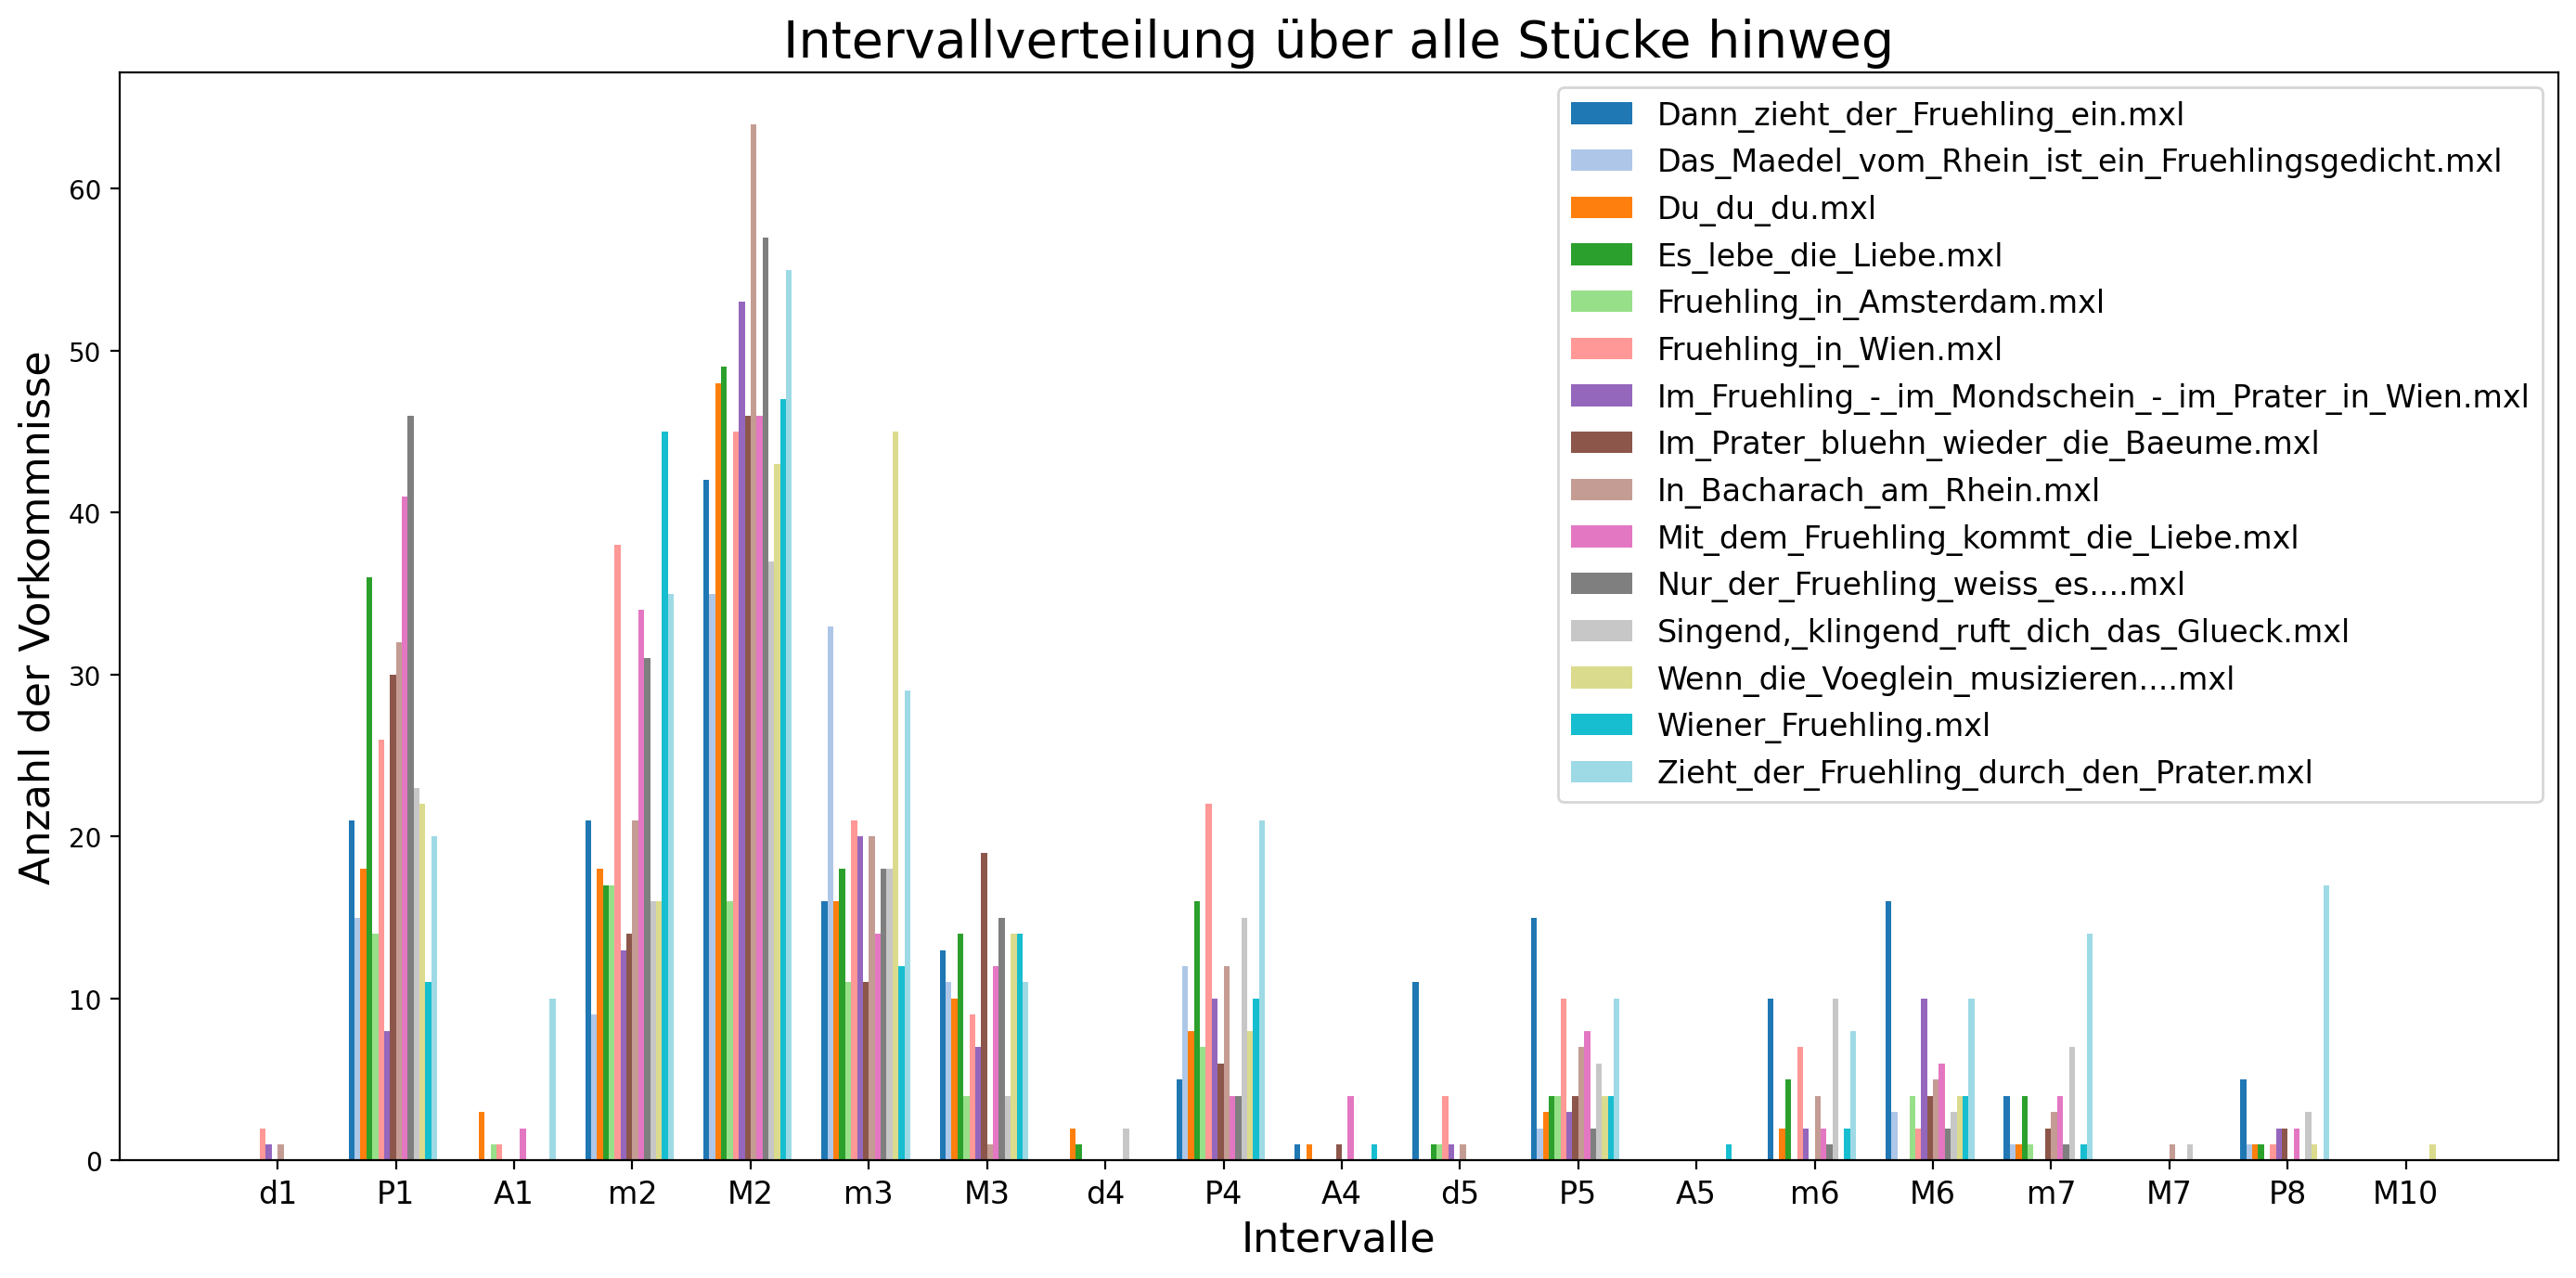

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Deine Daten als Dictionary (Intervalle und Stücke)
data = {
    'Dann_zieht_der_Fruehling_ein.mxl': {
        'M2': 42, 'P1': 21, 'm2': 21, 'm3': 16, 'M6': 16, 'P5': 15, 
        'M3': 13, 'd5': 11, 'm6': 10, 'P4': 5, 'P8': 5, 'm7': 4, 'A4': 1
    },
    'Das_Maedel_vom_Rhein_ist_ein_Fruehlingsgedicht.mxl': {
        'M2': 35, 'm3': 33, 'P1': 15, 'P4': 12, 'M3': 11, 'm2': 9, 
        'M6': 3, 'P5': 2, 'P8': 1, 'm7': 1
    },
    'Du_du_du.mxl': {
        'M2': 48, 'm2': 18, 'P1': 18, 'm3': 16, 'M3': 10, 'P4': 8, 
        'A1': 3, 'P5': 3, 'd4': 2, 'm6': 2, 'm7': 1, 'A4': 1, 'P8': 1
    },
    'Es_lebe_die_Liebe.mxl': {
        'M2': 49, 'P1': 36, 'm3': 18, 'm2': 17, 'P4': 16, 'M3': 14, 
        'm6': 5, 'P5': 4, 'm7': 4, 'd5': 1, 'P8': 1, 'd4': 1
    },
    'Fruehling_in_Amsterdam.mxl': {
        'm2': 17, 'M2': 16, 'P1': 14, 'm3': 11, 'P4': 7, 'M6': 4, 
        'M3': 4, 'P5': 4, 'm7': 1, 'd5': 1, 'A1': 1
    },
    'Fruehling_in_Wien.mxl': {
        'M2': 45, 'm2': 38, 'P1': 26, 'P4': 22, 'm3': 21, 'P5': 10, 
        'M3': 9, 'm6': 7, 'd5': 4, 'd1': 2, 'M6': 2, 'P8': 1, 'A1': 1
    },
    'Im_Fruehling_-_im_Mondschein_-_im_Prater_in_Wien.mxl': {
        'M2': 53, 'm3': 20, 'm2': 13, 'M6': 10, 'P4': 10, 'P1': 8, 
        'M3': 7, 'P5': 3, 'm6': 2, 'P8': 2, 'd5': 1, 'd1': 1
    },
    'Im_Prater_bluehn_wieder_die_Baeume.mxl': {
        'M2': 46, 'P1': 30, 'M3': 19, 'm2': 14, 'm3': 11, 'P4': 6, 
        'M6': 4, 'P5': 4, 'P8': 2, 'm7': 2, 'A4': 1
    },
    'In_Bacharach_am_Rhein.mxl': {
        'M2': 64, 'P1': 32, 'm2': 21, 'm3': 20, 'P4': 12, 'P5': 7, 
        'M6': 5, 'm6': 4, 'm7': 3, 'd5': 1, 'd1': 1, 'M7': 1, 'M3': 1
    },
    'Mit_dem_Fruehling_kommt_die_Liebe.mxl': {
        'M2': 46, 'P1': 41, 'm2': 34, 'm3': 14, 'M3': 12, 'P5': 8, 
        'M6': 6, 'm7': 4, 'A4': 4, 'P4': 4, 'P8': 2, 'A1': 2, 'm6': 2, 'd7': 1
    },
    'Nur_der_Fruehling_weiss_es....mxl': {
        'M2': 57, 'P1': 46, 'm2': 31, 'm3': 18, 'M3': 15, 'P4': 4, 
        'M6': 2, 'P5': 2, 'm6': 1, 'm7': 1
    },
    'Singend,_klingend_ruft_dich_das_Glueck.mxl': {
        'M2': 37, 'P1': 23, 'm3': 18, 'm2': 16, 'P4': 15, 'm6': 10, 
        'm7': 7, 'P5': 6, 'M3': 4, 'P8': 3, 'M6': 3, 'd4': 2, 'M7': 1
    },
    'Wenn_die_Voeglein_musizieren....mxl': {
        'm3': 45, 'M2': 43, 'P1': 22, 'm2': 16, 'M3': 14, 'P4': 8, 
        'M6': 4, 'P5': 4, 'M10': 1, 'P8': 1
    },
    'Wiener_Fruehling.mxl': {
        'M2': 47, 'm2': 45, 'M3': 14, 'm3': 12, 'P1': 11, 'P4': 10, 
        'M6': 4, 'P5': 4, 'm6': 2, 'A4': 1, 'm7': 1, 'A5': 1
    },
    'Zieht_der_Fruehling_durch_den_Prater.mxl': {
        'M2': 55, 'm2': 35, 'm3': 29, 'P4': 21, 'P1': 20, 'P8': 17, 
        'm7': 14, 'M3': 11, 'A1': 10, 'M6': 10, 'P5': 10, 'm6': 8
    }
}

# Definierte Reihenfolge der Intervalle
interval_order = ['d1', 'P1', 'A1', 'm2', 'M2', 'm3', 'M3', 'd4', 'P4', 'A4', 'd5', 'P5', 'A5', 'm6', 'M6', 'm7', 'M7', 'P8', 'M10']

# Sortiere die Daten nach der gewünschten Intervallreihenfolge
sorted_intervals = {}
for piece, intervals in data.items():
    sorted_intervals[piece] = {interval: intervals.get(interval, 0) for interval in interval_order}

# Erstelle einen DataFrame für die Visualisierung und setze die Reihenfolge der Indizes entsprechend interval_order
df = pd.DataFrame(sorted_intervals).reindex(interval_order).fillna(0)

# Farben für jedes Stück
colors = plt.cm.get_cmap('tab20', len(df.columns))

# Barplot erstellen
fig, ax = plt.subplots(figsize=(14, 7))

# Balkenbreite und Positionen
bar_width = 0.2
index = np.arange(len(df.index)) * 4 

# Für jedes Stück Balken zeichnen
for i, col in enumerate(df.columns):
    ax.bar(index + i * bar_width, df[col], bar_width, label=col, color=colors(i))

# Achsen und Titel
ax.set_xlabel('Intervalle', fontsize=16)
ax.set_ylabel('Anzahl der Vorkommnisse', fontsize=16)
ax.set_title('Intervallverteilung über alle Stücke hinweg', fontsize=20)
ax.set_xticks(index + bar_width * (len(df.columns) / 2))
ax.set_xticklabels(df.index, fontsize=12)
ax.legend(loc='upper right', fontsize=12)

# Plot anzeigen
plt.tight_layout()
plt.savefig('intervalle_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


#### dasselbe in Prozent

C:\Users\amiip\AppData\Local\Temp\ipykernel_22912\43810570.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df_percentage.columns))


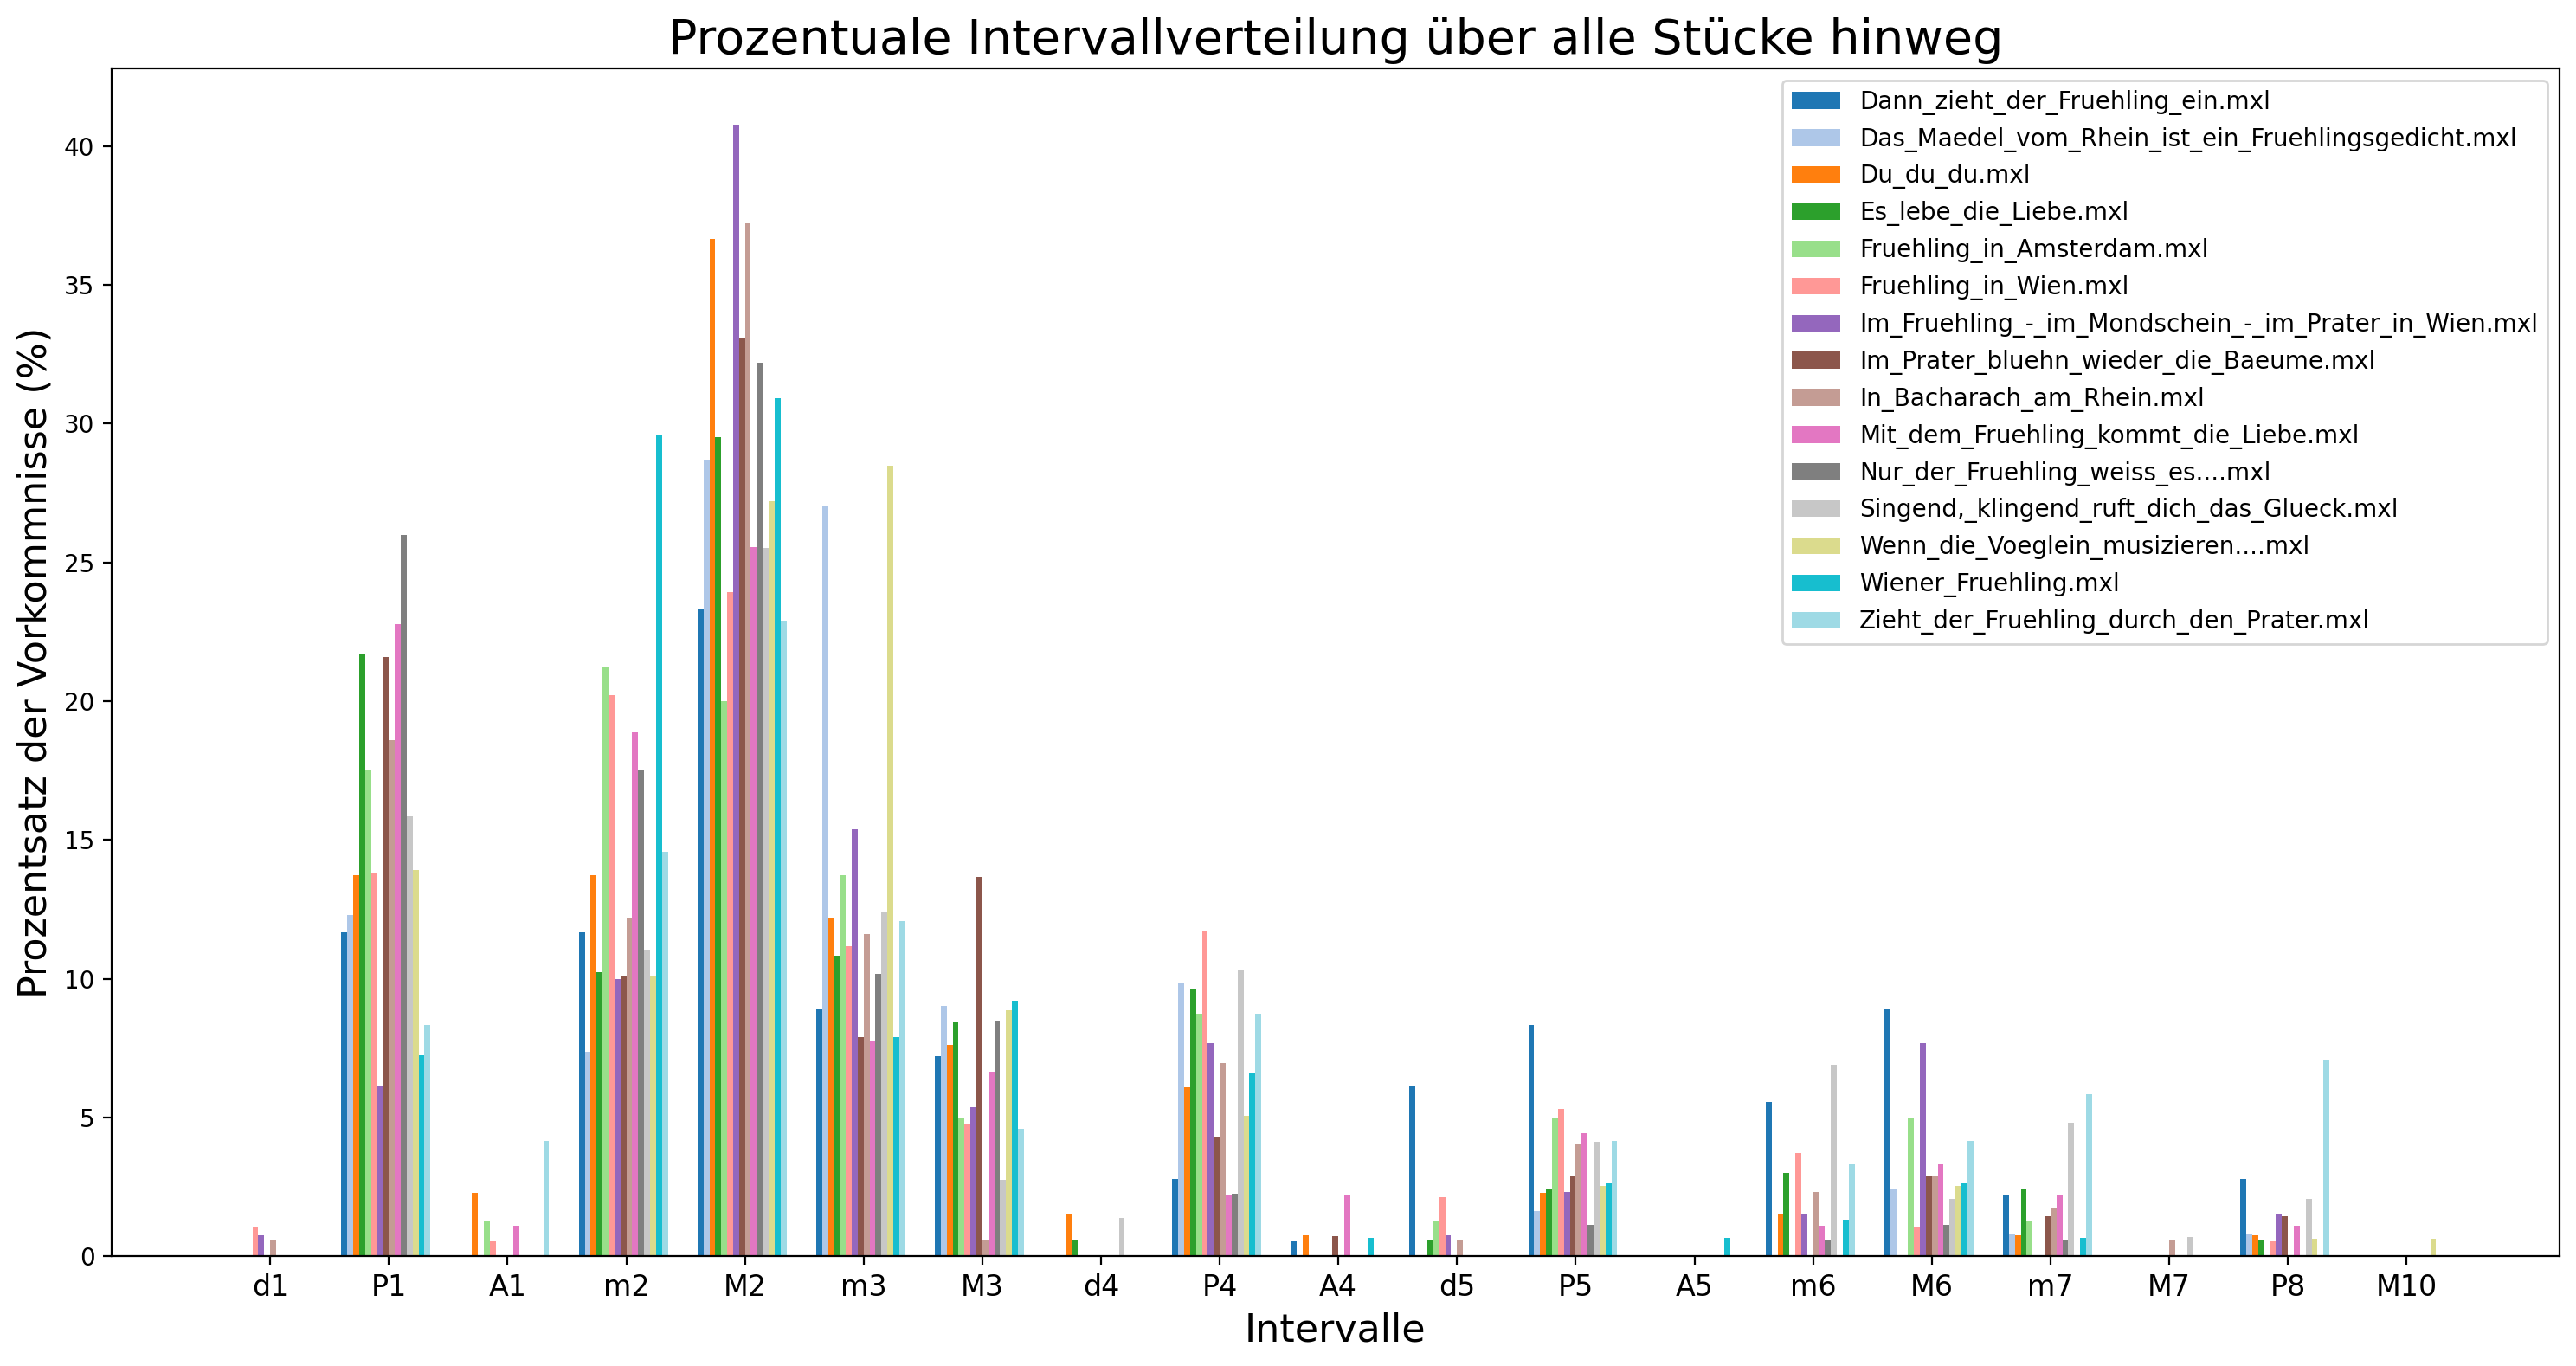

In [37]:
# in Prozent

# Berechne die Summe der Vorkommnisse für jedes Stück
total_counts = {piece: sum(intervals.values()) for piece, intervals in data.items()}

# Berechne die prozentualen Werte anstatt der absoluten Werte
percentage_data = {}
for piece, intervals in data.items():
    percentage_data[piece] = {interval: (count / total_counts[piece]) * 100 for interval, count in intervals.items()}

# Erstelle einen DataFrame für die Visualisierung der prozentualen Verteilung
df_percentage = pd.DataFrame(percentage_data).fillna(0)

# Sortiere den DataFrame nach den Intervallnamen
df_percentage = df_percentage.loc[interval_order]

# Farben für jedes Stück
colors = plt.cm.get_cmap('tab20', len(df_percentage.columns))

# Barplot erstellen
fig, ax = plt.subplots(figsize=(15, 8))

# Balkenbreite und Positionen
bar_width = 0.15
index = np.arange(len(df_percentage.index)) * 3

# Für jedes Stück Balken zeichnen
for i, col in enumerate(df_percentage.columns):
    ax.bar(index + i * bar_width, df_percentage[col], bar_width, label=col, color=colors(i))

# Achsen und Titel
ax.set_xlabel('Intervalle', fontsize=16)
ax.set_ylabel('Prozentsatz der Vorkommnisse (%)', fontsize=16)
ax.set_title('Prozentuale Intervallverteilung über alle Stücke hinweg', fontsize=20)
ax.set_xticks(index + bar_width * (len(df_percentage.columns) / 2))
ax.set_xticklabels(df_percentage.index, fontsize=12)
ax.legend(loc='upper right', fontsize=10)

# Plot anzeigen
plt.tight_layout()
plt.savefig('intervalle_barplot_prozent.png', dpi=300, bbox_inches='tight')
plt.show()
